# Finding Dogs a Home 
## Table of Contents
1. Data Wrangling<br>
 1a. Merging the Dataset<br>
 1b. Cleaning the Dataset<br><br>
 
2. Exploratory Analysis and Statistical Analysis of Features on Outcome<br>
2a. Breed<br>
2b. Gender<br>
2c. Age<br>
2d. Pure/Mix<br>
2e. Color<br>
2f. Intake Type<br>
2g. Health<br>
2h. Time Dependency<br>
2i. Summary of Findings<br><br>

3. Machine Learning<br>
3a. Machine Learning Models<br>
3b. Remarks on the Learning Models<br><br>

4. Future Work

# 1. Data Wrangling Pet Datasets
Four pet adoption datasets were found on governmental and adoption websites representing Austin, TX, Louisville, KY, Dallas, TX, and Sonoma, CA. The dataset includes various species of animals and the prime focus of this study is to investigate the different adoption rates in these regions with the purpose of statistically understanding whether regions have preferences to the type of animals that are adopted. Ultimately, we would want to develop a machine learning model to predict the adoption likelihood of potential pets. This can ultimately allow users to effectively allocate resources to endangered animals and improve their chances of adoption. To limit the scope of the project, this would only focus on dog.
### Wrangling Approach:
The biggest challenge to the data wrangling portion of this project is to effectively merge the datasets. Since there is no universal standard in organizing and collecting data, these datasets were likely collected for the purpose of record keeping instead of data science purposes. Merging the datasets would results in abundance of missing data and important features. The data wrangling process will take a 2 step approach.
 1. Merge the datasets
         a. universalize the feature names 
         b. drop unimportant features
         c. if necessary feature engineer dataset
 2. Clean the merged dataset
         a. clean dataset
         b. feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras import Sequential
from keras.layers import BatchNormalization, Dropout, Dense, Activation

Using TensorFlow backend.


## 1a. Merging the Dataset

In [2]:
# import datasets
df_Austin = pd.read_csv('Dataset/Austin_Animal_Center_Outcomes.csv', parse_dates = 
                        ['DateTime', 'MonthYear', 'Date of Birth'])
df_Louisville = pd.read_csv('Dataset/Louisville_Kentucky_Animal_IO_Data_5.csv', parse_dates = 
                            ['IntakeDate', 'DOB', 'OutcomeDate'])
df_Dallas = pd.read_csv('Dataset/Dallas_FY_2017_Dallas_Animal_Shelter_Data.csv', parse_dates = 
                        ['Intake Date', 'Outcome Date'])
df_Sonoma = pd.read_csv('Dataset/Sonoma_County_Animal_Shelter_Intake_and_Outcome.csv', parse_dates = 
                        ['Date Of Birth', 'Intake Date', 'Outcome Date'])

In [3]:
# start by investigating Austin, Texas Dataset
df_Austin.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A789976,NaN,2019-03-05 19:07:00,2019-03-05 19:07:00,2018-03-02,Transfer,Snr,Cat,Intact Male,1 year,Domestic Medium Hair Mix,Black
1,A789980,NaN,2019-03-05 19:07:00,2019-03-05 19:07:00,2018-03-02,Transfer,Snr,Cat,Intact Male,1 year,Domestic Shorthair Mix,Black/White
2,A789966,NaN,2019-03-05 19:06:00,2019-03-05 19:06:00,2018-03-02,Transfer,Snr,Cat,Unknown,1 year,Domestic Medium Hair Mix,Orange Tabby/White
3,A789958,NaN,2019-03-05 19:05:00,2019-03-05 19:05:00,2017-03-02,Transfer,Snr,Cat,Intact Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
4,A789838,*Tansy,2019-03-05 19:01:00,2019-03-05 19:01:00,2018-02-28,Adoption,NaN,Dog,Spayed Female,1 year,Golden Retriever Mix,Cream/White


In [4]:
df_Austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96442 entries, 0 to 96441
Data columns (total 12 columns):
Animal ID           96442 non-null object
Name                66738 non-null object
DateTime            96442 non-null datetime64[ns]
MonthYear           96442 non-null datetime64[ns]
Date of Birth       96442 non-null datetime64[ns]
Outcome Type        96435 non-null object
Outcome Subtype     43686 non-null object
Animal Type         96442 non-null object
Sex upon Outcome    96440 non-null object
Age upon Outcome    96436 non-null object
Breed               96442 non-null object
Color               96442 non-null object
dtypes: datetime64[ns](3), object(9)
memory usage: 8.8+ MB


In [5]:
#check redundancy of 'DateTime' and 'MonthYear' columns
(df_Austin.loc[:, 'DateTime'] == df_Austin.loc[:, 'MonthYear']).all()

True

In [6]:
# drop features unrelated to analysis and add location feature for merging dataset
df_Austin = df_Austin.drop(columns = ['Animal ID','Name', 'MonthYear', 'Age upon Outcome', 'Outcome Subtype'])
df_Austin['Location'] = 'Austin'

In [7]:
#Rename Columns and resulting dataframe
df_Austin.columns = ['Outcome_Date', 'DOB', 'Outcome_Type', 'Animal_Type',
                    'Sex', 'Breed', 'Color', 'Location']
df_Austin.head()

,Outcome_Date,DOB,Outcome_Type,Animal_Type,Sex,Breed,Color,Location
0,2019-03-05 19:07:00,2018-03-02,Transfer,Cat,Intact Male,Domestic Medium Hair Mix,Black,Austin
1,2019-03-05 19:07:00,2018-03-02,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Black/White,Austin
2,2019-03-05 19:06:00,2018-03-02,Transfer,Cat,Unknown,Domestic Medium Hair Mix,Orange Tabby/White,Austin
3,2019-03-05 19:05:00,2017-03-02,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,Austin
4,2019-03-05 19:01:00,2018-02-28,Adoption,Dog,Spayed Female,Golden Retriever Mix,Cream/White,Austin


In [8]:
# Investigate Louisville Dataset
df_Louisville.head()

,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,SecondaryColor,...,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome
0,A366370,CAT,2008-11-07 10:50:00,STRAY,OTC,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,BROWN,...,FEARFUL,HEALTHY,ALTERED,2008-11-12 15:46:00,EUTH,FERAL,NaN,NaN,UNHEALTHY/UNTREATABLE,ALTERED
1,A366531,CAT,2008-11-10 10:20:00,STRAY,OTC,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,2008-11-19 20:10:00,EUTH,CONTAG DIS,NaN,SICK,HEALTHY,UNKNOWN
2,A532367,BIRD,2014-07-23 23:21:00,CONFISCATE,CRUELTY,RED,CHICKEN,NaN,MALE,BLACK,...,OTHER,HEALTHY,FERTILE,2014-11-05 15:49:00,TRANSFER,NaN,NaN,NaN,HEALTHY,FERTILE
3,A532474,OTHER,2014-07-24 18:29:00,ET REQUEST,NaN,BROWN,BAT,NaN,UNKNOWN,NaN,...,OTHER,HEALTHY,UNKNOWN,2014-07-24 23:59:00,EUTH,MEDICAL,NaN,OTHER,HEALTHY,UNKNOWN
4,A281756,DOG,2006-09-11 18:10:00,OWNER SUR,OTC,WHITE,PIT BULL TERRIER,NaN,MALE,BROWN,...,NORMAL,HEALTHY,FERTILE,2006-09-12 13:44:00,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE


In [9]:
df_Louisville = pd.read_csv('Dataset/Louisville_Kentucky_Animal_IO_Data_5.csv', parse_dates = 
                            ['IntakeDate', 'DOB', 'OutcomeDate'])

In [10]:
df_Louisville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150842 entries, 0 to 150841
Data columns (total 22 columns):
AnimalID                       150842 non-null object
AnimalType                     150842 non-null object
IntakeDate                     150842 non-null datetime64[ns]
IntakeType                     150842 non-null object
IntakeSubtype                  146286 non-null object
PrimaryColor                   150825 non-null object
PrimaryBreed                   150842 non-null object
SecondaryBreed                 40532 non-null object
Gender                         150842 non-null object
SecondaryColor                 80579 non-null object
DOB                            94618 non-null datetime64[ns]
IntakeReason                   34805 non-null object
IntakeInternalStatus           150842 non-null object
IntakeAsilomarStatus           150842 non-null object
ReproductiveStatusAtIntake     150842 non-null object
OutcomeDate                    150640 non-null datetime64[ns]
Outco

In [11]:
#remove unnecessary columns and add location column
df_Louisville = df_Louisville.drop(columns = ['AnimalID','IntakeReason','IntakeAsilomarStatus', 
                                              'ReproductiveStatusAtIntake','OutcomeSubtype', 'OutcomeReason', 
                                              'OutcomeInternalStatus',
                                              'ReproductiveStatusAtOutcome'])
df_Louisville['Location'] = 'Louisville'

In [12]:
#rename column
df_Louisville.columns = ['Animal_Type', 'Intake_Date', 'Intake_Type', 'Intake_Subtype', 'Primary_Color',
                         'Breed', 'Secondary_Breed', 'Sex', 'Secondary_Color', 'DOB', 'Intake_Status','Outcome_Date', 
                         'Outcome_Type', 'Health', 'Location']

In [13]:
#merge color columns to single column
df_Louisville['scolor'] = '/' + df_Louisville[df_Louisville['Secondary_Color'] != '']['Secondary_Color']
df_Louisville['scolor'] = df_Louisville['scolor'].fillna('')
df_Louisville['Color'] = df_Louisville.loc[:, 'Primary_Color'] + df_Louisville.loc[:, 'scolor']
df_Louisville = df_Louisville.drop(columns = ['Primary_Color', 'Secondary_Color', 'scolor'])

In [14]:
#merge breed columns to single column
df_Louisville['mix_breed'] = '/' + df_Louisville[df_Louisville['Secondary_Breed'] != '']['Secondary_Breed']
df_Louisville['mix_breed'] = df_Louisville['mix_breed'].fillna('')
df_Louisville['Breed'] = df_Louisville.loc[:, 'Breed'] + df_Louisville.loc[:, 'mix_breed']
df_Louisville = df_Louisville.drop(columns = ['Secondary_Breed', 'mix_breed'])

In [15]:
df_Louisville.head()

,Animal_Type,Intake_Date,Intake_Type,Intake_Subtype,Breed,Sex,DOB,Intake_Status,Outcome_Date,Outcome_Type,Health,Location,Color
0,CAT,2008-11-07 10:50:00,STRAY,OTC,DOMESTIC SHORTHAIR,NEUTERED MALE,NaT,FEARFUL,2008-11-12 15:46:00,EUTH,UNHEALTHY/UNTREATABLE,Louisville,WHITE/BROWN
1,CAT,2008-11-10 10:20:00,STRAY,OTC,DOMESTIC SHORTHAIR/DOMESTIC SHORTHAIR,UNKNOWN,NaT,NORMAL,2008-11-19 20:10:00,EUTH,HEALTHY,Louisville,BLACK
2,BIRD,2014-07-23 23:21:00,CONFISCATE,CRUELTY,CHICKEN,MALE,NaT,OTHER,2014-11-05 15:49:00,TRANSFER,HEALTHY,Louisville,RED/BLACK
3,OTHER,2014-07-24 18:29:00,ET REQUEST,NaN,BAT,UNKNOWN,NaT,OTHER,2014-07-24 23:59:00,EUTH,HEALTHY,Louisville,BROWN
4,DOG,2006-09-11 18:10:00,OWNER SUR,OTC,PIT BULL TERRIER,MALE,2005-09-11,NORMAL,2006-09-12 13:44:00,EUTH,HEALTHY,Louisville,WHITE/BROWN


In [16]:
# Investigate Dallas Dataset
df_Dallas.head()

,Animal ID,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source ID,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0989676,CAT,DOMESTIC SH,CC 29,IMPOUNDED,NaN,NaN,1,P0646273,5902,...,12:00.0,R17-500577,K17-377075,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,APR.2017,FY2017
1,A1008559,DOG,GERM SHEPHERD,DC 05,UNAVAILABLE,NaN,A17-075580,1,P0000000,5600,...,06:00.0,R17-516477,K17-393870,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,ADOPTED:SX:09/29/17,SEP.2017,FY2017
2,A1002409,CAT,DOMESTIC SH,LFC 055,IMPOUNDED,NaN,NaN,1,P0795984,11103,...,45:00.0,NaN,K17-387910,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2017,FY2017
3,A0962054,DOG,LABRADOR RETR,PAWS 02,AVAILABLE,NaN,A16-036430,1,P0000000,17102,...,54:00.0,R16-477153,K16-362868,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,FREE ADOPTION11/19/16,OCT.2016,FY2017
4,A0960676,DOG,YORKSHIRE TERR,LOST,LOST REPORT,NaN,NaN,1,P0756878,75104,...,32:00.0,NaN,K16-362095,NaN,NaN,UNABLE TO SCAN,OVER THE COUNTER,NaN,OCT.2016,FY2017


In [17]:
df_Dallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34819 entries, 0 to 34818
Data columns (total 32 columns):
Animal ID                 34819 non-null object
Animal Type               34819 non-null object
Animal Breed              34819 non-null object
Kennel Number             34819 non-null object
Kennel Status             34819 non-null object
Tag Type                  0 non-null float64
Activity Number           17969 non-null object
Activity Sequence         34819 non-null int64
Source ID                 34819 non-null object
Census Tract              34680 non-null object
Council District          34680 non-null object
Intake Type               34819 non-null object
Intake Subtype            33409 non-null object
Reason                    6210 non-null object
Staff ID                  34819 non-null object
Intake Date               34819 non-null datetime64[ns]
Intake Time               34819 non-null object
Due Out                   34819 non-null object
Intake Condition        

In [18]:
#remove unnecessary columns and add location column
df_Dallas = df_Dallas.drop(columns = ['Animal ID', 'Kennel Number', 'Tag Type', 'Kennel Status', 
                                     'Activity Number', 'Activity Sequence', 'Source ID',
                                     'Census Tract', 'Council District','Reason', 'Staff ID', 'Intake Time', 
                                     'Outcome Time', 'Due Out','Intake Condition', 'Hold Request', 
                                      'Outcome Time', 'Receipt Number', 'Impound Number', 'Service Request Number', 
                                      'Animal Origin', 'Additional Information', 'Month', 'Year'])
df_Dallas['Location'] = 'Dallas'

In [19]:
#rename column
df_Dallas.columns = ['Animal_Type', 'Breed', 'Intake_Type', 'Intake_Subtype', 'Intake_Date', 
                     'Outcome_Type', 'Outcome_Date', 'Health','Chip_Status', 'Location']

In [20]:
df_Dallas.head()

,Animal_Type,Breed,Intake_Type,Intake_Subtype,Intake_Date,Outcome_Type,Outcome_Date,Health,Chip_Status,Location
0,CAT,DOMESTIC SH,STRAY,AT LARGE,2017-04-19,TRANSFER,2017-04-19,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,Dallas
1,DOG,GERM SHEPHERD,CONFISCATED,KEEP SAFE,2017-09-16,ADOPTION,2017-10-02,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,Dallas
2,CAT,DOMESTIC SH,STRAY,AT LARGE,2017-07-19,TRANSFER,2017-07-24,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,Dallas
3,DOG,LABRADOR RETR,STRAY,AT LARGE,2016-10-28,ADOPTION,2016-11-19,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,Dallas
4,DOG,YORKSHIRE TERR,LOST REPORT,NaN,2016-10-20,LOST REPORT,2016-11-02,NaN,UNABLE TO SCAN,Dallas


In [21]:
#Investigate Sonoma Dataset
df_Sonoma.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,NaN,CAT,DOMESTIC SH,BLACK,Male,KITTN,NaT,K17-026134,FREEZER,A363799,...,FIELD,EUTHANIZE,INJ SEVERE,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
1,SUGAR,DOG,LABRADOR RETR,YELLOW,Neutered,LARGE,2008-09-24,K17-022441,DS75,A228255,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,COUNTY,COUNTY,95404.0,"95404(38.458384, -122.675588)",1
2,MIMS,CAT,DOMESTIC SH,CALICO,Spayed,KITTN,2017-10-13,K17-026771,LOBBY,A366380,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95401.0,"95401(38.446019, -122.766748)",1
3,*MILLIE,DOG,CHIHUAHUA SH,BLUE/TAN,Spayed,TOY,2009-03-29,K17-022804,DA05,A349551,...,OVER THE COUNTER,ADOPTION,SCAS WEB,TREATABLE/REHAB,HEALTHY,SANTA ROSA,OUT OF COUNTY,94591.0,"94591(38.107585, -122.209634)",1
4,SAM,DOG,LABRADOR RETR,YELLOW,Male,LARGE,2007-11-01,K14-007704,DS66,A211734,...,FIELD,RETURN TO OWNER,RETURN TO OWNER,HEALTHY,HEALTHY,SANTA ROSA,*CLOVERDALE,95425.0,"95425(38.790859, -123.010876)",1


In [22]:
df_Sonoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 24 columns):
Name                    12235 non-null object
Type                    16344 non-null object
Breed                   16344 non-null object
Color                   16344 non-null object
Sex                     16344 non-null object
Size                    16315 non-null object
Date Of Birth           12547 non-null datetime64[ns]
Impound Number          16344 non-null object
Kennel Number           16335 non-null object
Animal ID               16344 non-null object
Intake Date             16344 non-null datetime64[ns]
Outcome Date            16230 non-null datetime64[ns]
Days in Shelter         16344 non-null int64
Intake Type             16344 non-null object
Intake Subtype          16344 non-null object
Outcome Type            16227 non-null object
Outcome Subtype         16128 non-null object
Intake Condition        16344 non-null object
Outcome Condition       16149 non-null o

In [23]:
#remove unnecessary columns and add location column
df_Sonoma = df_Sonoma.drop(columns = ['Name', 'Size', 'Impound Number', 'Kennel Number',
                                     'Animal ID', 'Days in Shelter', 'Intake Condition',
                                     'Outcome Subtype', 'Intake Jurisdiction',
                                     'Outcome Jurisdiction', 'Outcome Zip Code',
                                     'Location', 'Count'])
df_Sonoma['Location'] = 'Sonoma'

In [24]:
#rename column
df_Sonoma.columns = ['Animal_Type', 'Breed', 'Color', 'Sex', 'DOB', 'Intake_Date','Outcome_Date',
                     'Intake_Type', 'Intake_Subtype', 'Outcome_Type', 'Health', 'Location']

In [25]:
#Verify no unique column names across multiple dataset
print(df_Austin.columns)
print(df_Louisville.columns) 
print(df_Dallas.columns)
print(df_Sonoma.columns)

Index(['Outcome_Date', 'DOB', 'Outcome_Type', 'Animal_Type', 'Sex', 'Breed',
       'Color', 'Location'],
      dtype='object')
Index(['Animal_Type', 'Intake_Date', 'Intake_Type', 'Intake_Subtype', 'Breed',
       'Sex', 'DOB', 'Intake_Status', 'Outcome_Date', 'Outcome_Type', 'Health',
       'Location', 'Color'],
      dtype='object')
Index(['Animal_Type', 'Breed', 'Intake_Type', 'Intake_Subtype', 'Intake_Date',
       'Outcome_Type', 'Outcome_Date', 'Health', 'Chip_Status', 'Location'],
      dtype='object')
Index(['Animal_Type', 'Breed', 'Color', 'Sex', 'DOB', 'Intake_Date',
       'Outcome_Date', 'Intake_Type', 'Intake_Subtype', 'Outcome_Type',
       'Health', 'Location'],
      dtype='object')


In [26]:
#merge_dataFrames
merge_data = pd.concat([df_Austin, df_Louisville, df_Dallas, df_Sonoma], ignore_index = True).reset_index()

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 1b. Cleaning the Dataset

In [27]:
#for simplicity lets only investigate dogs
merge_data = merge_data.loc[merge_data.loc[:, 'Animal_Type'].isin(['Dog', 'DOG'])]
merge_data = merge_data.drop(columns = 'Animal_Type')

In [28]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167480 entries, 4 to 298446
Data columns (total 14 columns):
index             167480 non-null int64
Breed             167480 non-null object
Chip_Status       26043 non-null object
Color             141423 non-null object
DOB               116594 non-null datetime64[ns]
Health            111238 non-null object
Intake_Date       112412 non-null datetime64[ns]
Intake_Status     77145 non-null object
Intake_Subtype    108173 non-null object
Intake_Type       112412 non-null object
Location          167480 non-null object
Outcome_Date      167088 non-null datetime64[ns]
Outcome_Type      167154 non-null object
Sex               141435 non-null object
dtypes: datetime64[ns](3), int64(1), object(10)
memory usage: 19.2+ MB


In [29]:
#remove all the unknowns in the target feature
merge_data = merge_data.dropna(subset = ['Outcome_Type'])

In [30]:
#capitalized all columns to reduce data cleaning process
merge_data = merge_data.applymap(lambda s:s.capitalize() if type(s) == str else s)

In [31]:
#look at distinct category from Health
merge_data['Health'].unique()

array([nan, 'Healthy', 'Unhealthy/untreatable', 'Treatable/manageable',
       'Treatable rehabilitable non-contagious',
       'Unhealthy untreatable non-contagious',
       'Treatable manageable non-contagious',
       'Treatable manageable contagious',
       'Treatable rehabilitable contagious',
       'Unhealthy untreatable contagious', 'Untreatable',
       'Treatable/rehab', 'Pending', 'Dead'], dtype=object)

In [32]:
#feature engineering of Health
merge_data = merge_data.replace({'Health': ['Treatable/manageable', 'Treatable rehabilitable non-contagious', 
                                                       'Treatable manageable non-contagious',
                                                        'Treatable/rehab']}, "Treatable" )

merge_data = merge_data.replace({'Health': ['Treatable manageable contagious', 'Treatable rehabilitable contagious']
                                }, "Contagious Treatable" )


merge_data = merge_data.replace({'Health': ['Unhealthy/untreatable', 'Unhealthy untreatable non-contagious', 
                                                       'Unhealthy untreatable contagious', 'Untreatable']}, "Untreatable" )

merge_data = merge_data.replace({'Health': ['Pending']}, 'Unknown')

In [33]:
#validate Healthcategories
merge_data.Health.unique()

array([nan, 'Healthy', 'Untreatable', 'Treatable', 'Contagious Treatable',
       'Unknown', 'Dead'], dtype=object)

In [34]:
#look at distinct category from Outcome Type
merge_data['Outcome_Type'].unique()

array(['Adoption', 'Return to owner', 'Transfer', 'Rto-adopt',
       'Euthanasia', 'Died', 'Missing', 'Disposal', 'Euth', 'Rto',
       'Relocate', 'Foster', 'Released', 'Transport', 'No show',
       'Et process', 'Release', 'Rtf', 'Indefinite', 'Missing ex',
       'Lost report', 'Returned to owner', 'Euthanized',
       'Dead on arrival', 'Other', 'Found report', 'Euthanize',
       'Escaped/stolen'], dtype=object)

In [35]:
#feature engineering of Outcome Type
merge_data = merge_data.replace({'Outcome_Type': ['Return to owner', 'Rto-adopt', 'Returned to owner', 'Rtf',
                                                  'Found report']}, 'Rto')

merge_data = merge_data.replace({'Outcome_Type': ['Euthanasia', 'Euthanize', 'Euthanized']}, 'Euth')

merge_data = merge_data.replace({'Outcome_Type': ['Transfer', 'Relocate', 'Transport']}, 'Transfer')

merge_data = merge_data.replace({'Outcome_Type': ['Missing', 'Missing ex', 'Escape', 'stolen', 'Lost report',
                                                 'No show', 'Release', 'Released', 'Escaped/stolen', 'Et process', 
                                                  'Indefinite']}, 'Other')

merge_data = merge_data.replace({'Outcome_Type': ['Disposal', 'Dead on arrival']}, 'Died')

merge_data = merge_data.replace({'Outcome_Type': ['Foster', 'Adoption']}, 'Adoption/Foster')

In [36]:
#validate Outcome type category
merge_data.Outcome_Type.unique()

array(['Adoption/Foster', 'Rto', 'Transfer', 'Euth', 'Died', 'Other'],
      dtype=object)

In [37]:
#look at distinct category from Intake Type
merge_data['Intake_Type'].unique()

array([nan, 'Owner sur', 'Stray', 'Confiscate', 'Return', 'Khs',
       'Euth req', 'Quarantine', 'Et request', 'Outsurgery', 'Disposal',
       'Investigat', 'Transfer', 'Foster', 'Evacuee', 'Lost',
       'Med observ', 'For transp', 'Found', 'Confiscated', 'Lost report',
       'Owner surrender', 'Found report', 'Adoption return'], dtype=object)

In [38]:
#feature engineering of Intake Type
merge_data = merge_data.replace({'Intake_Type': 'Confiscate'}, 'Confiscated')

merge_data = merge_data.replace({'Intake_Type': 'Found'}, 'Found report')

merge_data = merge_data.replace({'Intake_Type': 'Lost'}, 'Found report')

merge_data = merge_data.replace({'Intake_Type': 'Owner sur'}, 'Owner surrender')

merge_data = merge_data.replace({'Intake_Type': 'Adoption return'}, 'return')

In [39]:
#validate category in Intake Type
merge_data.Intake_Type.unique()

array([nan, 'Owner surrender', 'Stray', 'Confiscated', 'Return', 'Khs',
       'Euth req', 'Quarantine', 'Et request', 'Outsurgery', 'Disposal',
       'Investigat', 'Transfer', 'Foster', 'Evacuee', 'Found report',
       'Med observ', 'For transp', 'Lost report', 'return'], dtype=object)

In [40]:
#look at distinct category from Sex
merge_data['Sex'].unique()

array(['Spayed female', 'Intact female', 'Intact male', 'Neutered male',
       'Unknown', nan, 'Male', 'Female', 'Litter', 'Neutered', 'Spayed'],
      dtype=object)

In [41]:
#feature engineering of Sex
merge_data = merge_data.replace({'Sex': 'Spayed'}, 'Spayed female')

merge_data = merge_data.replace({'Sex': 'Neutered'}, 'Neutered male')

merge_data = merge_data.replace({'Sex': 'Intact female'}, 'Female')

merge_data = merge_data.replace({'Sex': 'Intact male'}, 'Male')

merge_data = merge_data.replace({'Sex': 'Litter'}, 'Unknown')

In [42]:
#validate category in sex
merge_data['Sex'].unique()

array(['Spayed female', 'Female', 'Male', 'Neutered male', 'Unknown', nan],
      dtype=object)

In [43]:
#look at chip status
merge_data['Chip_Status'].unique()

array([nan, 'Scan no chip', 'Unable to scan', 'Scan chip'], dtype=object)

In [44]:
#feature engineering of Intake Status
merge_data = merge_data.replace({'Chip_Status': ['Scan no chip', 'Unable to scan']}, 'No chip/un-scanable')

In [45]:
#validate category in chip status
merge_data['Chip_Status'].unique()

array([nan, 'No chip/un-scanable', 'Scan chip'], dtype=object)

In [46]:
#look at intake status
merge_data.Intake_Status.unique()

array([nan, 'Normal', 'Fearful', 'Injured', 'Sick', 'Aged', 'Dead',
       'Aggressive', 'Nursing', 'Feral', 'Pregnant', 'Emaciated', 'Other',
       'Parvo', 'Obese', 'Teritorial', 'Agg people', 'Agg barrie',
       'Agg animal', 'Ringworm', 'Diarrhea', 'Heartworm', 'Agg fear',
       'Agg food', 'Dehydra'], dtype=object)

In [47]:
#feature engineer intake status
merge_data = merge_data.replace({'Intake_Status': ['Heartworm', 'Ringworm']}, 'Sick')

In [48]:
#validate intake status
merge_data.Intake_Status.unique()

array([nan, 'Normal', 'Fearful', 'Injured', 'Sick', 'Aged', 'Dead',
       'Aggressive', 'Nursing', 'Feral', 'Pregnant', 'Emaciated', 'Other',
       'Parvo', 'Obese', 'Teritorial', 'Agg people', 'Agg barrie',
       'Agg animal', 'Diarrhea', 'Agg fear', 'Agg food', 'Dehydra'],
      dtype=object)

In [49]:
#look at intake subtype
merge_data.Intake_Subtype.unique()

array([nan, 'Otc', 'Field', 'Neglect', 'Stray', 'Cruelty', 'Otc owned',
       'Mas', 'Abandoned', 'Sick', 'Field own', 'Unpermited', 'Chaining',
       'Bite', 'Aggressive', 'Potdanger', 'Euth req', 'Owner', 'Police',
       'Adoption', 'K humane s', 'An control', 'Night', 'Return', 'Other',
       ' ', 'Danger dog', 'Old', 'Restraint', 'Owner died', 'Hospital',
       'Web', 'Eviction', 'Owner sur', 'Return 30', 'Neuter', 'Post surg',
       'Court ord', 'Rescue grp', 'Keep safe', 'At large', 'Quarantine',
       'Return30', 'General', 'Possibly owned', '#name?', 'Confined',
       'Euthanasia requested', 'Quarantine - dead on arrival',
       'Dangerous', 'Trap neuter return', 'Cruelt - dead on arrival',
       'Keep safe - dead on arrival', 'Trap program', 'Spca texas',
       'Danger - dead on arrival', 'Over the counter', 'Fld_evict',
       'Fld_hosptl', 'Fld_stray', 'Vet_hosp', 'Fld_arrest', 'Fld_livstk',
       'Fld_coronr', 'Priv_shelt', 'Mun_shelt', 'Fld_cruel',
       'Fiel

In [50]:
merge_data = merge_data.replace({'Intake_Subtype': ['Over the counter_stray', 'Fld_stray']}, 'Stray')

merge_data = merge_data.replace({'Intake_Subtype': ['Over the counter_return to owner', 'Field_return to owner']}, 'RTO')

merge_data = merge_data.replace({'Intake_Subtype': [' ', '#name?']}, 'Unknown')

merge_data = merge_data.replace({'Intake_Subtype': ['Over the counter']}, 'Otc')

merge_data = merge_data.replace({'Intake_Subtype': ['Danger - dead on arrival', 'Keep safe - dead on arrival', 
                                                    'Quarantine - dead on arrival', 'Cruelt - dead on arrival']}, 'Dead')

merge_data = merge_data.replace({'Intake_Subtype': ['Fld_evict', 'Over the counter_evict']}, 'Eviction')

merge_data = merge_data.replace({'Intake_Subtype': ['Euthanasia requested']}, 'Euth req')


merge_data = merge_data.replace({'Intake_Subtype': ['Fld_hosptl', 'vet_hosp', 'Vet_hosp']}, 'Hospital')

merge_data = merge_data.replace({'Intake_Subtype': ['Fld_arrest', 'Over the counter_arrest']}, 'Arrest')

merge_data = merge_data.replace({'Intake_Subtype': ['Fld_coronr', 'Over the counter_coronr']}, 'coronr')

merge_data = merge_data.replace({'Intake_Subtype': ['Return 30', 'Return30']}, 'Return')

merge_data = merge_data.replace({'Intake_Subtype': ['Field_os', 'Over the counter_os']}, 'os')

merge_data = merge_data.replace({'Intake_Subtype': ['Priv_shelt', 'Mun_shelt']}, 'Shelt')

merge_data = merge_data.replace({'Intake_Subtype': ['Rescue grp']}, 'Rescue_grp')

merge_data = merge_data.replace({'Intake_Subtype': ['Fld_cruel']}, 'Cruelty')

In [51]:
def neuter_spay(string):
    """classify neuter and spay dog into a new feature"""
    if string == 'Spayed female' or string == 'Neutered male':
        return 'Yes'
    elif string == 'Unknown':
        return 'Unknown'
    else:
        return 'No'

merge_data['Neutered/Spay'] = merge_data['Sex'].apply(neuter_spay)
    
merge_data = merge_data.replace({'Sex': 'Spayed female'}, 'Female')
merge_data = merge_data.replace({'Sex': 'Neutered male'}, 'Male')

In [52]:
#lowercase all breed and color columns
merge_data['Breed'] = merge_data['Breed'].apply(lambda x: str(x).lower())
merge_data['Color'] = merge_data['Color'].apply(lambda x: str(x).lower())

In [53]:
#look at distinct category from Breed
breed = []
for i, row in merge_data.iterrows():
    if '/' in row['Breed']:
        splits = row['Breed'].split('/')
        if splits[0] not in breed: 
            breed.append(splits[0])
        if splits[1] not in breed:
            breed.append(splits[1])
    else:
        if row['Breed'] not in breed:
            breed.append(row['Breed'])
print(breed)
print(len(breed))

['golden retriever mix', 'cairn terrier mix', 'dachshund mix', 'pointer', 'boxer mix', 'chihuahua shorthair mix', 'labrador retriever mix', 'queensland heeler mix', 'miniature schnauzer mix', 'collie rough mix', 'dachshund longhair', 'chihuahua longhair', 'alaskan husky', 'german shepherd', 'border terrier', 'welsh terrier', 'australian cattle dog mix', 'pit bull mix', 'catahoula', 'labrador retriever', 'italian greyhound', 'scottish terrier mix', 'dutch shepherd mix', 'alaskan husky mix', 'great pyrenees', 'border collie mix', 'catahoula mix', 'maltese', 'yorkshire terrier', 'bichon frise mix', 'mastiff mix', 'shih tzu mix', 'blue lacy mix', 'rottweiler', 'american bulldog mix', 'boxer', 'staffordshire mix', 'havanese mix', 'airedale terrier', 'siberian husky mix', 'siberian husky', 'german shepherd mix', 'basset hound mix', 'border collie', 'pit bull', 'chow chow', 'american bulldog', 'boston terrier', 'australian cattle dog', 'australian shepherd mix', 'black', 'tan hound', 'rat ter

In [54]:
merge_data.Breed.nunique()

4635

In [55]:
#import breed groups
breed_type = pd.read_csv('Dataset/Dog_Breed_By_Group.csv', encoding='iso-8859-1').to_dict('list')

#normalized category (lowercase)
for key, values in breed_type.items():
    dummy = []
    for value in values:
        if type(value) == str:
            dummy.append(value.lower())
        breed_type[key] = dummy

In [56]:
#feature engineer Breed column
merge_data['Breed'] = merge_data['Breed'].replace('\-\s', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\-', ' ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sdog', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\s\([\w\s]+\)', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('amer\s', 'american ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\samer$', ' american', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\samer\/', ' american/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\slh', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\slong[a-z]+', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\slong haired', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sspan$', ' spaniel', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sspan\/', ' spaniel/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sspan\s', ' spaniel ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('bel[a-z]+', 'belgian', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\ssmooth co[a-z]+', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\ssmooth', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('eng\s', 'english ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sterr$', ' terrier', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sterr\/', ' terrier/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sterr\s', ' terrier ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('norw\s', 'norwegian ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('aust\s', 'australian ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('germ\s', 'german ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('retr$', 'retriever', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('retr\s', 'retriever ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('retr\/', 'retriever/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\srough co[a-z]+', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\srough', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sshorthair mix', ' mix', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sshorthair$', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sshorthair\/', '/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('shortha[a-z]+', 'shorthaired', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('min$', 'miniature', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('min\/', 'miniature/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\/min ', '/miniature ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('^min ', 'miniature ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('sheepdg', 'sheepdog', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\spem$', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\spem\/', '/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('^stan[a-z]*\s', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\/stan[a-z]*\s', '/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sstan[a-z]*', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace(' stan', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('mtn', 'mountain', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('scot\s', 'scottish ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('bruss\s', 'brussels ', regex = True)
merge_data['Breed'] = merge_data['Breed'].replace('mixed', 'mix', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('ns duck tolling', 'nova scotia duck tolling retriever', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('bordx', 'bordeaux', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace(' russ ', ' russell ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace(' stnd', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\swireha[a-z]+', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\swire ha[a-z]+', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('wire ha[a-z]+\s', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\swire\s', ' ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\swire\/', '/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\swire$', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\spembroke', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('pembroke\s', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\ster$', ' terrier', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\ster\/', ' terrier/', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('pitt bull & lab', 'mix', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('labrador & gold', 'sporting mix', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\s& mix', ' mix', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\srgh', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\ssmth', '', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\scorgi ca[a-z]+', ' corgi', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('black\/tan', 'black & tan', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('oldenglish', 'old english', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('coonound', 'coonhound', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('(\w+\s)+coonhound', 'coonhound', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('(\w+\s)*pit\sbull(\sterrier)*', 'pitbull', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('coonound', 'coonhound', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('alask\s', 'alaskan ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('chesa\s', 'chesapeake ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('bouv\s', 'bouvier des ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('\sspr\s', ' springer ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('curlycoat\s', 'curly coated ', regex=True)
merge_data['Breed'] = merge_data['Breed'].replace('swed\s', 'swedish ', regex=True)

In [57]:
herding = ['english shepherd', 'dutch sheepdog', 'australian kelpie', 'shetld sheepdog',
           'polish lowland', 'maremma sheepdog', 'entlebucher', 'shepherd',
           'belgian malinoi', 'picardy sheepdog', 'hovawart', 'bernese hound',  'welsh corgi',
           'border collie x',  'kangal',  'treeing cur',  'black mouth cur']

hound = ['bluetick hound', 'plott hound', 'podengo pequeno', 'podengo portugueso pequeno',
         'rhod ridgeback', 'dachshund wh', 'redbone hound', 'black & tan hound',
         'coonhound', 'treeing tennesse brindle', 'tennesee treeing brindle hound', 
         'carolina','korean jindo', 'tenn tr brindle', 'swiss hound', 'tr walker hound', 'jindo',
        'finnish spitz', 'catahoula leopard hound',  'rhodesian ridge',  'cirneco']
           
toy = ['chihuahua sh', 'ital greyhound', 'miniature poodle',
       'poodle toy', 'toy poodle', 'poodle miniature', 'cavalier spaniel',
       'schnauzer miniature', 'miniature schnauzer', 'bull terrier miniature', 
       'pekapoo', 'pbgv', 'cocker poo',  'ocherese']
           
nonsporting = ['american bulldog', 'english bulldog', 'american eskimo', 
               'old english bulldog', 'mexican hairless']

sporting = ['flat coat retriever', 'german sh point', 'german wh point',
            'english pointer', 'english sprngr spaniel', 'pointing griffon',
            'german pointer', 'cocker american',  'karelian bear',
            'english sprngr spaniel',  'wh pt griffon']
           
terrier = ['american staff', 'staffordshire', 'jack russell', 'jack russell terrier',
            'patterdale terrier', 'jack', 'west highland', 'glen of imaal',
          'dandie dinmont', 'fox terrier',  'yorkshire',  'sc wheat terrier']
           
working = ['alaskan husky', 'st bernard', 'catahoula', 'alaskan klee kai',
           'anatol shepherd', 'schnauzer giant', 'alask malamute', 'schnauzer',
           'doberman pinsch', 'port water', 'blue lacy', 'gr swiss mountain', 
            'great pyreneese', 'spanish mastiff', 'fila brasileiro',  'presa canario']
           
miscellaneous = ['munsterlander', 'chinese sharpei', 'queensland heel', 'akbash', 
                 'wolf hybrid', 'tosa', 'landseer', 'queensland heeler', 'unknown',
                 'feist', 'pitbull', 'wolf']

breed_type['herding'].extend(herding)
breed_type['hound'].extend(hound)
breed_type['toy'].extend(toy)
breed_type['non-sporting'].extend(nonsporting)
breed_type['sporting'].extend(sporting)
breed_type['terrier'].extend(terrier)
breed_type['working'].extend(working)
breed_type['miscellaneous'].extend(miscellaneous)

In [58]:
#categorized breed into groups
def DogGrouping1(x):
    """categorize breed into dog groups starting by classifying mix breeds"""
    if '/' in x:
        breedmix = x.split('/')
        for ind, dogbreed in enumerate(breedmix):
            for group, breed in breed_type.items():
                if dogbreed in breed:
                    breedmix[ind] = group
                    break
        if breedmix[0] == breedmix[1] or breedmix[1] =='mix':
            return breedmix[0] + ' mix'
        elif breedmix[1] == 'pure bred':
            return breedmix[0]
        else:
            return 'mix'
    elif ' mix' == x[-4:]:
        for group, breed in breed_type.items():
            if x[:-4] in breed:
                return group + ' mix'
            else:
                pass
        return x
    else:
        return x
        
merge_data['Breed'] = merge_data['Breed'].apply(DogGrouping1)

In [59]:
#classifying mix dogs of the same breed
def DogGrouping2(x):
    for group, breed in breed_type.items():
        if x in breed:
            return group
        else:
            pass
    return x
merge_data['Breed'] = merge_data['Breed'].apply(DogGrouping2)

In [60]:
#validate category of Breed feature
merge_data.Breed.unique()

array(['sporting mix', 'terrier mix', 'hound mix', 'sporting',
       'working mix', 'toy mix', 'miscellaneous mix', 'herding mix',
       'mix', 'working', 'non-sporting mix', 'non-sporting',
       'miscellaneous', 'herding', 'hound', 'toy', 'terrier'],
      dtype=object)

In [61]:
#classifying breed purity
def pure_mix(x):
    if 'mix' in x:
        return 'mix'
    else:
        return 'pure'
merge_data['Pure/Mix'] = merge_data['Breed'].apply(pure_mix)

In [62]:
merge_data['Breed'] = merge_data['Breed'].replace(' mix', '', regex = True)

In [63]:
#determined distinct colors in color feature
merge_data['Color'] = merge_data['Color'].astype(str)
color = []
for i, row in merge_data.iterrows():
    if '/' in row['Color']:
        splits = row['Color'].split('/')
        if splits[0] not in color: 
            color.append(splits[0])
        if splits[1] not in color:
            color.append(splits[1])
    else:
        if row['Color'] not in color:
            color.append(row['Color'])
print(color)

['cream', 'white', 'blue merle', 'black', 'brown', 'tan', 'red tick', 'tricolor', 'red', 'blue tick', 'brown brindle', 'gray', 'chocolate', 'fawn', 'blue', 'gold', 'yellow', 'sable', 'brown merle', 'silver', 'black brindle', 'buff', 'blue tiger', 'black smoke', 'apricot', 'brown tiger', 'red merle', 'liver', 'blue smoke', 'yellow brindle', 'liver tick', 'orange', 'black tiger', 'calico', 'blue cream', 'agouti', 'tortie', 'brown tabby', 'pink', 'gray tiger', 'ruddy', 'muted', 'green', 'solid', 'blonde', 'brindle', 'unknown', 'beige', 'mohagany', 'blue ticked', ' ', 'cream tiger', 'champaign', 'liver ticked', 'nan', 'tortie point', 'merle', 'seal point', 'red ticked', 'lilac point', 'orange tiger', 'chocolate point', 'br brindle', 'blk smoke', 'y brindle', 'bl brindle', 'brn merle']


In [64]:
#feature engineer color feature
merge_data['Color'] = merge_data['Color'].replace('brn', 'brown', regex = True)
merge_data['Color'] = merge_data['Color'].replace('br ', 'brown ', regex = True)
merge_data['Color'] = merge_data['Color'].replace('bl ', 'black ', regex = True)
merge_data['Color'] = merge_data['Color'].replace('y brindle', 'yellow brindle', regex = True)
merge_data['Color'] = merge_data['Color'].replace('ticked', 'tick', regex = True)
merge_data['Color'] = merge_data['Color'].replace('tiger', 'brindle', regex = True)
merge_data['Color'] = merge_data['Color'].replace('blk', 'black', regex = True)
merge_data['Color'] = merge_data['Color'].replace('tabby', 'brindle', regex = True)
merge_data['Color'] = merge_data['Color'].replace('muted', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('blue cream', 'blue', regex = True)
merge_data['Color'] = merge_data['Color'].replace('\s?point', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('calico', 'mix', regex = True)

In [65]:
#create pattern feature from splitting color column
merge_data['Pattern'] = 'unknown'

for i, row in merge_data.iterrows():
    for pattern in ['solid', 'sable', 'tick','tortie', 'saddle','merle', 'brindle', 'tricolor']:
        if pattern in row['Color']:
            merge_data.at[i, 'Pattern'] == pattern

In [66]:
#remove pattern feature from color column
merge_data['Color'] = merge_data['Color'].replace(' tick', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('tick', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' brindle', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('brindle', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' tricolor', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('tricolor', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' merle', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('merle', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' saddle', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('saddle', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' sable', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('sable', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' solid', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('solid', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace(' smoke', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('tortie ', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('tortie', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('/$', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('/ ', '', regex = True)
merge_data['Color'] = merge_data['Color'].replace('^/', '', regex = True)

In [67]:
#merge similar color to principal color
def GeneralizedColor(x):
    for brown in ['chocolate', 'liver', 'seal', 'mohagany']:
        if brown in x:
            return x.replace(brown, 'brown')
        else:
            pass
    if 'cream' in x:
        return x.replace('cream', 'white')
    else:
        pass
    for red in ['orange', 'tan', 'apricot', 'pink', 'ruddy']:
        if red in x:
            return x.replace(red, 'red')
        else:
            pass
    for yellow in ['blonde', 'gold', 'beige', 'champaign', 'buff', 'fawn']:
        if yellow in x:
            return x.replace(yellow, 'yellow')
        else:
            pass
    for grey in ['silver', 'agouti', 'gray', 'lilac']:
        if grey in x:
            return x.replace(grey, 'grey')
        else:
            pass
    return x

merge_data['Color'] = merge_data['Color'].apply(GeneralizedColor)

In [68]:
#merge similar color to principal color
def MergeColor(x):
    if '/' in x:
        splits = x.split('/')
        if splits[0] == splits[1]:
            return splits[0]
        else:
            return 'mix'
    else:
        pass
    if x == '' or x == 'nan':
        return 'unknown'
    else:
        return x

merge_data['Color'] = merge_data['Color'].apply(MergeColor)

In [69]:
#validate color
merge_data.Color.unique()

array(['white', 'mix', 'brown', 'unknown', 'red', 'black', 'blue',
       'yellow', 'grey'], dtype=object)

In [70]:
#create an age feature
merge_data['Age'] = merge_data['Outcome_Date'].sub(merge_data['DOB'], axis = 0).dt.days

In [71]:
#create an outcome month/year feature
merge_data['Outcome_Month'] = merge_data.Outcome_Date.dt.month
merge_data['Outcome_Year'] = merge_data.Outcome_Date.dt.year
merge_data['Outcome_Date'] = merge_data['Outcome_Date'].dt.strftime('%Y-%m')

In [72]:
#create an income month feature
merge_data['Intake_month'] = merge_data.Intake_Date.dt.month
merge_data['Intake_Date'] = merge_data['Intake_Date'].dt.strftime('%Y-%m')

In [73]:
#remove unused features
merge_data = merge_data.drop(columns = ['DOB', 'index'])

In [74]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167154 entries, 4 to 298443
Data columns (total 19 columns):
Breed             167154 non-null object
Chip_Status       26043 non-null object
Color             167154 non-null object
Health            111129 non-null object
Intake_Date       167154 non-null object
Intake_Status     76905 non-null object
Intake_Subtype    107879 non-null object
Intake_Type       112088 non-null object
Location          167154 non-null object
Outcome_Date      167154 non-null object
Outcome_Type      167154 non-null object
Sex               141110 non-null object
Neutered/Spay     167154 non-null object
Pure/Mix          167154 non-null object
Pattern           167154 non-null object
Age               116307 non-null float64
Outcome_Month     166977 non-null float64
Outcome_Year      166977 non-null float64
Intake_month      112088 non-null float64
dtypes: float64(4), object(15)
memory usage: 30.5+ MB


Even though some features still have NA values, I chose to leave them to provide an analysis on how some of these features I consider important would have on outcome types

In [75]:
merge_data.describe()

,Age,Outcome_Month,Outcome_Year,Intake_month
count,116307.000000,166977.000000,166977.000000,112088.000000
mean,1165.932661,6.530881,2013.498398,6.508386
std,1284.308977,3.421984,3.928726,3.350609
min,-2921.000000,1.000000,1950.000000,1.000000
25%,308.000000,4.000000,2010.000000,4.000000
50%,734.000000,7.000000,2015.000000,7.000000
75%,1505.000000,9.000000,2017.000000,9.000000
max,14075.000000,12.000000,2019.000000,12.000000


In [76]:
#set mislabeled Age below 0 day old to average age
avg_age = round(np.mean(merge_data.Age))
merge_data.Age[merge_data.Age < 0] = avg_age

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
#correct mislabeled Age beyond 20 years old to average age
merge_data.Age[merge_data.Age > 7300] = avg_age

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age below 0 day and above 7300 days (20 years old) were considered mislabeled and set to the average age.

## Wrangling process
The process of wrangling began by investigating the features and eliminating obvious unimportant features from each datasets. Such features include the ID numbers, names, impound numbers, etc. Features with unknown importance were maintained to investigate in the EDA portion of the dataset to determine correlation. In the Louisville dataset, colors and breeds were formated into primary and secondary features. The features were merged in a format consistent with other datasets.

After merging the dataset, inconsistent naming pops out as the primary problem in the merged dataset. Regular expression were used primarily to normalized the naming process as well as simplifying the naming. Since the breed feature have over 4000 distinct categories, American Kennel Club's dog grouping was used to categorized animals breeds. The groups include hound, herding, sporting, non-sporting, working, terrier, toy and miscellaneous. Mix groups were categorized as mixes of the american kennel club groups such as hounding mix or sporting mix. Mixes of different groups were categorized as 'mix'. This eliminates feature categories to 17 categories. This method was similarly applied to the color feature. However, the coating pattern was separated from the color into a pattern column. For colors without coating decription was labeled as 'unknown'. The Age feature was generated from the difference of Outcome Date feature and Date of Birth (DOB) feature. Other features were also cleaned.

Since only Breed, Location, Outcome Date and Outcome Type were the only common features from all the datasets, other important features were not eliminated to diversify the modeling and investigating features on modeling acurracy and they were kept for analysis. 

# 2Exploratory Data Analysis and Statistical Analysis

In [78]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 8,8

## General Data Analysis of Outcome 

In [79]:
#table of Outcome for types of breed by Location
merge_data['Count'] = 1
pivot = pd.pivot_table(merge_data, values = 'Count', index = ['Outcome_Type'], 
               columns = ['Location'], aggfunc = np.sum, margins = True)
pivot['Percentage'] = round(pivot['All']/167153*100, 2)
pivot

Location,Austin,Dallas,Louisville,Sonoma,All,Percentage
Outcome_Type,,,,,,
Adoption/Foster,25446,8615,16400,2528,52989,31.70
Died,190,330,1843,29,2392,1.43
Euth,1587,5796,30088,1084,38555,23.07
Other,19,971,3196,5,4191,2.51
Rto,16055,4722,13200,4484,38461,23.01
Transfer,11769,5609,12178,1010,30566,18.29
All,55066,26043,76905,9140,167154,100.00


The data collect for all four location has adoption rate at 31% and euthaniztion at 23%, on par with the expected euthanization rate on the national level. Also notably, Austin beats other location with the most number of adopted dogs at 25k with only 7 years of data whereas in Louisville, only 16k was adopted with over 15 years of data. Through this study, we hope to improve transfer rates and adoption rates to facilitate better adoption rates at shelters around the country.

Text(0.5, 0.98, 'Outcome Rates by Location')

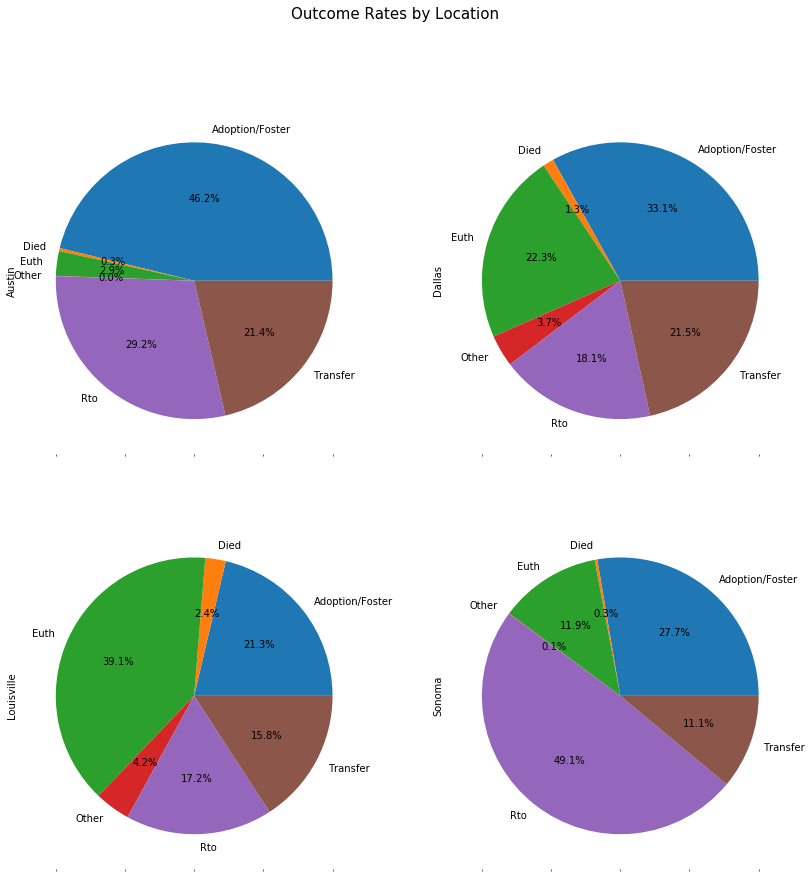

In [80]:
df = pd.pivot_table(merge_data, index = ['Outcome_Type'], values = 'Count', columns = 'Location', aggfunc = np.sum)

plot = df.plot.pie(subplots = True, figsize =(14, 14), layout= [2,2], 
                    legend = False, autopct= '%1.1f%%')

plt.suptitle('Outcome Rates by Location', fontsize = 15)

In Austin, a mere 2.9% of doges are euthanized with over 46% of their dogs adopted. Dogs transferred and returned to owner account for the remaining half of their shelter dogs. Dallas has the second to best adoption rate at 33.1%, however with euthanization rate of 22.3%. Louisville leads euthanization rates with almost 40% of dogs euthanized at the shelter whereas for other regions less than 25% of dogs are euthanized. The shelter also has the lowest adoption rate out of the four location at 21.3% and has the second to lowest transfer rate at 15.8% only to be trumped by Sonoma with a transfer rate of 11.1%. Largest portion of dogs at the shelter appears to have owners with almost 50% of the dogs returned to their owners. Considering this, the euthanization rate is still second to lowest

## 2a. Breed

Text(0.5, 1.0, 'Rate of Breed by Location')

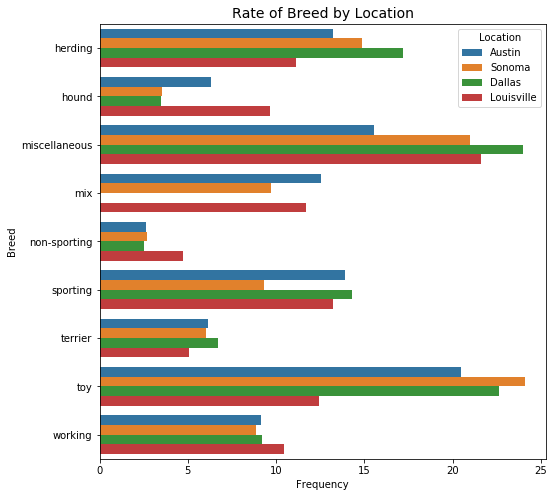

In [81]:
#bar graph of breed frequency by location
group_counts = (merge_data.groupby(['Location'])['Breed']
                .value_counts(normalize=True)
                .rename('Frequency')
                .mul(100)
                .reset_index()
                .sort_values('Breed').reset_index())
plt.ylabel('Dog Group')
sns.barplot(x = 'Frequency', y = 'Breed', hue = 'Location', data = group_counts)
plt.title('Rate of Breed by Location', fontsize = 14)

Generally, all the facilities tend to have similar distribution of the types of dogs taken in at these facilities with few exceptions. Toy and miscellaneous groups lead with the highest intake rates compared the other groups of dogs. A hypothesis for high miscellaneous breed at shelters could be because most dogs are mix of breeds and sometimes intakers can find it difficult to identify what breed mix was the dog. As a result, it’s far easier to classify them as miscellaneous. More surprisingly are the high rates of toy dogs among all regions. However, toy dogs in Louisville are more than 36% lower compared to Austin, Sonoma and Dallas. This indicates toy groups are uncommon in Louisville shelter. Also, Louisville tends to have higher intake of hound and non-sporting dogs than the other locations. In fact, Louisville, visually, has the most uniform distribution of breeds compared to other locations. Sonoma has 33% lower in sporting intake than the next lowest. Austin and Dallas have similar dog diversity. Dallas also does not include secondary breed as a part of their animal description and as a result does not have any counts in mix category. 

In [82]:
#explore adoption/foster outcomes by breed and location
adoption_counts = (merge_data[merge_data['Outcome_Type'] == 'Adoption/Foster']
                .groupby(['Location'])['Breed']
                .value_counts(normalize=True)
                .rename('Frequency')
                .mul(100)
                .reset_index()
                .sort_values('Breed').reset_index())

Text(0.5, 0.98, 'Adoption/Foster Behavior by Breed')

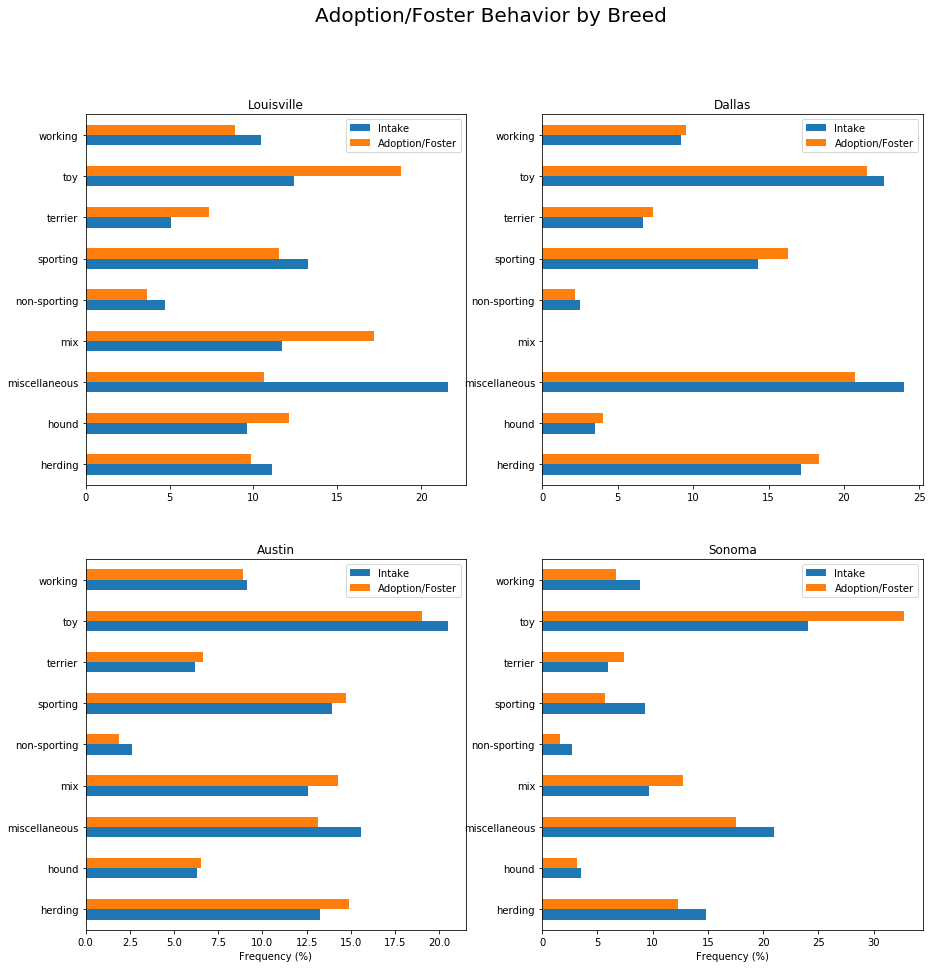

In [83]:
#setting intake = outcome, explore the adoptive nature by breed
breed_label= list(adoption_counts[adoption_counts['Location'] == 'Austin']['Breed'])
dallas_ad = list(adoption_counts[adoption_counts['Location'] == 'Dallas']['Frequency'])
dallas_in = list(group_counts[group_counts['Location'] == 'Dallas']['Frequency'])
dallas_ad.insert(3,0)
df_dallas_ad_in = pd.DataFrame({'Intake': dallas_in, 'Adoption/Foster': dallas_ad},index = breed_label)


austin_ad = list(adoption_counts[adoption_counts['Location'] == 'Austin']['Frequency'])
austin_in = list(group_counts[group_counts['Location'] == 'Austin']['Frequency'])
df_austin_ad_in = pd.DataFrame({'Intake': austin_in, 'Adoption/Foster': austin_ad}, index = breed_label)


sonoma_ad = list(adoption_counts[adoption_counts['Location'] == 'Sonoma']['Frequency'])
sonoma_in = list(group_counts[group_counts['Location'] == 'Sonoma']['Frequency'])
df_sonoma_ad_in = pd.DataFrame({'Intake': sonoma_in, 'Adoption/Foster': sonoma_ad}, index = breed_label)

louisville_ad = list(adoption_counts[adoption_counts['Location'] == 'Louisville']['Frequency'])
louisville_in = list(group_counts[group_counts['Location'] == 'Louisville']['Frequency'])
df_louisville_ad_in = pd.DataFrame({'Intake': louisville_in, 'Adoption/Foster': louisville_ad}, index = breed_label)

fig, axes = plt.subplots(2,2, figsize = (15,15))
df_louisville_ad_in.plot.barh(ax=axes[0,0])
df_dallas_ad_in.plot.barh(ax=axes[0,1])
df_austin_ad_in.plot.barh(ax=axes[1,0])
df_sonoma_ad_in.plot.barh(ax=axes[1,1])

axes[0,0].set_title('Louisville')
axes[0,1].set_title('Dallas')
axes[1,0].set_title('Austin')
axes[1,0].set_xlabel('Frequency (%)')
axes[1,1].set_title('Sonoma')
axes[1,1].set_xlabel('Frequency (%)')

fig.suptitle('Adoption/Foster Behavior by Breed', fontsize=20)

Adoption/foster frequency tends to align well with intake dog diversity at shelters. It’s most notably clear by the bar graphs of Dallas and Austin. However, miscellaneous dogs have lower adoption/foster rates than the intake rates and it’s most extreme in Louisville with percent difference by more than 50%. Toy and mix breeds are favored in Louisville and that of Sonoma overtakes intake frequency by 30%. However, do note these percentage is the profile of the adoption/foster and do not imply the demand is not met at these shelters. What could be said is in Louisville, toy and mix breed are most in demand, whereas toy, sporting, miscellaneous, and herding are most favored in Dallas. For other locations toy breeds are most in demand.  

In [84]:
#explore euthanization outcomes by breed and location
euth_counts = (merge_data[merge_data['Outcome_Type'] == 'Euth']
                .groupby(['Location'])['Breed']
                .value_counts(normalize=True)
                .rename('Frequency')
                .mul(100)
                .reset_index()
                .sort_values('Breed'))

Text(0.5, 0.98, 'Euthanization Behavior by Breed')

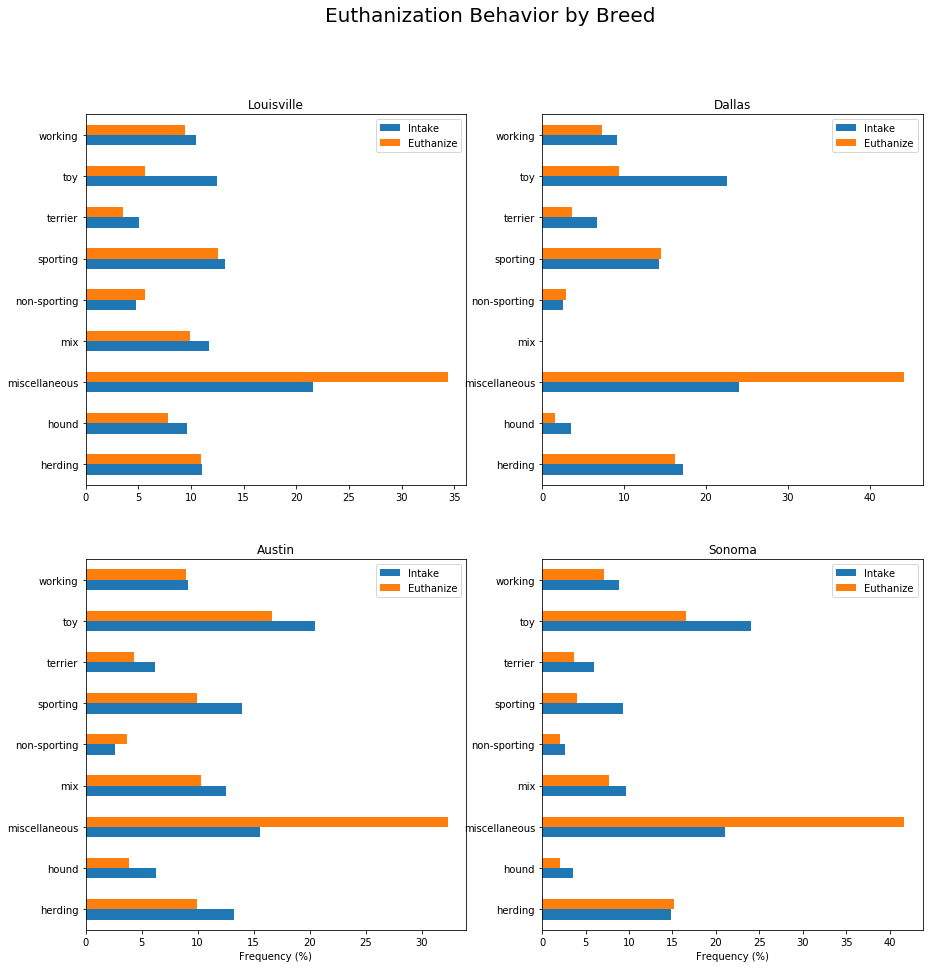

In [85]:
#setting intake = outcome, explore the euthaniztion nature by breed
dallas_eu = list(euth_counts[euth_counts['Location'] == 'Dallas']['Frequency'])
dallas_eu.insert(3,0)
df_dallas_eu_in = pd.DataFrame({'Intake': dallas_in, 'Euthanize': dallas_eu},index = breed_label)

austin_eu = list(euth_counts[euth_counts['Location'] == 'Austin']['Frequency'])
df_austin_eu_in = pd.DataFrame({'Intake': austin_in, 'Euthanize': austin_eu}, index = breed_label)

sonoma_eu = list(euth_counts[euth_counts['Location'] == 'Sonoma']['Frequency'])
df_sonoma_eu_in = pd.DataFrame({'Intake': sonoma_in, 'Euthanize': sonoma_eu}, index = breed_label)

louisville_eu = list(euth_counts[euth_counts['Location'] == 'Louisville']['Frequency'])
df_louisville_eu_in = pd.DataFrame({'Intake': louisville_in, 'Euthanize': louisville_eu}, index = breed_label)

fig, axes = plt.subplots(2,2, figsize = (15,15))
df_louisville_eu_in.plot.barh(ax=axes[0,0])
df_dallas_eu_in.plot.barh(ax=axes[0,1])
df_austin_eu_in.plot.barh(ax=axes[1,0])
df_sonoma_eu_in.plot.barh(ax=axes[1,1])

axes[0,0].set_title('Louisville')
axes[0,1].set_title('Dallas')
axes[1,0].set_title('Austin')
axes[1,0].set_xlabel('Frequency (%)')
axes[1,1].set_title('Sonoma')
axes[1,1].set_xlabel('Frequency (%)')

fig.suptitle('Euthanization Behavior by Breed', fontsize=20)

Miscellaneous breeds are most vulnerable for euthanization in all locations. They are over 50% more at risk than other breeds of dogs whereas toys seem to be least at risk for Louisville and Dallas with euthanization rate below 50% compared to the intake rate. In Austin and Sonoma, without accounting for miscellaneous breeds, the diversity for euthanization generally match up with the intake frequency of each group of dogs. Herding and non-sporting is most at risk in Austin and hound is least at risk proportional wise. Sporting is disproportionally least at risk in Sonoma with more than 50% slip from the intake distribution. 

Text(0.5, 0.98, 'Transfer Behavior by Breed')

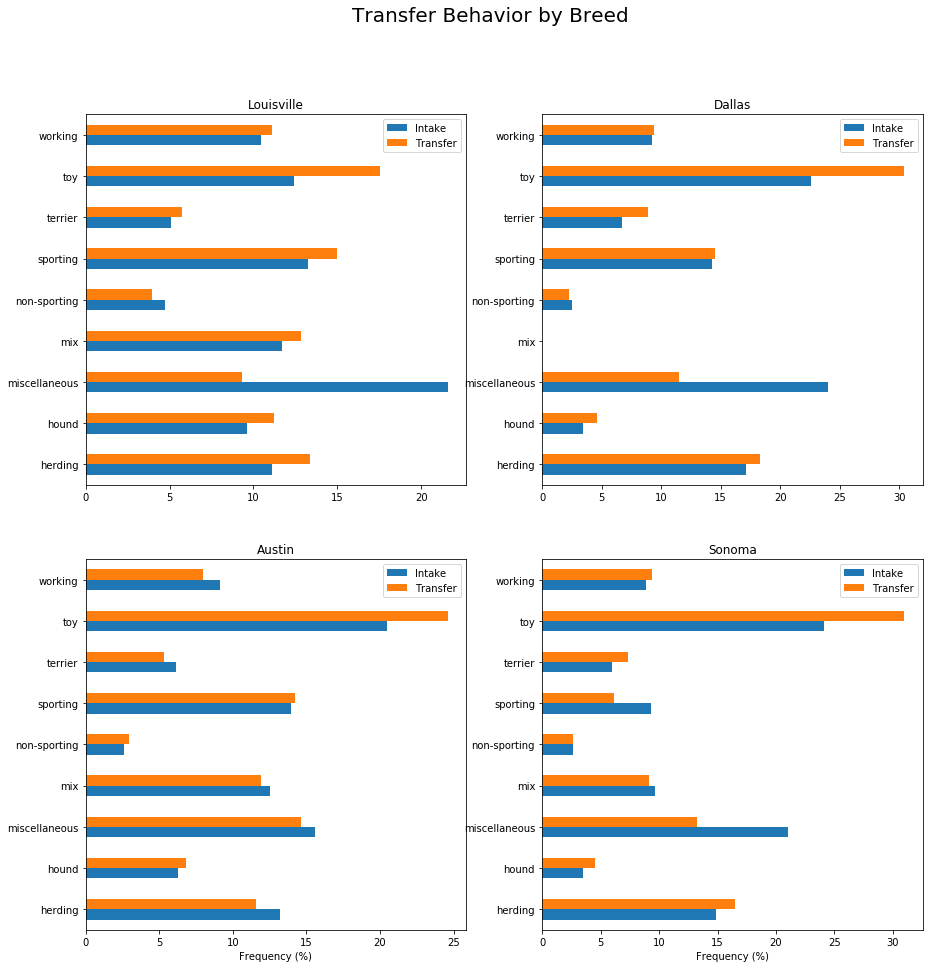

In [86]:
#explore euthanization outcomes by breed and location
trans_counts = (merge_data[merge_data['Outcome_Type'] == 'Transfer']
                .groupby(['Location'])['Breed']
                .value_counts(normalize=True)
                .rename('Frequency')
                .mul(100)
                .reset_index()
                .sort_values('Breed'))


#setting intake = outcome, explore the euthaniztion nature by breed
dallas_tr = list(trans_counts[trans_counts['Location'] == 'Dallas']['Frequency'])
dallas_tr.insert(3,0)
df_dallas_tr = pd.DataFrame({'Intake': dallas_in, 'Transfer': dallas_tr},index = breed_label)

austin_tr = list(trans_counts[trans_counts['Location'] == 'Austin']['Frequency'])
df_austin_tr = pd.DataFrame({'Intake': austin_in, 'Transfer': austin_tr}, index = breed_label)

sonoma_tr = list(trans_counts[trans_counts['Location'] == 'Sonoma']['Frequency'])
df_sonoma_tr = pd.DataFrame({'Intake': sonoma_in, 'Transfer': sonoma_tr}, index = breed_label)

louisville_tr = list(trans_counts[trans_counts['Location'] == 'Louisville']['Frequency'])
df_louisville_tr = pd.DataFrame({'Intake': louisville_in, 'Transfer': louisville_tr}, index = breed_label)

fig, axes = plt.subplots(2,2, figsize = (15,15))
df_louisville_tr.plot.barh(ax=axes[0,0])
df_dallas_tr.plot.barh(ax=axes[0,1])
df_austin_tr.plot.barh(ax=axes[1,0])
df_sonoma_tr.plot.barh(ax=axes[1,1])

axes[0,0].set_title('Louisville')
axes[0,1].set_title('Dallas')
axes[1,0].set_title('Austin')
axes[1,0].set_xlabel('Frequency (%)')
axes[1,1].set_title('Sonoma')
axes[1,1].set_xlabel('Frequency (%)')

fig.suptitle('Transfer Behavior by Breed', fontsize=20)

Transfer rates by toy breed overwhelmingly exceeds other breeds and the transfer percentage outpacing intake percentage. There appears to be some sort of mechanism for choosing breeds for transfer in these shelter that is independent of intake breeds

## 2b. Gender

In [87]:
#pivot table of outcome type by sex and location
outcome_sex = pd.pivot_table(merge_data, values = 'Count', 
               index = ['Outcome_Type', 'Sex'], 
               columns = ['Location'], 
               aggfunc = np.sum, margins = True)

#define a percentage column
outcome_sex['Percentage'] = round(outcome_sex['All']/141109*100,2)

#calculate female, male, unknown percentage
female_pct = round(sum(merge_data[merge_data['Sex'] == 'Female']['Count'])/141109*100,1)
male_pct = round(sum(merge_data[merge_data['Sex'] == 'Male']['Count'])/141109*100,1)
unknown_pct = round(sum(merge_data[merge_data['Sex'] == 'Unknown']['Count'])/141109*100,2)

#create a dummy relative percentage column
outcome_sex['Relative Percentage'] = float(100)

#function to calculate relative percentage. Since unknown values is low, we can assume 50/50 calculation of male/female
i = 0
ind = 0
total = 0
for percent in outcome_sex['Percentage'][:-1]:
    if i == 0:
        outcome_sex['Relative Percentage'][ind] = outcome_sex['Percentage'][ind]/50*male_pct
    elif i == 1:
        outcome_sex['Relative Percentage'][ind] = outcome_sex['Percentage'][ind]/50*female_pct
    else:
        outcome_sex['Relative Percentage'][ind] = outcome_sex['Percentage'][ind]/50*unknown_pct
        i=-1
    total +=outcome_sex['Relative Percentage'][ind]
    i+=1
    ind+=1

outcome_sex['Relative Percentage'] = round(outcome_sex['Relative Percentage']/total*100,2)
outcome_sex['Relative Percentage'][-1] = float(100)

print('Female accounts for ' + str(female_pct)+ '% of the population')
print('Male accounts for ' + str(male_pct) + '% of the population')
print('Unknown accounts for ' + str(unknown_pct) + '% of the population')

outcome_sex

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Female accounts for 45.0% of the population
Male accounts for 53.8% of the population
Unknown accounts for 1.16% of the population


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Location                  Austin  Louisville  Sonoma     All  Percentage  \
Outcome_Type    Sex                                                        
Adoption/Foster Female   12386.0      7826.0  1214.0   21426       15.18   
                Male     13059.0      8569.0  1313.0   22941       16.26   
                Unknown      1.0         5.0     1.0       7        0.00   
Died            Female      79.0       763.0     8.0     850        0.60   
                Male        93.0       937.0    16.0    1046        0.74   
                Unknown     18.0       143.0     5.0     166        0.12   
Euth            Female     646.0     13110.0   435.0   14191       10.06   
                Male       908.0     16100.0   639.0   17647       12.51   
                Unknown     33.0       878.0    10.0     921        0.65   
Other           Female       8.0      1498.0     1.0    1507        1.07   
                Male        11.0      1679.0     3.0    1693        1.20   
                Unknown      NaN        19.0     1.0      20        0.01   
Rto             Female    6656.0      5392.0  1863.0   13911        9.86   
                Male      9345.0      7743.0  2598.0   19686       13.95   
                Unknown     53.0        65.0    23.0     141        0.10   
Transfer        Female    5520.0      5683.0   427.0   11630        8.24   
                Male      6040.0      6353.0   557.0   12950        9.18   
                Unknown    209.0       142.0    26.0     377        0.27   
All                      55065.0     76905.0  9140.0  141110      100.00   

Location                 Relative Percentage  
Outcome_Type    Sex                           
Adoption/Foster Female                 16.85  
                Male                   15.10  
                Unknown                 0.00  
Died            Female                  0.67  
                Male                    0.69  
                Unknown                 0.00  
Euth            Female                 11.17  
                Male                   11.62  
                Unknown                 0.02  
Other           Female                  1.19  
                Male                    1.11  
                Unknown                 0.00  
Rto             Female                 10.95  
                Male                   12.95  
                Unknown                 0.00  
Transfer        Female                  9.15  
                Male                    8.53  
                Unknown                 0.01  
All                                   100.00

Since the percentage of female dogs and male dogs are differnet, where female accounts for 45% and males accounts for 53.8%, it's much more appropriate to use relative percentage to understand the outcome tendencies. Examining adoption now, female adoption/foster have more than 1 percentage point higher than male adoption/foster in relative percentage. Euthanization rate among the two is relatively similar with only 0.5% difference at 11.17% and 11.62% for female and male respectively. Male have 200 higher basis points above female for RTO ("return to owner"). Statistical analysis will further clarify the significance of the difference.

First, it's interesting to see that the spread between male and female intake proportion is almost 9%. We want to know whether male dogs are more likely to enter a shelter than a female dog. <br>
Null hypothesis = intake rate of male dog is equal to intake of female dog--p(male intake) = p(female intake) <br>
Alternative hypothesis: intake rate of male dog is higher than that of female dog--p(male intake) > p(female intake) <br>
alpha = 0.05

In [88]:
# find prop of female
female = sum(merge_data['Sex'] == 'Female')
male = sum(merge_data['Sex'] == 'Male')
total = female + male
prop = female/total

In [89]:
#simulation approach
np.random.seed(10)
simulate = np.empty(10000)
for i in range(10000):
    sample = np.mean(np.random.randint(2, size=total))
    simulate[i] = sample

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

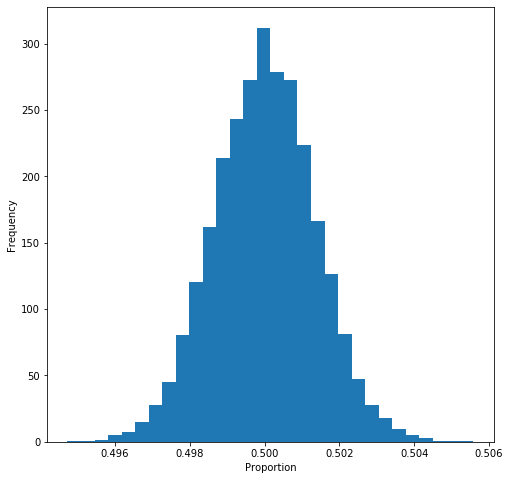

In [90]:
plt.hist(simulate, bins = 30, normed = True)
plt.xlabel('Proportion')
plt.ylabel('Frequency')

In [91]:
p_value = (np.sum(simulate >= (1-prop)))/10000
print('p-value:', p_value)

p-value: 0.0


In [92]:
#mathematical approach
stand_err = np.sqrt(.5*.5/total)
p_val = stats.norm.cdf((prop-.05)/stand_err)
print('p-value', p_value)

p-value 0.0


Because p-value is less than alpha, we reject the null hypothesis and accept the alternative hypothesis that female dogs tends to be end up in shelter less often than male dogs

Since the adoption proportionality between male and female is so similar, we like to conduct an hypothesis testing to verify the significance of the difference. <br>
Null hypothesis: Male adoption rate is equal to female adoption rate <br>
Alternative hypothesis: Male adoption rate is higher than female adoption rate. <br>
alpha = 0.05

In [93]:
data = merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
f = np.sum(data.Sex == 'Female')
m = np.sum(data.Sex == 'Male')
t = f+m
prop = f/t

In [94]:
sim = np.empty(10000)
for i in range(10000):
    sample = np.mean(np.random.randint(2,size = t))
    sim[i] = sample

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

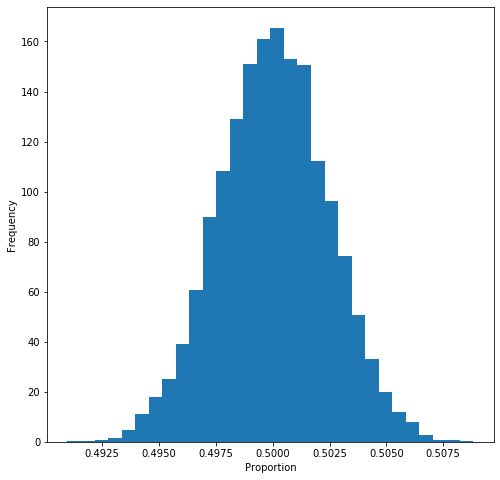

In [95]:
plt.hist(sim, bins = 30, normed = True)
plt.xlabel('Proportion')
plt.ylabel('Frequency')

In [96]:
p_value = (np.sum(sim>= (1-prop)))/10000
print('p-value:', p_value)

p-value: 0.0


Because p-value is less than alpha, we reject the null hypothesis and accept the alternative hypothesis that adoption rate of a female dog is higher than that of a male dog

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


Text(0.5, 1.0, 'Rate of Outcome by Sex')

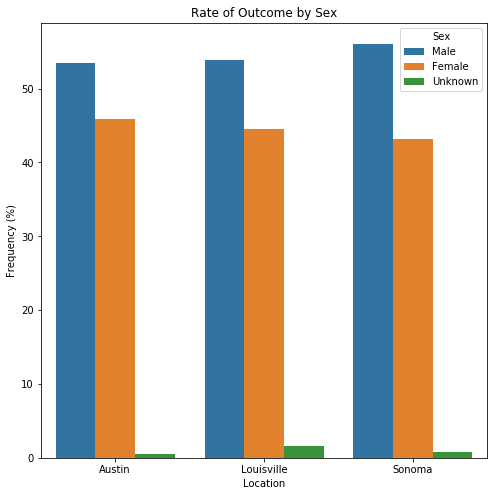

In [97]:
#Outcome by sex and location
sex_adopt = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Adoption/Foster']
            .groupby(['Location'])['Sex']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index())

sex_euth = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Euth']
            .groupby(['Location'])['Sex']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index())

sex_tr = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Transfer']
            .groupby(['Location'])['Sex']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index())

sex = (merge_data[merge_data.Location != 'Dallas']
            .groupby(['Location'])['Sex']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index())

sns.barplot(data = sex, x = 'Location', y = 'Frequency', hue = 'Sex')
plt.ylabel('Frequency (%)')
plt.title('Rate of Outcome by Sex')

More male dogs are taken to shelters than females or unknown genders with largest differential in sonoma

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'Relative Transfer by Sex')

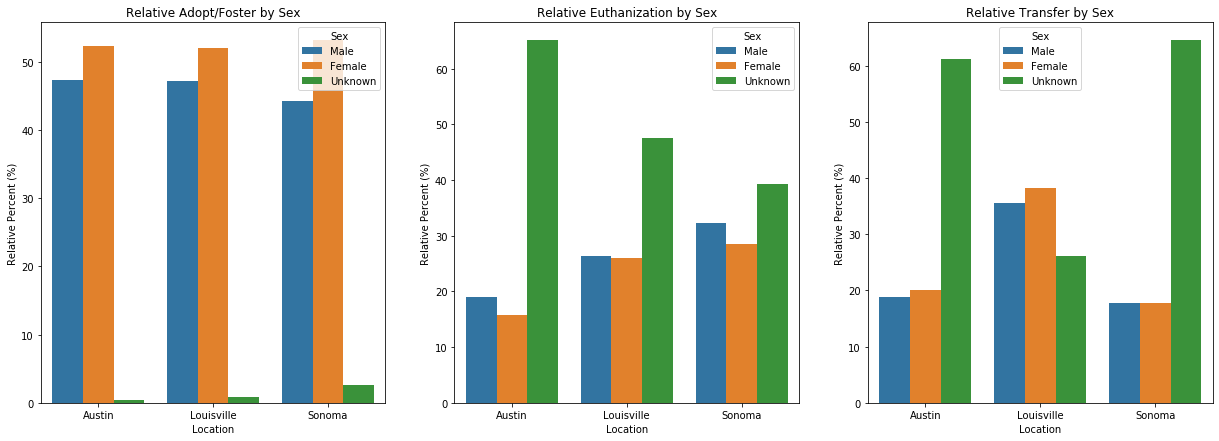

In [98]:
def relPCT(x, general):
    """calculate relative percentage using a general dataset onto x dataset"""
    """x = modifying dataframe"""
    """general = general dataframe from which absolute frequencies is extrapolated"""
    ind = 0
    x['Relative PCT'] = float(0)
    total = 0
    loc = len(x.Location.unique())
    len_x = len(x)
    check_ind = len_x/loc
    rel_val = []
    count = 1
    for percent in general.Frequency:
        x['Relative PCT'][ind] = x['Frequency'][ind]/percent
        total += x['Relative PCT'][ind]
        if count<check_ind:
            count+=1
        else:
            rel_val.append(total)
            count = 1
            total = 0
        ind+=1
    rel_val.append(0)
    count = 1
    total = rel_val[0]
    i = 0
    ind=0
    for num in x['Relative PCT']:
        x['Relative PCT'][ind] = x['Relative PCT'][ind]/total*100
        if count < check_ind:
            count +=1
        else:
            count = 1
            i +=1
            total = rel_val[i]
        ind+=1

relPCT(sex_adopt, sex)
relPCT(sex_euth, sex)
relPCT(sex_tr, sex)

#bar graph relative percentage of adoption and euthanization by sex discriminated by location
plt.figure(figsize = (21,7))
plt.subplot(1,3,1)
sns.barplot(data = sex_adopt, x = 'Location', y = 'Relative PCT', hue = 'Sex')
plt.title('Relative Adopt/Foster by Sex')
plt.ylabel('Relative Percent (%)')

plt.subplot(1,3,2)
sns.barplot(data = sex_euth, x = 'Location', y = 'Relative PCT', hue = 'Sex')
plt.title('Relative Euthanization by Sex')
plt.ylabel('Relative Percent (%)')

plt.subplot(1,3,3)
sns.barplot(data = sex_tr, x = 'Location', y = 'Relative PCT', hue = 'Sex')
plt.ylabel('Relative Percent (%)')
plt.title('Relative Transfer by Sex')

Even though percentage of female dogs picked for adoption is lower than male, the relative proportion suggest that adopters/fosterers tend to favor female dogs at 16.9% and 15.1% for female and male adoption rates respectively. The bar graphs reveals that across all location, female is more favorable to adopt than male dogs using relative percentage. Sonoma has the largest difference with 6%. Unknown gender is the least likely to be adopted. Instead unknown gender dogs are disproportionally euthanized across all location with the most extreme case in Austin. Unknown gender is almost 2 times more likely to be euthanized in Austin. Generally male dogs are more likely to be euthanized than female dogs. 

C:\Users\sadmin\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


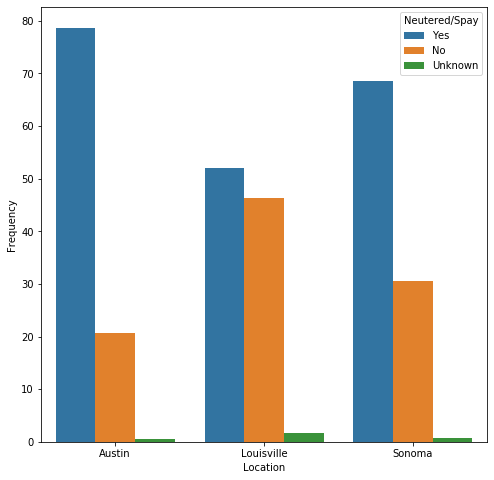

In [99]:
neut_spay = (merge_data[merge_data != 'Dallas'].groupby(['Location'])['Neutered/Spay']
             .value_counts(normalize = True)
             .mul(100)
             .rename('Frequency')
             .reset_index())
sns.barplot(data = neut_spay, x = 'Location', y = 'Frequency', hue = 'Neutered/Spay')

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0.5, 1.0, 'Rate of Outcome by Neutered/Spay')

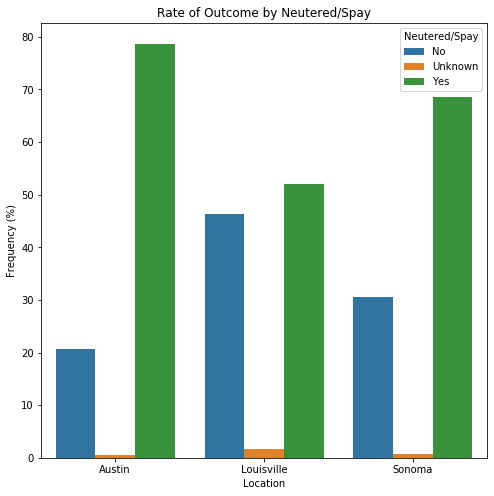

In [100]:
#Outcome by neutered and Location
neut_adopt = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Adoption/Foster']
            .groupby(['Location'])['Neutered/Spay']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index()
            .sort_values('Neutered/Spay'))


neut_euth = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Euth']
            .groupby(['Location'])['Neutered/Spay']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index()
            .sort_values('Neutered/Spay'))

neut_tr = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Transfer']
            .groupby(['Location'])['Neutered/Spay']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index()
            .sort_values('Neutered/Spay'))


neut = (merge_data[merge_data.Location != 'Dallas']
            .groupby(['Location'])['Neutered/Spay']
            .value_counts(normalize = True)
            .mul(100)
            .rename('Frequency')
            .reset_index()
            .sort_values('Neutered/Spay'))

sns.barplot(data = neut, x = 'Location', y = 'Frequency', hue = 'Neutered/Spay')
plt.ylabel('Frequency (%)')
plt.title('Rate of Outcome by Neutered/Spay')

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'Relative Transfer by Neutered/Spay')

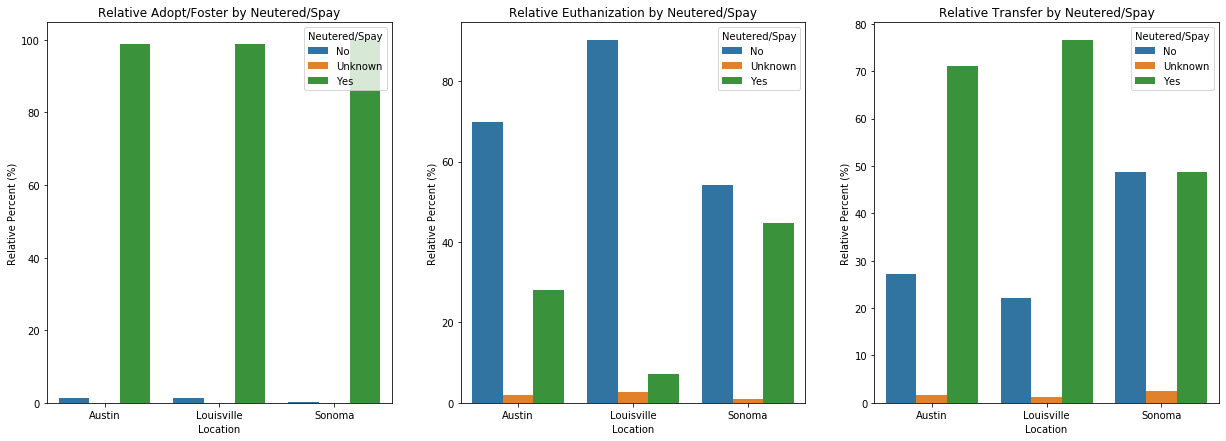

In [101]:
relPCT(neut_adopt, neut)
relPCT(neut_euth, neut)
relPCT(neut_tr, neut)

#bar graph relative percentage of adoption and euthanization by sex discriminated by location
plt.figure(figsize = (21,7))
plt.subplot(1,3,1)
sns.barplot(data = neut_adopt, x = 'Location', y = 'Relative PCT', hue = 'Neutered/Spay')
plt.title('Relative Adopt/Foster by Neutered/Spay')
plt.ylabel('Relative Percent (%)')

plt.subplot(1,3,2)
sns.barplot(data = neut_euth, x = 'Location', y = 'Relative PCT', hue = 'Neutered/Spay')
plt.title('Relative Euthanization by Neutered/Spay')
plt.ylabel('Relative Percent (%)')

plt.subplot(1,3,3)
sns.barplot(data = neut_tr, x = 'Location', y = 'Relative PCT', hue = 'Neutered/Spay')
plt.ylabel('Relative Percent (%)')
plt.title('Relative Transfer by Neutered/Spay')

Overwhelming number of dogs adopted or fostered are nuetered/spayed. Negligible relative percentage of adoption/foster dogs are not sterile or have unknown gender. On the other hand, euthanization tends to target nonsterile dogs where in Louisville over 80 relative percentage of dogs euthanized are not sterile. Although for other locations the relative percentages differ, sterilization is undoubtly one of the key contributor to the adoption and euthaniztion of dogs. Most dogs that are transfered are also neutered or spayed. Sterilization for dogs tends to not have as dramatic effect on euthanization and transfer rates in Sonoma.

## 2c. Age

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Austin adoption median age is 1.1 years old
Louisville adoption median age is 1.1 years old
Sonoma adoption median age is 1.5 years old


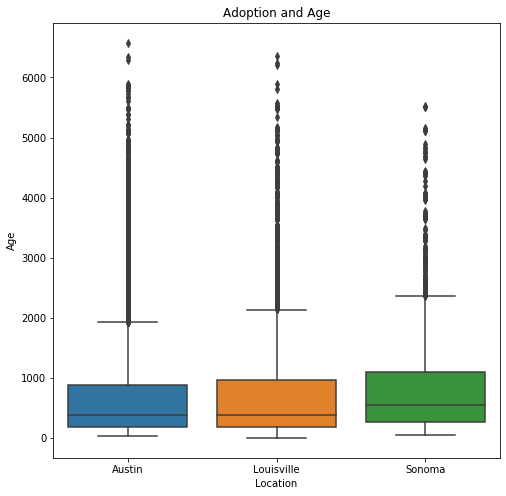

In [102]:
#grouping adoption by breed and age
merge_noDallas_adopt = (merge_data[merge_data['Location'] != 'Dallas']
                  [merge_data['Outcome_Type'] == 'Adoption/Foster']
                  .sort_values(['Location', 'Breed']))
sns.boxplot(x='Location', y = 'Age', data = merge_noDallas_adopt)
plt.title('Adoption and Age')
median_age_adopt = (merge_noDallas_adopt.groupby('Location')['Age']
              .median().rename('Median')
              .reset_index())

print('Austin adoption median age is', round(median_age_adopt.Median[0]/365, 1), 'years old')
print('Louisville adoption median age is', round(median_age_adopt.Median[1]/365, 1), 'years old')
print('Sonoma adoption median age is', round(median_age_adopt.Median[2]/365, 1), 'years old')

Median adoption ages are 1.1, 1.1 and 1.5 years old for Austin, Louisville, and Sonoma respectively. 25% of adopted/fostered dogs are above 6.5 years old. As noted in Fig. 9, range for adoption/foster spread from less than a couple days old to over 6000 days (16.4 years old). In Austin, there is a large gap between dogs under 6000 days old and those over and these could be mislabeled. As mentioned before Age is an area that may require further feature engineering. Prior to this, all dogs over 20 years old were considered mislabeled and set to the average age. Similar gapping phenomenon could be seen in Louisville and Sonoma. Sonoma has the lowest spread for adoption/foster with max adoption/foster age just around 5500 days old. 

In [103]:
sono = (merge_data[merge_data['Location'] == 'Sonoma']
         [merge_data['Outcome_Type'] == 'Adoption/Foster']
         ['Age'].dropna())
louis = (merge_data[merge_data['Location'] == 'Louisville']
        [merge_data['Outcome_Type'] == 'Adoption/Foster']
        ['Age'].dropna())
aust = (merge_data[merge_data['Location'] == 'Austin']
        [merge_data['Outcome_Type'] == 'Adoption/Foster']
        ['Age'].dropna())
mean_l = np.mean(louis)
mean_s = np.mean(sono)
mean_a = np.mean(aust)
diff = mean_a - mean_l

print('Austin adoption mean age is', round(mean_a/365, 1), 'years old')
print('Louisville adoption mean age is', round(mean_l/365, 1), 'years old')
print('Sonoma adoption mean age is', round(mean_s/365, 1), 'years old')

Austin adoption mean age is 2.1 years old
Louisville adoption mean age is 2.0 years old
Sonoma adoption mean age is 2.4 years old


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Sonoma's adoption rate is less susceptible to age and has a higher median age of adoption than that of both Austin and Louisville. On the other hand, Austin and Louisville have similar median age for adoption. To test this, a bootstrap approach to analyzing actual median difference between Sonoma and Austin to examine whether the difference is significant. 

Null hypothesis: μ(adoption age of Austin) = μ(adoption age of Sonoma) <br>
Alternative hypthoesis: μ(adoption age of Austin) < μ(adoption age of Sonoma) <br>
alpha = .05

In [104]:
#bootstrap permutation approach
combined_df = aust.append(sono)
diff = mean_a - mean_l
store_perm = np.empty(10000)
for i in range(10000):
    perm = np.random.choice(combined_df, size = len(combined_df))
    boot_mean_a = np.mean(perm[:len(aust)])
    boot_mean_l = np.mean(perm[len(aust):])
    diff_mean = boot_mean_a - boot_mean_l
    store_perm[i] = diff_mean

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'Bootstrap Distribution of Mean Difference')

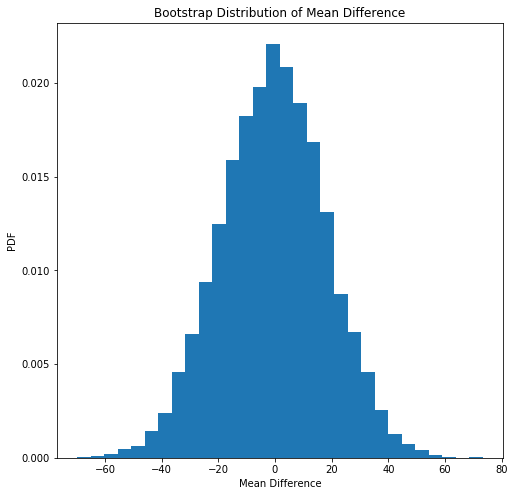

In [105]:
#plot the histogram of the bootstrap mean difference
plt.hist(store_perm, bins = 30, normed = True)
plt.xlabel('Mean Difference')
plt.ylabel('PDF')
plt.title('Bootstrap Distribution of Mean Difference')

In [106]:
p = np.sum(store_perm >= diff)/10000
print('p-value is', p)

p-value is 0.0133


Because p-value is lower than alpha of 0.5, we reject the null hypothesis and accept the alternative hypothesis that Austin has a larger average age of adoption than Louisville.

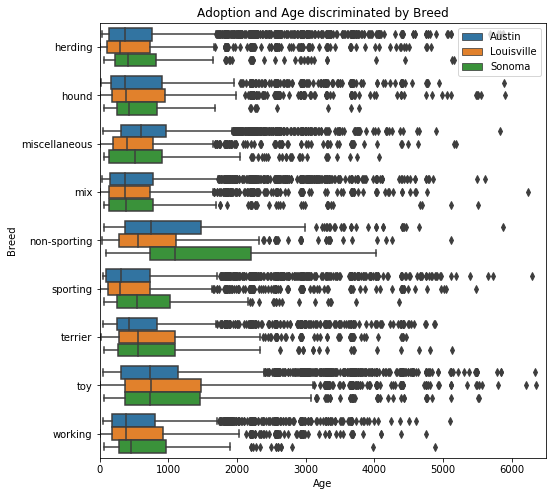

In [107]:
#adoption rate by breed and age
sns.boxplot(x='Age', y = 'Breed', hue = 'Location', data = merge_noDallas_adopt)
plt.title('Adoption and Age discriminated by Breed')
plt.xlim((0,6500))
plt.legend(loc = 'upper right')

To further investigate the age effects, breed was used to further categorized the adoptability. For the most part, median adoption/foster age among all the breed aligns well by location. Nonsporting stood out in Sonoma having median age far surpassed the other location by almost a year old. Sonoma also stood out in sporting breeds with median adoption/foster age around 700 days compared to 500 days for Louisville and Austin. In fact, the lower 25 percentile for adoption/foster at Sonoma is the median for Louisville and Austin in the sporting breed. Toy breed has the highest median adoption/foster age across all location at around 750 days old. 

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Austin euthanization median age is 3.0 years old
Louisville euthanization median age is 2.5 years old
Sonoma euthanization median age is 3.1 years old


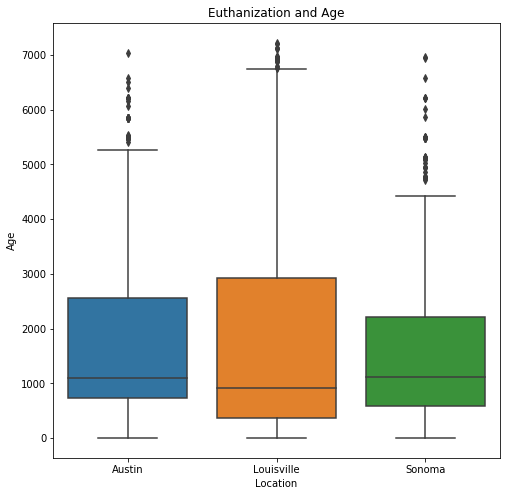

In [108]:
#grouping euthanization by breed and age
merge_noDallas_euth = (merge_data[merge_data['Location'] != 'Dallas']
                  [merge_data['Outcome_Type'] == 'Euth']
                  .sort_values(['Location', 'Breed']))
sns.boxplot(x='Location', y = 'Age', data = merge_noDallas_euth)
plt.title('Euthanization and Age')

median_age_euth = (merge_noDallas_euth.groupby('Location')['Age']
              .median().rename('Median')
              .reset_index())

print('Austin euthanization median age is', round(median_age_euth.Median[0]/365,1), 'years old')
print('Louisville euthanization median age is', round(median_age_euth.Median[1]/365,1), 'years old')
print('Sonoma euthanization median age is', round(median_age_euth.Median[2]/365,1), 'years old')

In [109]:
sono = (merge_data[merge_data['Location'] == 'Sonoma']
         [merge_data['Outcome_Type'] == 'Euth']
         ['Age'].dropna())
louis = (merge_data[merge_data['Location'] == 'Louisville']
        [merge_data['Outcome_Type'] == 'Euth']
        ['Age'].dropna())
aust = (merge_data[merge_data['Location'] == 'Austin']
        [merge_data['Outcome_Type'] == 'Euth']
        ['Age'].dropna())
mean_l = np.mean(louis)
mean_s = np.mean(sono)
mean_a = np.mean(aust)
diff = mean_l - mean_s

print('Austin euthanization mean age is', round(mean_a/365, 1), 'years old')
print('Louisville euthanization mean age is', round(mean_l/365, 1), 'years old')
print('Sonoma euthanization mean age is', round(mean_s/365, 1), 'years old')

Austin euthanization mean age is 4.7 years old
Louisville euthanization mean age is 4.8 years old
Sonoma euthanization mean age is 4.6 years old


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Louisville is more discriminating against age in terms of euthanization with a median euthanization age of 2.5 years old as opposed to 3 years old for both Austin and Sonoma. However, the mean age of euthanization for all location is about 4.7 years old, showing that the distribution is extremely right skewed. Because the mean euthanization ages are so similar in all three locations, we should test whether they are the same.
<br>
<br>
Null hypothesis: Mean euthanization rate of Louisville and that of Austin are the same <br>
Alternative hypothesis: Mean Euthanization rate of louisville and Austin  are different <br>
alpha = 0.05

In [110]:
combined = louis.append(sono)

#bootstrap
sim = np.empty(10000)
for i in range(10000):
    perm = np.random.choice(combined, size = len(combined))
    bootmean_s = np.mean(perm[:len(sono)])
    bootmean_l = np.mean(perm[len(sono):])
    boot_diff = bootmean_l-bootmean_s
    sim[i] = boot_diff

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

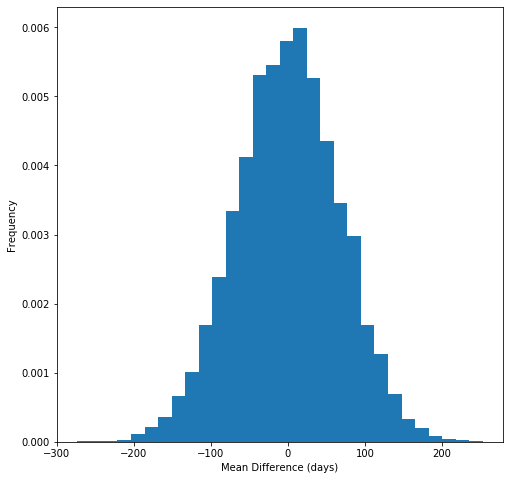

In [111]:
plt.hist(sim, bins = 30, normed = True)
plt.xlabel('Mean Difference (days)')
plt.ylabel('Frequency')

In [112]:
p_value = (np.sum(sim >= diff) + np.sum(sim <= -diff))/10000
print('p-value :', p_value)

p-value : 0.1937


Because the p-value is greater than alpha, we accept the null hypothesis and reject the alternative hypothesis.

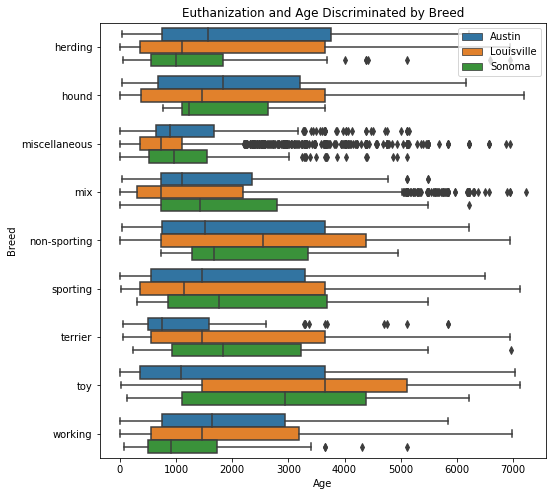

In [113]:
sns.boxplot(x='Age', y = 'Breed', hue = 'Location', data = merge_noDallas_euth)
plt.title('Euthanization and Age Discriminated by Breed')
plt.legend(loc = 'upper right')

Median age of euthanization by breed is all over the place without a clear pattern.

y = 1.579x + 692.694
r-value: 0.187


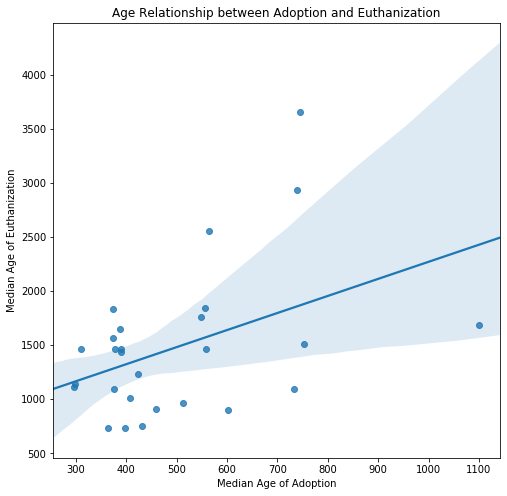

In [114]:
#formulate a regression of Adoption and Euthanization Relationship by Median Age of Dog Breeds
median_euth = (merge_noDallas_euth.groupby(['Location', 'Breed'])
               ['Age'].median()
               .rename('Median_Age')
               .reset_index())

median_adopt = (merge_noDallas_adopt.groupby(['Location', 'Breed'])
               ['Age'].median()
               .rename('Median_Age')
               .reset_index())

sns.regplot(x = median_adopt.Median_Age, y = median_euth.Median_Age)
plt.xlabel('Median Age of Adoption')
plt.ylabel('Median Age of Euthanization')
plt.title('Age Relationship between Adoption and Euthanization')
slope, intercept, r_value, p_value, std_err = stats.linregress(x = median_adopt.Median_Age, y = median_euth.Median_Age)
print('y = ' + str(round(slope, 3)) + 'x + ' + str(round(intercept, 3)))
print('r-value:', round(r_value**2, 3))

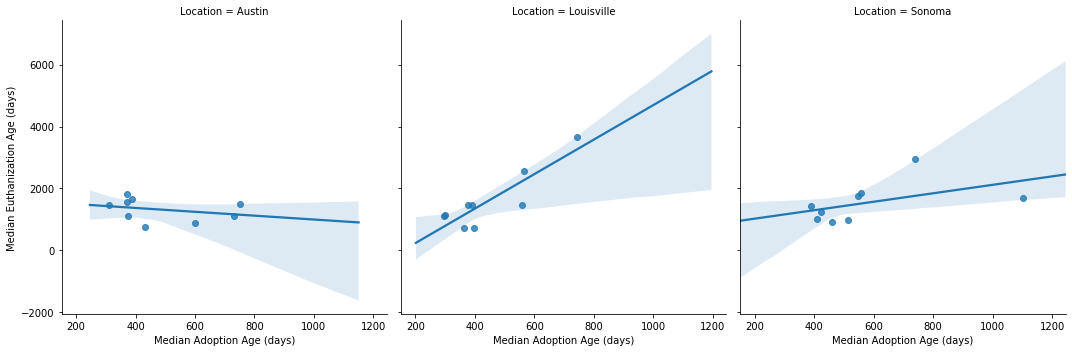

In [115]:
result = pd.merge(median_adopt, median_euth, how = 'inner', on = ['Location', 'Breed'])
result = result.rename(columns = {'Median_Age_x': 'Median Adoption Age (days)',
                         'Median_Age_y': 'Median Euthanization Age (days)'})
sns.lmplot(x = 'Median Adoption Age (days)', y = 'Median Euthanization Age (days)', col = 'Location', data = result)

In [116]:
#create a statistical table of the regression 
def stat_table(dataframe, ind, Location, x_name, y_name):
    result = {}
    for i in range(len(Location)):
        x = dataframe[x_name][ind*i:ind*i+ind]
        y = dataframe[y_name][ind*i:ind*i+ind]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x , y)
        if 'regression' in result:
            result['regression'].append('y = ' + str(round(slope, 3)) + 'x + ' + str(round(intercept, 3)))
        else:
            result['regression'] = ['y = ' + str(round(slope, 3)) + 'x + ' + str(round(intercept, 3))]
        if 'r square' in result:
            result['r square'].append(round(r_value**2, 3))
        else:
            result['r square'] = [round(r_value**2, 3)]
        if 'p_value' in result:
            result['p_value'].append(round(p_value, 3))
        else:
            result['p_value'] = [round(p_value, 3)]
    result['Location'] = Location
    df_result = pd.DataFrame(data = result)
    return df_result.set_index('Location')
stat_table(result, 9, ['Austin', 'Louisville', 'Sonoma'], 
           'Median Adoption Age (days)', 'Median Euthanization Age (days)')

,regression,r square,p_value
Location,,,
Austin,y = -0.623x + 1619.11,0.080,0.459
Louisville,y = 5.571x + -879.339,0.765,0.002
Sonoma,y = 1.365x + 751.324,0.235,0.186


With euthanization median and the adoption/foster median of the dog groups, regression lines of the relationship between adoption/foster and euthanization were constructed. Louisville shows a strong linear relationship between adoption and euthanization ages with a p-value of 0.002 and a r2 value of 0.765. For the other locations, the regression lines are weaker and do not show statistical significance with p-value over 0.15. However, for Sonoma, there appears to be a slight positive correlation and it seems the median age for adopting/fostering non-sporting offset the entire regression curve. If that data point is taken out, the correlation will be stronger than the current value. For Austin the regression is essentially flat with weak correlation value. Austin almost seems as if there is a cut off median age for euthanization at around 2000 days old regardless of the median age of adoption. 

## 2d. Pure/Mix

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


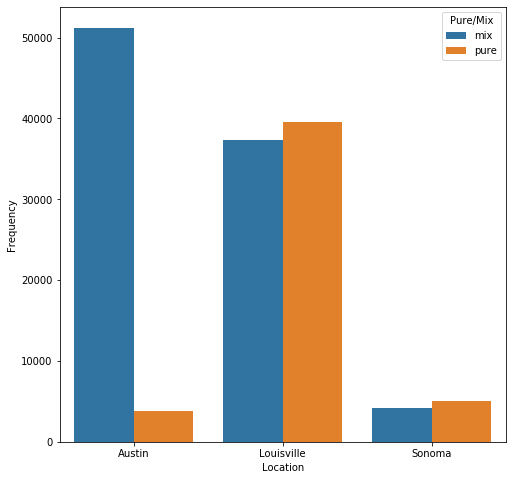

In [117]:
pure_mix_adopt = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Adoption/Foster']
            .groupby(['Location'])['Pure/Mix']
            .value_counts()
            .rename('Frequency')
            .reset_index())

pure_mix_euth = (merge_data[merge_data.Location != 'Dallas'][merge_data.Outcome_Type == 'Euth']
                 .groupby(['Location'])['Pure/Mix']
                 .value_counts()
                 .rename('Frequency')
                 .reset_index())

pure_mix = (merge_data[merge_data.Location != 'Dallas']
            .groupby(['Location'])['Pure/Mix']
            .value_counts()
            .rename('Frequency')
            .reset_index())

sns.barplot(data = pure_mix, x = 'Location', y = 'Frequency', hue = 'Pure/Mix')

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'Euthanization by Breed Purity')

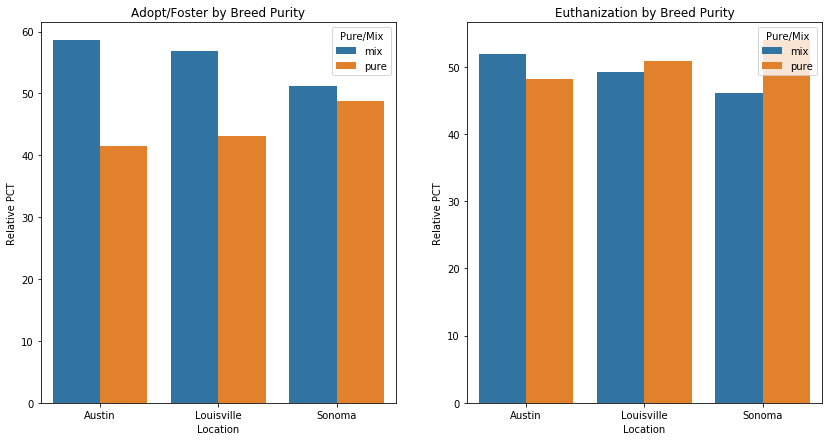

In [118]:
#create a relative percentage column to normalize the results
relPCT(pure_mix_euth, pure_mix)
relPCT(pure_mix_adopt, pure_mix)

#plot the relative percentage as bar graphs
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
sns.barplot(data = pure_mix_adopt, x = 'Location', y = 'Relative PCT', hue = 'Pure/Mix')
plt.title('Adopt/Foster by Breed Purity')

plt.subplot(1,2,2)
sns.barplot(data = pure_mix_euth, x = 'Location', y = 'Relative PCT', hue = 'Pure/Mix')
plt.title('Euthanization by Breed Purity')

It appears that mix dogs are more adoptable where in Austin the difference between mix and pure is almost 20%. Euthanization appears to be similar between mix and pure where for Austin, mix is more likely to be euthanized compare to pure breed and vice versa for louisville and Sonoma.

## 2e. Color

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


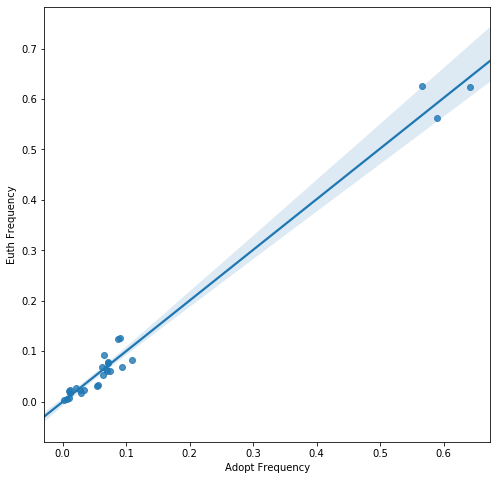

In [119]:
color_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
               [merge_data['Location'] != 'Dallas']
               .groupby(['Location'])['Color']
               .value_counts(normalize = True)
               .rename('Adopt Frequency').reset_index()
               .sort_values(['Location', 'Color']).reset_index())  
               
color_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
              [merge_data['Location'] != 'Dallas']
               .groupby(['Location'])['Color']
               .value_counts(normalize = True)
               .rename('Frequency').reset_index()
             .sort_values(['Location', 'Color']).reset_index())  

color_adopt['Euth Frequency'] = color_euth.Frequency

sns.regplot(x = 'Adopt Frequency', y = 'Euth Frequency', data = color_adopt)

In [120]:
#formulate a table with statistical information of the above regression plot
x = color_adopt['Adopt Frequency']
y = color_adopt['Euth Frequency']
slope, intercept, r_value, p_value, std_err = stats.linregress(x , y)
print('y = ' + str(round(slope, 3)) + 'x + ' + str(round(intercept, 3)))
print('r-value:', round(r_value**2, 3))

y = 1.004x + -0.0
r-value: 0.987


The regression line of adoption and euthanization frequency by the color of the animal is linear with r-value of 0.987. However, this does not indicate that color plays a huge role in determining the survival of the dog. The slope and intercept of the regression line shows 1:1 proportional relationship. This essentially mean that the adoption and euthanization profiles by color is the same. In other words, there is no bias in selecting dogs by one color over the other for adoption and euthanization. Thus there is no favoritism of color.

## 2f. Intake Type

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-packa

Text(0.5, 1.0, 'Adopt/Foster by Intake Type')

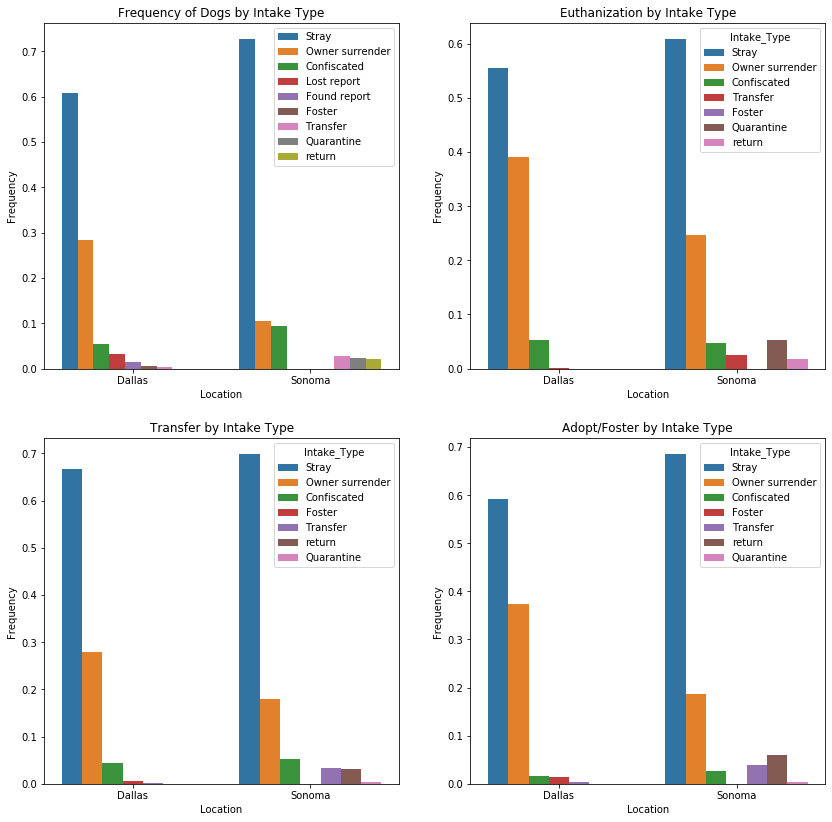

In [121]:
intaketype = (merge_data[merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Intake_Type']
              .value_counts(normalize = True)
              .rename('Frequency').reset_index()
              .sort_values(['Location']).reset_index())

intaketype_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
               [merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Intake_Type']
               .value_counts(normalize = True)
               .rename('Frequency').reset_index()
               .sort_values(['Location']).reset_index())  
               
intaketype_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
              [merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Intake_Type']
                .value_counts(normalize = True)
                .rename('Frequency').reset_index()
                .sort_values(['Location']).reset_index())

intaketype_tr = (merge_data[merge_data.Outcome_Type == 'Transfer']
              [merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Intake_Type']
                .value_counts(normalize = True)
                .rename('Frequency').reset_index()
                .sort_values(['Location']).reset_index())



#plot the percentage as bar graphs
plt.figure(figsize = (14,14))
plt.subplot(2,2,1)
sns.barplot(data = intaketype, x = 'Location', y = 'Frequency', hue = 'Intake_Type')
plt.title('Frequency of Dogs by Intake Type')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)
sns.barplot(data = intaketype_euth, x = 'Location', y = 'Frequency', hue = 'Intake_Type')
plt.title('Euthanization by Intake Type')

plt.subplot(2,2,3)
sns.barplot(data = intaketype_tr, x = 'Location', y = 'Frequency', hue = 'Intake_Type')
plt.title('Transfer by Intake Type')

plt.subplot(2,2,4)
sns.barplot(data = intaketype_adopt, x = 'Location', y = 'Frequency', hue = 'Intake_Type')
plt.title('Adopt/Foster by Intake Type')

Over 60% of shelter dogs are stray dogs and previously owned dogs take the next highest proportion of dogs at the shelter. Dallas shelter has almost 30% of their dogs coming from owners who gave their dogs to shelter where only 10% gave up their dogs from Sonoma. Confiscated dogs take 10% of the shelter dogs Sonoma. Compared this to euthanized dogs, euthanized dogs are disproportionately owner surrendered dog at 38% and 25% of total dogs euthanized in Dallas and Sonoma respectively. Proportion-wise owner surrendered dogs are 33% and more than two times more likely to be euthanized in Dallas and Sonoma shelters respectively. However, they do tend to be more likely to be adopted/fostered as well. Stray have equal proportion of adoption/foster rate as the intake rate by intake type, however, they are less likely to be euthanized. Quarantine dogs are disproportionately more likely to be euthanized at 5% compared to intake rate of about 2%. Returned dogs are also more likely to be adopted/fostered as well.

## 2g. Health

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sadmin\Anaconda3\lib\site-packages\ipy

Text(0.5, 1.0, 'Adopt/Foster by Health')

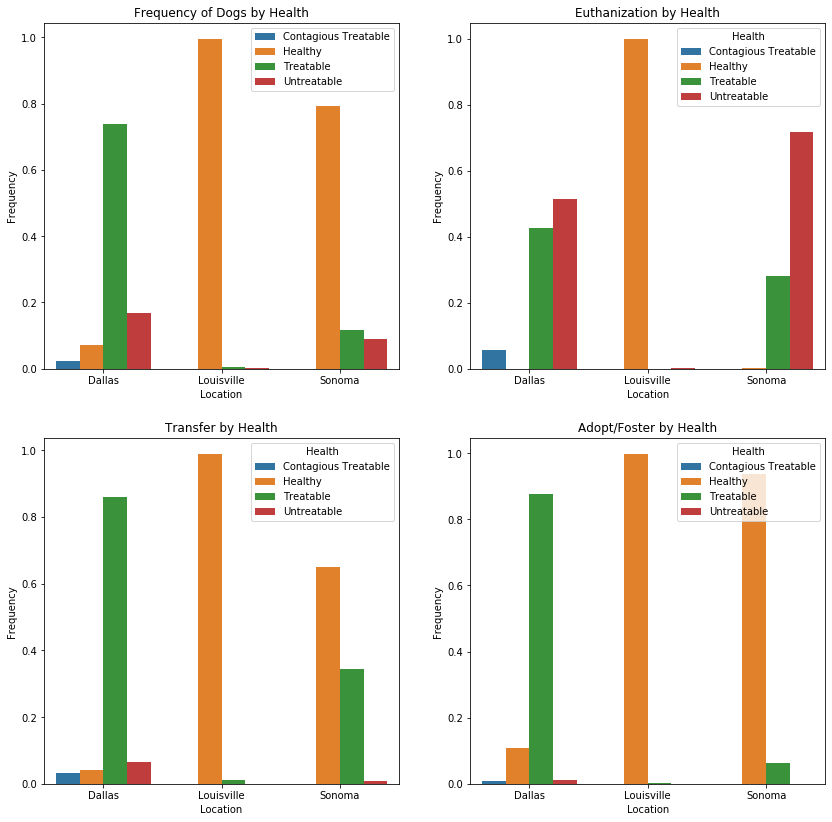

In [122]:
health = (merge_data[merge_data['Location'] != 'Austin']
          [merge_data['Health'] != 'Unknown']
          [merge_data['Health'] != 'Dead']
              .groupby(['Location'])['Health']
              .value_counts(normalize = True)
              .rename('Frequency').reset_index()).sort_values('Health')

health_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
                [merge_data['Health'] != 'Unknown']
                [merge_data['Health'] != 'Dead']
                [merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Health']
               .value_counts(normalize = True)
               .rename('Frequency').reset_index()).sort_values('Health')
               
health_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
               [merge_data['Health'] != 'Unknown']
               [merge_data['Health'] != 'Dead']
              [merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Health']
                .value_counts(normalize = True)
                .rename('Frequency').reset_index()).sort_values('Health')

health_tr = (merge_data[merge_data.Outcome_Type == 'Transfer']
             [merge_data['Health'] != 'Unknown']
              [merge_data['Health'] != 'Dead']
              [merge_data['Location'] != 'Austin']
              .groupby(['Location'])['Health']
                .value_counts(normalize = True)
                .rename('Frequency').reset_index()).sort_values('Health')



#plot the percentage as bar graphs
plt.figure(figsize = (14,14))
plt.subplot(2,2,1)
sns.barplot(data = health, x = 'Location', y = 'Frequency', hue = 'Health')
plt.title('Frequency of Dogs by Health')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)
sns.barplot(data = health_euth, x = 'Location', y = 'Frequency', hue = 'Health')
plt.title('Euthanization by Health')

plt.subplot(2,2,3)
sns.barplot(data = health_tr, x = 'Location', y = 'Frequency', hue = 'Health')
plt.title('Transfer by Health')

plt.subplot(2,2,4)
sns.barplot(data = health_adopt, x = 'Location', y = 'Frequency', hue = 'Health')
plt.title('Adopt/Foster by Health')

Over 95% of all dogs taken in by Louisville is healthy whereas in Sonoma shelter, it drops down to 80% and even less in Dallas at 10%. In Dallas, 75% of the dogs taken in is sick/injured but is treatable. In Sonoma only about 10% is sick or injured. Even though most shelters take in mostly stray dogs and their health is presumed to be similar, there seems to be a real bias in how health is determined. Unsurprisingly adoption/foster and euthanization in Louisville are primarily healthy dogs. 
On the other hand, untreatable dogs are disproportionately euthanized in all locations. In Dallas, a higher relative percentage of dogs adopted/fostered is healthy at 10% compared to about 7% for general profile. Healthy dogs are not euthanized in Dallas or Sonoma. Contagious but treatable disease dogs are disproportionately euthanized. Treatable but not contagious dogs are less likely to be euthanized in Dallas but more likely in Sonoma. This may be due to the number of healthy dogs taken in at the shelter and do not speak to the actual euthanization tendency at the shelters.
This area should be targeted to improve outcomes for dogs since sonoma has the lowest percentage of transfer rates among all location with 10% of all intake dogs

## 2h. Time Dependency

Text(0.5, 1.0, 'Outcome by Year')

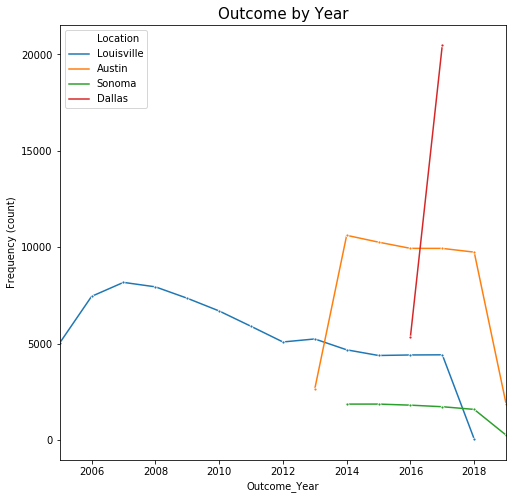

In [123]:
#line graph trends of outcome rate by yearly basis
Year_count = (merge_data.groupby(['Location'])['Outcome_Year']
                .value_counts()
                .rename('Frequency')
                .reset_index()).sort_values('Outcome_Year')

g = sns.lineplot(data = Year_count, x = 'Outcome_Year', y = 'Frequency', hue='Location', marker = ".")
plt.xlim((2005,2019))
plt.ylabel('Frequency (count)')
plt.title('Outcome by Year', fontsize = 15)

A steep decline towards the end of the last year of data across all location likely indicates the data was terminated in the middle of the year or data was incomplete. Also only 2 years of Dallas' data are present. When analyzing time data, these two points should be kept in mind. between 2006 and 2010, Louisvilles has abnormally high outcome and has been experiencing a decline in outcome rate since 2007.

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0, 0.5, 'Frequency (count)')

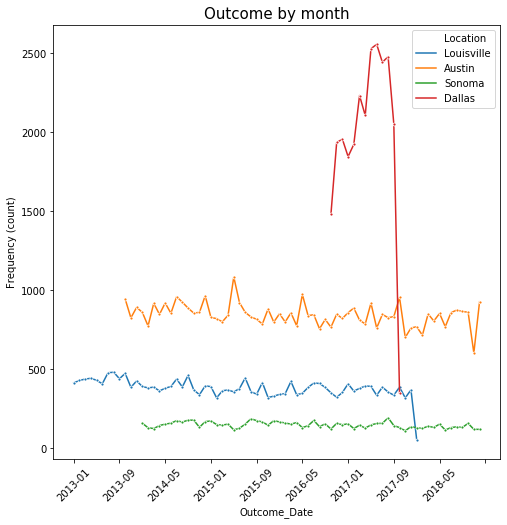

In [124]:
#examining seasonal change grouping the outcome by month and location
month_year = (merge_data.groupby(['Location'])['Outcome_Date']
                .value_counts()
                .rename('Frequency')
                .reset_index()).sort_values(['Outcome_Date'])
lim_month_year = month_year[month_year.Outcome_Date > '2013'][month_year.Outcome_Date <'2019']
g = sns.lineplot(data = lim_month_year, x = 'Outcome_Date', y = 'Frequency', hue='Location', marker = ".")
plt.setp(g.get_xticklabels(), rotation=45)
g.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.title('Outcome by month', fontsize = 15)
plt.ylabel('Frequency (count)')

Outcome rates at the various shelters are stable hovering around 800, 400 and 200 per month at Austin, Sonoma, and Dallas respectively. Only one year of data was collected for Dallas and as a result stability cannot be immediately determined. Again steep declines are seen in Dallas and Sonoma at the very last months. These steep deviations suggest that the data was not collected entirely at the end and this section should be excluding from frequency analysis to aviod bias. Also there is noticable periodicity in the time series suggesting possible seasonal effect on outcome. It’s most noticable in the Austin data where sharp peaks follow immediately by a deep tough in an approximately equal distance. Austin has high outcome rates around May every year and Louisville experiences similar pattern around August with double peak. <br><br>
All the frequency-time graphs generated henceforth were constructed with equal number of years for each months to aviod biasing the data. The last and first month of the each dataset were left out to avoid incomplete data. 

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launc

Text(0.5, 0.98, 'Outcome Frequency by Month')

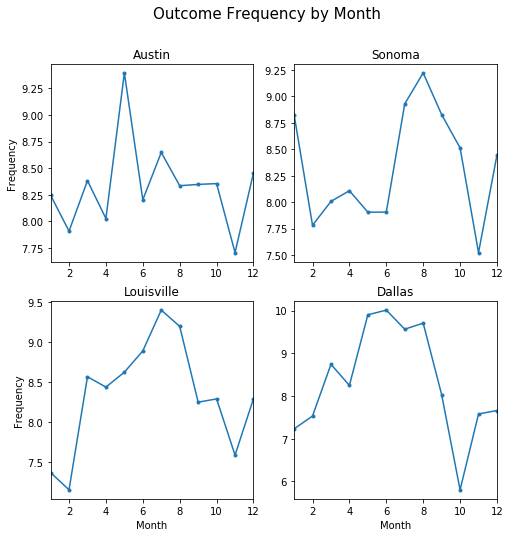

In [125]:
#restricting outcome date to year to year to reduce overcompensation of extra months in the dataset
#also remove the steep rise and decline in the dataset
austin_outcome = (merge_data[merge_data['Location'] == 'Austin']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

sonoma_outcome = (merge_data[merge_data['Location'] == 'Sonoma']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

louis_outcome = (merge_data[merge_data['Location'] == 'Louisville']
                  [merge_data['Outcome_Date'] < '2018']
                 [merge_data['Outcome_Date'] > '2005']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

dallas_outcome = (merge_data[merge_data['Location'] == 'Dallas']
                  [merge_data['Outcome_Date'] < '2017-10']
                  [merge_data['Outcome_Date'] > '2016-09']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

#plot the frequencies as a function of months to abserve seasonal change in outcome rates
plt.subplot(2,2,1)
plt.plot(austin_outcome['index'],austin_outcome['Frequency'], marker = '.')
plt.title('Austin')
plt.ylabel('Frequency')
plt.xlim((1,12))
plt.subplot(2,2,2)
plt.plot(sonoma_outcome['index'],sonoma_outcome['Frequency'], marker = '.')
plt.title('Sonoma')
plt.xlim((1,12))
plt.subplot(2,2,3)
plt.plot(louis_outcome['index'],louis_outcome['Frequency'], marker = '.')
plt.title('Louisville')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xlim((1,12))
plt.subplot(2,2,4)
plt.plot(dallas_outcome['index'],dallas_outcome['Frequency'], marker = '.')
plt.title('Dallas')
plt.xlabel('Month')
plt.xlim((1,12))
plt.suptitle('Outcome Frequency by Month', fontsize = 15)

All the frequency-time graphs generated henceforth were constructed with equal number of years for each months to aviod biasing the data. The last and first month of the each dataset were left out to avoid incomplete data. Fig 17 shows a clear pattern for seasonal outcome rates. For Austin, peak outcome rates occurs in May at 9.25% whereas for the remainder of the year, outcome frequency is consistent until November trough of 7.7%, differing by 1.55% or percent change of 17% from the peak. In Sonoma, outcome peaks during the summer reaching to maximum outcome rate of 9.2% in August and slumping in November to about 7.6%, differing by 1.6% and percent change of 17% from the peak. Lousiville peaks in the summer as well to around 9.5% in July and falls in the winter to 7.2% in February, differing by 2.3% and a change of 24% from the peak. Dallas has the most extreme change from 10% in June to 6% in october, differing by 4% and a change of 40% from the peak. The observation from these graphs is consistent with the pattern observed from previous time series graph

In [126]:
#investigate the adoption and euthanization rate by season
#restricting outcome date to year to year to reduce overcompensation of extra months in the dataset
#also remove the steep rise and decline in the dataset
austin_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
                [merge_data['Location'] == 'Austin']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

sonoma_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
                [merge_data['Location'] == 'Sonoma']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

louis_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
                [merge_data['Location'] == 'Louisville']
                  [merge_data['Outcome_Date'] < '2018']
                 [merge_data['Outcome_Date'] > '2005']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

dallas_adopt = (merge_data[merge_data.Outcome_Type == 'Adoption/Foster']
                [merge_data['Location'] == 'Dallas']
                  [merge_data['Outcome_Date'] < '2017-10']
                  [merge_data['Outcome_Date'] > '2016-09']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

austin_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
                [merge_data['Location'] == 'Austin']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

sonoma_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
                [merge_data['Location'] == 'Sonoma']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

louis_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
                [merge_data['Location'] == 'Louisville']
                  [merge_data['Outcome_Date'] < '2018']
                 [merge_data['Outcome_Date'] > '2005']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

dallas_euth = (merge_data[merge_data.Outcome_Type == 'Euth']
                [merge_data['Location'] == 'Dallas']
                  [merge_data['Outcome_Date'] < '2017-10']
                  [merge_data['Outcome_Date'] > '2016-09']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

austin_tr = (merge_data[merge_data.Outcome_Type == 'Transfer']
                [merge_data['Location'] == 'Austin']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

sonoma_tr = (merge_data[merge_data.Outcome_Type == 'Transfer']
                [merge_data['Location'] == 'Sonoma']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

louis_tr = (merge_data[merge_data.Outcome_Type == 'Transfer']
                [merge_data['Location'] == 'Louisville']
                  [merge_data['Outcome_Date'] < '2018']
                 [merge_data['Outcome_Date'] > '2005']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

dallas_tr = (merge_data[merge_data.Outcome_Type == 'Transfer']
                [merge_data['Location'] == 'Dallas']
                  [merge_data['Outcome_Date'] < '2017-10']
                  [merge_data['Outcome_Date'] > '2016-09']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-p

In [127]:
austin_no = (merge_data[merge_data.Outcome_Type != 'Euth']
                [merge_data['Location'] == 'Austin']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

sonoma_no = (merge_data[merge_data.Outcome_Type != 'Euth']
                [merge_data['Location'] == 'Sonoma']
                  [merge_data['Outcome_Date'] < '2019']
                  [merge_data['Outcome_Date'] > '2014']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

louis_no = (merge_data[merge_data.Outcome_Type != 'Euth']
                [merge_data['Location'] == 'Louisville']
                  [merge_data['Outcome_Date'] < '2018']
                 [merge_data['Outcome_Date'] > '2005']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

dallas_no = (merge_data[merge_data.Outcome_Type != 'Euth']
                [merge_data['Location'] == 'Dallas']
                  [merge_data['Outcome_Date'] < '2017-10']
                  [merge_data['Outcome_Date'] > '2016-09']['Outcome_Month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will

Text(0.5, 0.98, 'Outcome-Euthanization Frequency by Month')

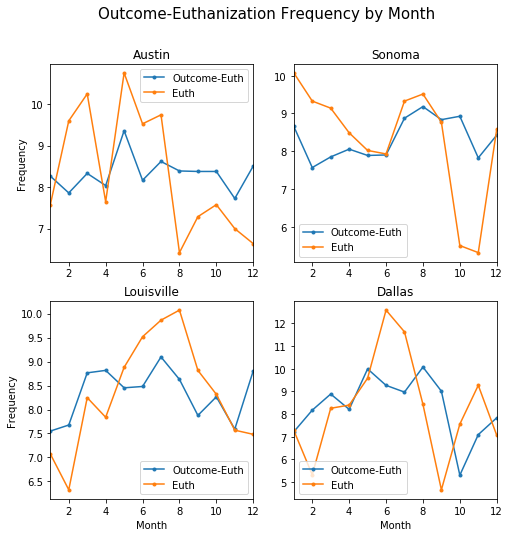

In [128]:
plt.subplot(2,2,1)
plt.plot(austin_no['index'],austin_no['Frequency'], marker = '.', label = 'Outcome-Euth')
plt.plot(austin_euth['index'],austin_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Austin')
plt.ylabel('Frequency')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,2)
plt.plot(sonoma_no['index'],sonoma_no['Frequency'], marker = '.', label = 'Outcome-Euth')
plt.plot(sonoma_euth['index'],sonoma_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Sonoma')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,3)
plt.plot(louis_no['index'],louis_no['Frequency'], marker = '.', label = 'Outcome-Euth')
plt.plot(louis_euth['index'],louis_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Louisville')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,4)
plt.plot(dallas_no['index'],dallas_no['Frequency'], marker = '.', label = 'Outcome-Euth')
plt.plot(dallas_euth['index'],dallas_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Dallas')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()
plt.suptitle('Outcome-Euthanization Frequency by Month', fontsize = 15)

Outcome-Euth chart is quite consistent without major peak and tough. It doesn't appear to match up with Euthanization frequency.

Text(0.5, 0.98, 'Outcome Frequency by Month')

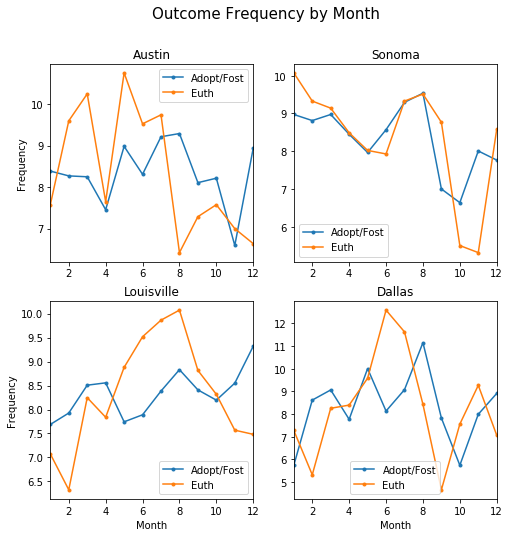

In [129]:
#display the seasonal change of euthanization and adoption
plt.subplot(2,2,1)
plt.plot(austin_adopt['index'],austin_adopt['Frequency'], marker = '.', label = 'Adopt/Fost')
plt.plot(austin_euth['index'],austin_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Austin')
plt.ylabel('Frequency')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,2)
plt.plot(sonoma_adopt['index'],sonoma_adopt['Frequency'], marker = '.', label = 'Adopt/Fost')
plt.plot(sonoma_euth['index'],sonoma_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Sonoma')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,3)
plt.plot(louis_adopt['index'],louis_adopt['Frequency'], marker = '.', label = 'Adopt/Fost')
plt.plot(louis_euth['index'],louis_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Louisville')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,4)
plt.plot(dallas_adopt['index'],dallas_adopt['Frequency'], marker = '.', label = 'Adopt/Fost')
plt.plot(dallas_euth['index'],dallas_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Dallas')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()
plt.suptitle('Outcome Frequency by Month', fontsize = 15)

The line graphs show seasonal effect on adoption/foster and euthanization. In Austin euthanzation mostly occurs in the first half of the year peaking in May at about 11% and dropping to almost 6% in August. In Sonoma euthanization peaks in January and in August and in Louisville euthanization peaks generally in the summer and mellows in the winter. Dallas also peaks in the summer and bottoms out in November on euthanizations. For adoption/foster, it doesn’t appear to have a clear peak and trough, instead adoption/foster seems to come in waves and is especially apparent for Louisville and Dallas. This is whether surprising because there isn’t a true match up between euthanization and adoption/foster rate. One would postulate that as adoption/foster improves, euthanization rates would decrease. However, the graphs show an almost independence from one another, suggesting other factors may contribute more to euthanization rate aside from adoption rates. Sonoma is the only outlier in that euthanization frequency almost match up entirely with adoption/foster frequency. To test this, a regression is constructed.

y = 0.493x + 4.227
r-value: 0.088


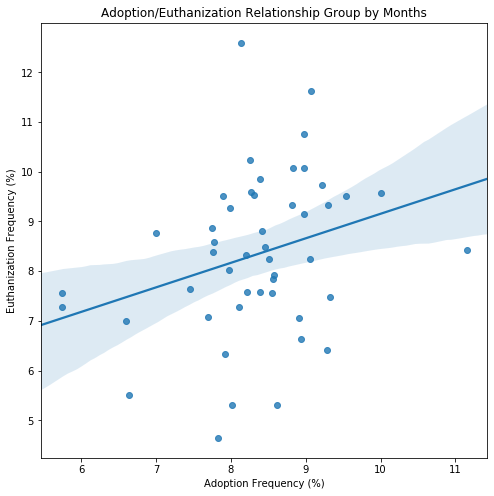

In [130]:
#mapping euthanization frequency with adoption frequency by location and month
adopt_month = austin_adopt.Frequency
adopt_month = adopt_month.append(sonoma_adopt.Frequency)
adopt_month = adopt_month.append(louis_adopt.Frequency)
adopt_month = adopt_month.append(dallas_adopt.Frequency)

euth_month = austin_euth.Frequency
euth_month = euth_month.append(sonoma_euth.Frequency)
euth_month = euth_month.append(louis_euth.Frequency)
euth_month = euth_month.append(dallas_euth.Frequency)

tr_month = austin_tr.Frequency
tr_month = tr_month.append(sonoma_tr.Frequency)
tr_month = tr_month.append(louis_tr.Frequency)
tr_month = tr_month.append(dallas_tr.Frequency)


#plot regression plot of the relationship between euthanization and adoption by month
sns.regplot(x = adopt_month, y = euth_month)
plt.xlabel('Adoption Frequency (%)')
plt.ylabel('Euthanization Frequency (%)')
plt.title('Adoption/Euthanization Relationship Group by Months')

slope, intercept, r_value, p_value, std_err = stats.linregress(x = adopt_month, y = euth_month)
print('y = ' + str(round(slope, 3)) + 'x + ' + str(round(intercept, 3)))
print('r-value:', round(r_value**2, 3))

By both linear regression and line plot, weak correlation between euthanization and adoption frequency with a r square value of 0.088. Even if r square in this case is low, it's surprising to see that euthanization is positively correlated to adoption frequency. Logically, it should be that if adoption rate increase, euthanization decrease. It's possible that the two does not correlate and other factors are involved in the decision to euthanize or euthanization is dependent dependent on a range of factors. I attempt to investgate this time dependent euthanization/adoption relationship discriminated by location.

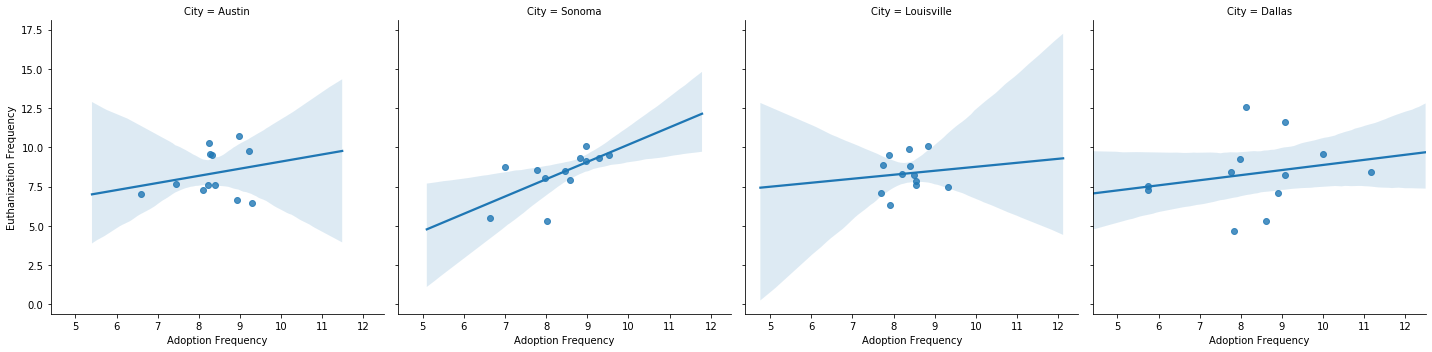

In [131]:
#ploting the regression discriminated by location
cities = pd.Series(12*['Austin'] + 12*['Sonoma'] + 12*['Louisville'] + 12*['Dallas']).rename('City')
outcome_month = pd.concat([adopt_month.rename('Adoption Frequency').reset_index(), 
                           euth_month.rename('Euthanization Frequency').reset_index(),
                           tr_month.rename('Transfer Frequency').reset_index(), 
                           cities], axis = 1)

sns.lmplot(col = 'City', x = 'Adoption Frequency', y = 'Euthanization Frequency', data = outcome_month)

In [132]:
#create a dataframe of the statistical information of the aboved linear regression
stat_table(outcome_month, 12, ['Austin','Sonoma', 'Louisville', 'Dallas'], 'Adoption Frequency', 'Euthanization Frequency')

,regression,r square,p_value
Location,,,
Austin,y = 0.455x + 4.545,0.051,0.478
Sonoma,y = 1.101x + -0.844,0.427,0.021
Louisville,y = 0.254x + 6.215,0.011,0.744
Dallas,y = 0.325x + 5.628,0.049,0.491


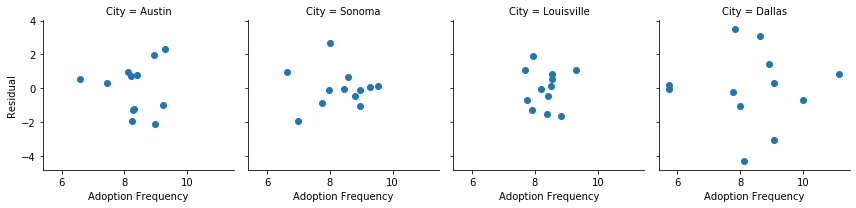

In [133]:
# residual plot of the regression lines
residual = []
for i in range(12):
    y = 0.455*outcome_month['Adoption Frequency'][i] + 4.545
    residual.append(y-outcome_month['Euthanization Frequency'][i])

for i in range(12,24):
    y = 1.101*outcome_month['Adoption Frequency'][i] - 0.844
    residual.append(y-outcome_month['Euthanization Frequency'][i])
    
for i in range(24,36):
    y = 0.254*outcome_month['Adoption Frequency'][i] + 6.215
    residual.append(y-outcome_month['Euthanization Frequency'][i])
    
for i in range(36,48):
    y = 0.325*outcome_month['Adoption Frequency'][i] + 5.628
    residual.append(y-outcome_month['Euthanization Frequency'][i])

residual = pd.Series(residual).rename('Residual')
outcome_month = pd.concat([outcome_month, residual], axis = 1)

g = sns.FacetGrid(outcome_month, col="City")
g = g.map(plt.scatter, 'Adoption Frequency', 'Residual')

The residual plot shows random points without any pattern. <br><br>

The regressions show the relationship between adoption and euthanization by monthly frequency. Almost all locations show weak correlation value and high p-value, depicting weak or no correlation between euthanization and adoption in seasonal perspective. However, Sonoma exposes direct postive relationship with r square of 0.427 where as adoption/foster rate increases, euthanization rate increases. This is counter intuitive even if the p-value suggest statistical significance. I postulate that there could be time delay between adoption/foster and euthaniztion. <br><br>

The time delay effect will have two restrictions: <br>
1.	The delay time does not exceed 4 months <br>
2.	The euthanization and adoption/foster frequency have an inverse relationship (negative slope)

In [134]:
#function to find the best delay time of euthanization rate by adoption rate using r_value as a indicator
#also assume as adoption rate goes up euthanization rate decreases
month_delay = []
def delay(dataframe, ind, Location, x_name, y_name, delay_time):
    global month_delay
    for n in range(len(Location)):
        low_r = 0
        temp = list(dataframe[y_name][ind*n: ind*n+ind])
        #set month to 0 if conditions do not meet
        month = 0
        for i in range(delay_time):
            temp.append(temp.pop(0))
            slope, intercept, r_value, p_value, std_err = (stats.linregress(
            dataframe[x_name][ind*n: ind*n+ind], temp))
            if low_r > r_value:
                low_r = r_value
                month = i+1
        temp = list(dataframe[y_name][ind*n: ind*n+ind])
        for j in range(month):
            temp.append(temp.pop(0))
        month_delay += temp        
        print(Location[n] + ' euthanization delay time:', month, ' months')
delay(outcome_month, 12, ['Austin','Sonoma', 'Louisville', 'Dallas'], 'Adoption Frequency', 'Euthanization Frequency', 4)

Austin euthanization delay time: 4  months
Sonoma euthanization delay time: 3  months
Louisville euthanization delay time: 2  months
Dallas euthanization delay time: 4  months


In [135]:
#add month delay column to the dataframe
month_delay = pd.Series(month_delay).rename('Month_Delay')
outcome_month = pd.concat([outcome_month, month_delay], axis = 1)

Text(0.5, 0.98, 'Euth and Adoption/Foster Frequency (Month Delay)')

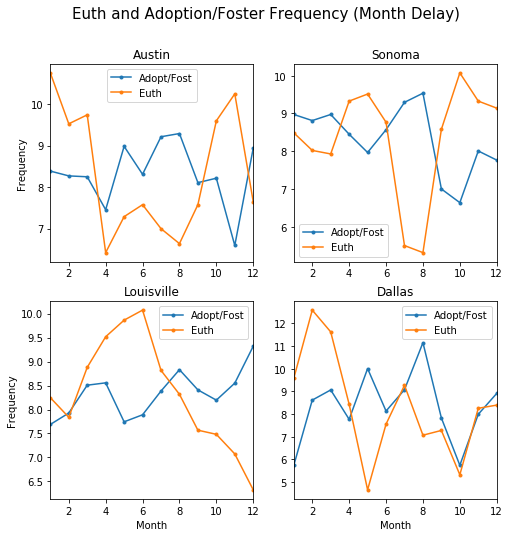

In [136]:
#visually inspect the delay euthanization rate overlapping adoption rate by month
plt.subplot(2,2,1)
plt.plot(range(1,13),outcome_month['Adoption Frequency'][:12], marker = '.', label = 'Adopt/Fost')
plt.plot(range(1,13),outcome_month['Month_Delay'][:12], marker = '.', label = 'Euth')
plt.title('Austin')
plt.ylabel('Frequency')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,2)
plt.plot(range(1,13),outcome_month['Adoption Frequency'][12:24], marker = '.', label = 'Adopt/Fost')
plt.plot(range(1,13),outcome_month['Month_Delay'][12:24], marker = '.', label = 'Euth')
plt.title('Sonoma')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,3)
plt.plot(range(1,13),outcome_month['Adoption Frequency'][24:36], marker = '.', label = 'Adopt/Fost')
plt.plot(range(1,13),outcome_month['Month_Delay'][24:36], marker = '.', label = 'Euth')
plt.title('Louisville')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,4)
plt.plot(range(1,13),outcome_month['Adoption Frequency'][36:], marker = '.', label = 'Adopt/Fost')
plt.plot(range(1,13),outcome_month['Month_Delay'][36:], marker = '.', label = 'Euth')
plt.title('Dallas')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()
plt.suptitle('Euth and Adoption/Foster Frequency (Month Delay)', fontsize = 15)

The resultant euthanization/adoption line plot with appropriate time delay. For the most part, high adoption correlates to low euthanization generally. Dalla's data seems inconsistent and it could be due to limited data. Sonoma and Louisville improved signifantly visually where peak to trough nearly always line up. 

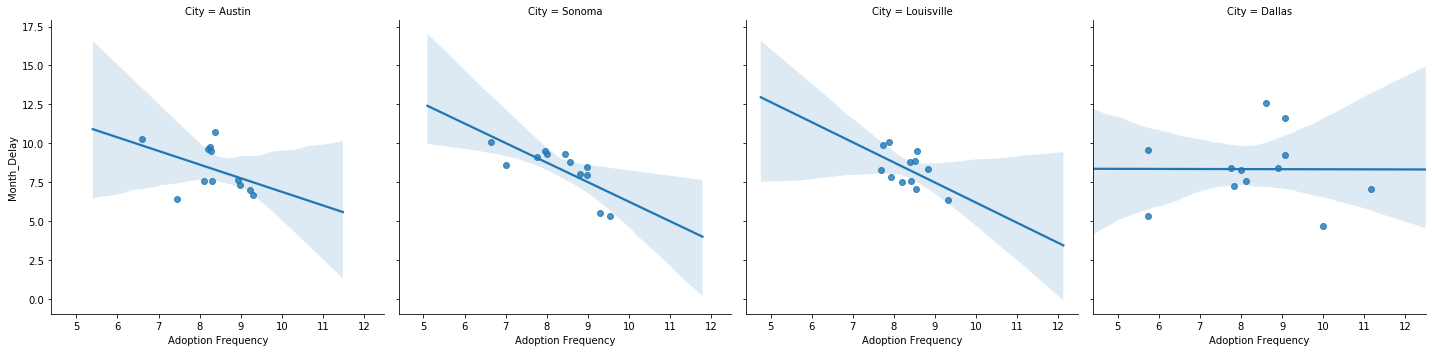

In [137]:
#regression plot of the resulting adoption rate by the delayed euthanization rate 
sns.lmplot(col = 'City', x = 'Adoption Frequency', y = 'Month_Delay', data = outcome_month)

In [138]:
#formulate a table with statistical information of the above regression plot
stat_table(outcome_month, 12, ['Austin','Sonoma', 'Louisville', 'Dallas'], 'Adoption Frequency', 'Month_Delay')

,regression,r square,p_value
Location,,,
Austin,y = -0.876x + 15.634,0.191,0.155
Sonoma,y = -1.257x + 18.812,0.557,0.005
Louisville,y = -1.294x + 19.116,0.289,0.071
Dallas,y = -0.005x + 8.379,0.000,0.991


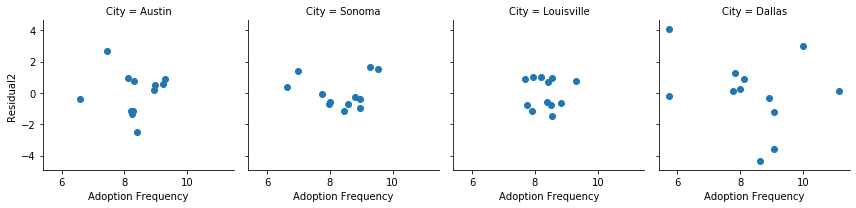

In [139]:
#residual plot of the above regression
residual = []
for i in range(12):
    y = -0.876*outcome_month['Adoption Frequency'][i] + 15.634
    residual.append(y-outcome_month['Month_Delay'][i])

for i in range(12,24):
    y = -1.257*outcome_month['Adoption Frequency'][i] + 18.812
    residual.append(y-outcome_month['Month_Delay'][i])
    
for i in range(24,36):
    y = -1.294*outcome_month['Adoption Frequency'][i] + 19.116
    residual.append(y-outcome_month['Month_Delay'][i])
    
for i in range(36,48):
    y = -0.413*outcome_month['Adoption Frequency'][i] + 11.778
    residual.append(y-outcome_month['Month_Delay'][i])

residual = pd.Series(residual).rename('Residual2')
outcome_month = pd.concat([outcome_month, residual], axis = 1)

g = sns.FacetGrid(outcome_month, col="City")
g = g.map(plt.scatter, 'Adoption Frequency', 'Residual2')

The residual plot is random. r_square improve dramatically for all the plots. Sonoma have a reasonble improvement in r_square and now up to 0.55 from 0.427 whereas Louisville also improve dramatically to 0.289 from 0.11 prior. However, the p-value of  still does not indicate significance in the model, suggesting changes in adoption does not change the response of euthanization. This applies to all locations besides Sonoma and indicates there are other more significant factors or combination factors that attributes to euthanization rates for Austin, Dallas and Louisville. In other words, adoption and euthanization are dependent in Sonoma, where in the other locations, adoption rates do not necessary induce a response from euthanization with the possibly of transfer rates and RTO contributing more to euthanization rates.

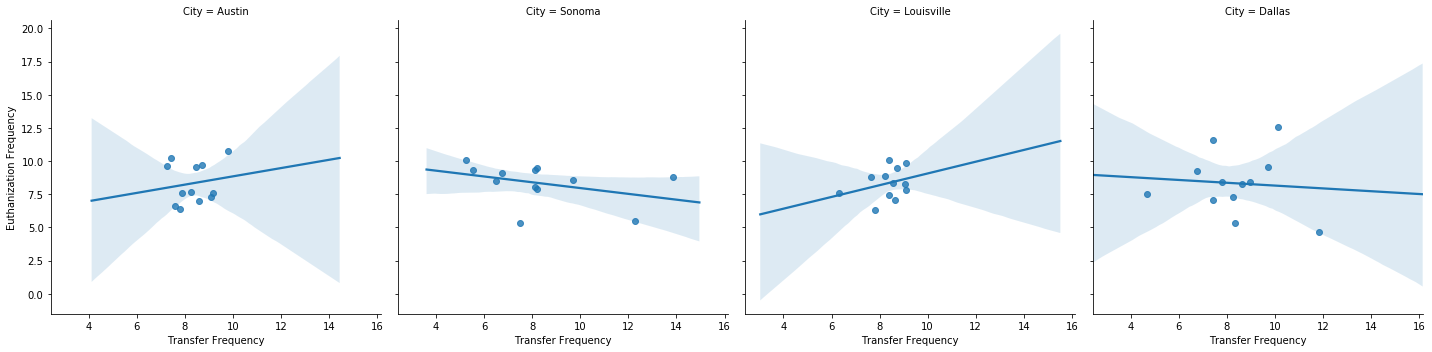

In [140]:
#ploting the regression discriminated by location
sns.lmplot(col = 'City', x = 'Transfer Frequency', y = 'Euthanization Frequency', data = outcome_month)

In [141]:
stat_table(outcome_month, 12, ['Austin','Sonoma', 'Louisville', 'Dallas'], 'Transfer Frequency', 'Euthanization Frequency')

,regression,r square,p_value
Location,,,
Austin,y = 0.312x + 5.735,0.025,0.621
Sonoma,y = -0.218x + 10.154,0.140,0.231
Louisville,y = 0.443x + 4.646,0.091,0.341
Dallas,y = -0.106x + 9.216,0.007,0.797


No significance can be drawn between transfer Frequency and Euthanization frequency

In [142]:
month_delay = []
delay(outcome_month, 12, ['Austin','Sonoma', 'Louisville', 'Dallas'], 'Transfer Frequency', 'Euthanization Frequency', 4)

Austin euthanization delay time: 3  months
Sonoma euthanization delay time: 1  months
Louisville euthanization delay time: 0  months
Dallas euthanization delay time: 3  months


In [143]:
month_delay = pd.Series(month_delay).rename('Month_Delay2')
outcome_month = pd.concat([outcome_month, month_delay], axis = 1)

Text(0.5, 0.98, 'Euth and Transfer Frequency (Month Delay)')

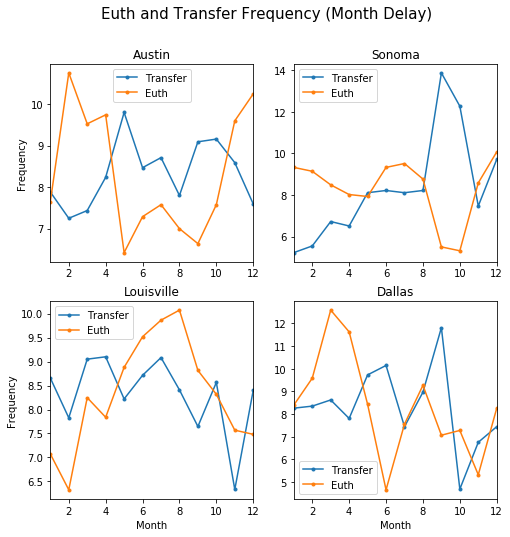

In [144]:
plt.subplot(2,2,1)
plt.plot(range(1,13),outcome_month['Transfer Frequency'][:12], marker = '.', label = 'Transfer')
plt.plot(range(1,13),outcome_month['Month_Delay2'][:12], marker = '.', label = 'Euth')
plt.title('Austin')
plt.ylabel('Frequency')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,2)
plt.plot(range(1,13),outcome_month['Transfer Frequency'][12:24], marker = '.', label = 'Transfer')
plt.plot(range(1,13),outcome_month['Month_Delay2'][12:24], marker = '.', label = 'Euth')
plt.title('Sonoma')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,3)
plt.plot(range(1,13),outcome_month['Transfer Frequency'][24:36], marker = '.', label = 'Transfer')
plt.plot(range(1,13),outcome_month['Month_Delay2'][24:36], marker = '.', label = 'Euth')
plt.title('Louisville')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,4)
plt.plot(range(1,13),outcome_month['Transfer Frequency'][36:], marker = '.', label = 'Transfer')
plt.plot(range(1,13),outcome_month['Month_Delay2'][36:], marker = '.', label = 'Euth')
plt.title('Dallas')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()
plt.suptitle('Euth and Transfer Frequency (Month Delay)', fontsize = 15)

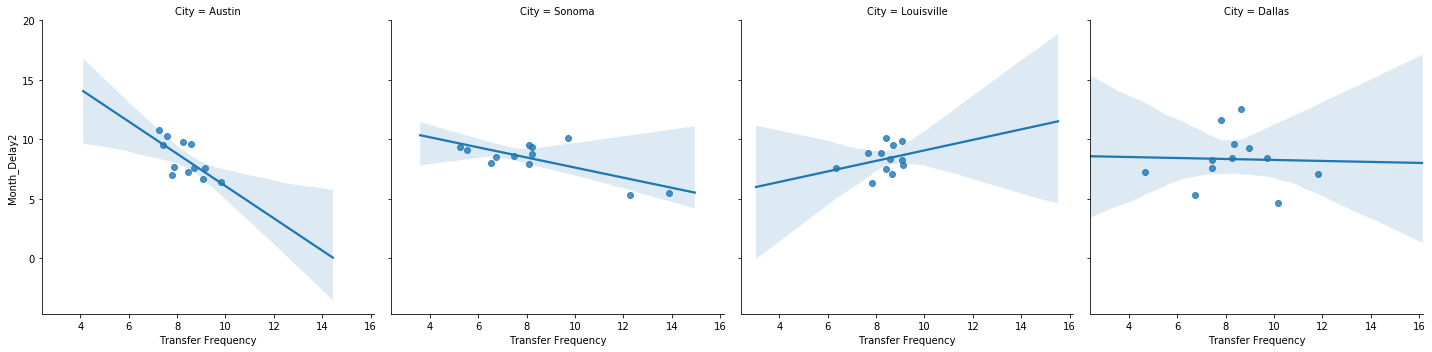

In [145]:
sns.lmplot(col = 'City', x = 'Transfer Frequency', y = 'Month_Delay2', data = outcome_month)

In [146]:
stat_table(outcome_month, 12, ['Austin','Sonoma', 'Louisville', 'Dallas'], 'Transfer Frequency', 'Month_Delay2')

,regression,r square,p_value
Location,,,
Austin,y = -1.357x + 19.644,0.481,0.012
Sonoma,y = -0.425x + 11.876,0.529,0.007
Louisville,y = 0.443x + 4.646,0.091,0.341
Dallas,y = -0.041x + 8.677,0.001,0.920


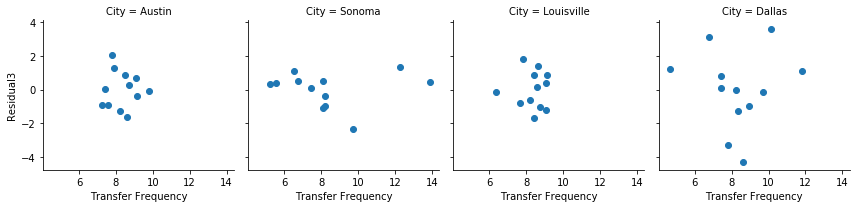

In [147]:
residual = []
for i in range(12):
    y = -1.357*outcome_month['Transfer Frequency'][i] + 19.644
    residual.append(y-outcome_month['Month_Delay2'][i])

for i in range(12,24):
    y =  -0.425*outcome_month['Transfer Frequency'][i] + 11.876
    residual.append(y-outcome_month['Month_Delay2'][i])
    
for i in range(24,36):
    y = 0.443*outcome_month['Transfer Frequency'][i] + 4.646
    residual.append(y-outcome_month['Month_Delay2'][i])
    
for i in range(36,48):
    y = -0.041*outcome_month['Transfer Frequency'][i] + 8.677
    residual.append(y-outcome_month['Month_Delay2'][i])

residual = pd.Series(residual).rename('Residual3')
outcome_month = pd.concat([outcome_month, residual], axis = 1)

g = sns.FacetGrid(outcome_month, col="City")
g = g.map(plt.scatter, 'Transfer Frequency', 'Residual3')

Austin's euthanization rate depends on transfer rate with a delay time of 3 months. Sonoma also suggests the significance of transfer rate. The other locations do not depend on transfer rate or at least is not strongly dependent on transfer rate. This time series exercise shows the time dependency of euthanization rates, transfer rates and adoption rates. However, only Austin and Sonoma show that euthanization depends on adoption and transfer rates with some sort of delay factor.

In [148]:
sonoma_in = (merge_data[merge_data['Location'] == 'Sonoma']
                  [merge_data['Intake_Date'] < '2019']
                  [merge_data['Intake_Date'] > '2014']['Intake_month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

louis_in = (merge_data[merge_data['Location'] == 'Louisville']
                  [merge_data['Intake_Date'] < '2018']
                 [merge_data['Intake_Date'] > '2005']['Intake_month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

dallas_in = (merge_data[merge_data['Location'] == 'Dallas']
                  [merge_data['Intake_Date'] < '2017-10']
                  [merge_data['Intake_Date'] > '2016-09']['Intake_month']
                  .value_counts(normalize = True)
                  .mul(100)
                  .rename('Frequency')
                 .reset_index()
                 .sort_values('index'))

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key wil

Text(0.5, 0.98, 'Intake Frequency and Euthanization Frequency Relationship')

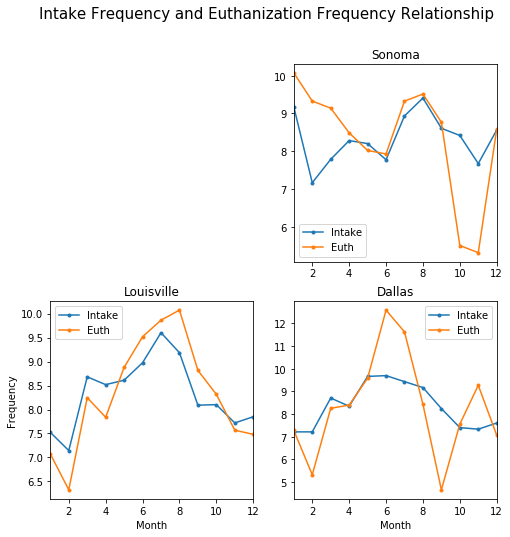

In [149]:
plt.subplot(2,2,2)
plt.plot(sonoma_in['index'],sonoma_in['Frequency'], marker = '.', label = 'Intake')
plt.plot(sonoma_euth['index'],sonoma_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Sonoma')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,3)
plt.plot(louis_in['index'],louis_in['Frequency'], marker = '.', label = 'Intake')
plt.plot(louis_euth['index'],louis_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Louisville')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()

plt.subplot(2,2,4)
plt.plot(dallas_in['index'],dallas_in['Frequency'], marker = '.', label = 'Intake')
plt.plot(dallas_euth['index'],dallas_euth['Frequency'], marker = '.', label = 'Euth')
plt.title('Dallas')
plt.xlabel('Month')
plt.xlim((1,12))
plt.legend()
plt.suptitle('Intake Frequency and Euthanization Frequency Relationship', fontsize = 15)

Comparing intake frequency with euthanization frequency, strong direct correlation emerges. Both Louisville and Sonoma almost have exactly the same distribution. Louisville in particular have peaks at the same month and toughs at the same month. Even though visually intake frequency and euthanization frequency do no line up directly for Dallas shelter, it’s apparent that the peak for intake frequency matches up to the more rounded peak of intake frequency. This is true for the toughs as well. Since Intake frequency correlates with the space avaliable at shelters, this sheds light the effect of space capacity on euthanization.

In [150]:
intake = pd.Series(12*[0])
intake = intake.append(sonoma_in.Frequency)
intake = intake.append(louis_in.Frequency)
intake = intake.append(dallas_in.Frequency)
intake = intake.rename('Intake')
outcome_month = pd.concat([outcome_month, intake.reset_index()], axis = 1)

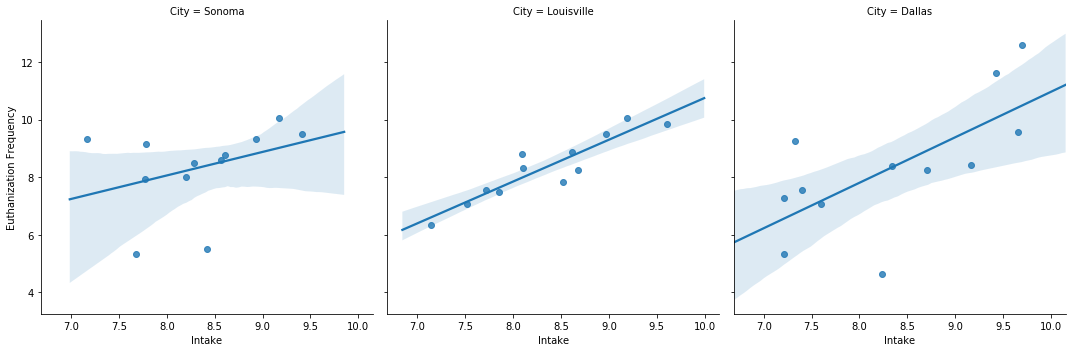

In [151]:
sns.lmplot(col = 'City', x = 'Intake', y = 'Euthanization Frequency', 
           data = outcome_month[outcome_month['City'] != 'Austin'])

In [152]:
stat_table(outcome_month.loc[12:], 12, ['Sonoma', 'Louisville', 'Dallas'], 'Intake', 'Euthanization Frequency')

,regression,r square,p_value
Location,,,
Sonoma,y = 0.818x + 1.517,0.130,0.250
Louisville,y = 1.453x + -3.775,0.842,0.000
Dallas,y = 1.581x + -4.842,0.461,0.015


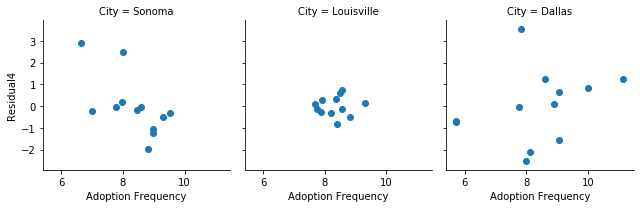

In [153]:
residual = 12*[0]

for i in range(12,24):
    y =   0.818*outcome_month['Intake'][i] + 1.517
    residual.append(y-outcome_month['Euthanization Frequency'][i])
    
for i in range(24,36):
    y = 1.453*outcome_month['Intake'][i]  - 3.775
    residual.append(y-outcome_month['Euthanization Frequency'][i])
    
for i in range(36,48):
    y =  1.581*outcome_month['Intake'][i] - 4.842
    residual.append(y-outcome_month['Euthanization Frequency'][i])

residual = pd.Series(residual).rename('Residual4')
outcome_month = pd.concat([outcome_month, residual], axis = 1)

g = sns.FacetGrid(outcome_month.loc[12:], col="City")
g = g.map(plt.scatter, 'Adoption Frequency', 'Residual4')

Louisville showed exceptional performance with r2 of 0.842 and a p-value of 0.0. Dallas also has remarkable r2 of 0.461 with p-value of 0.015. Both p-values suggest statistical significant in the model for predicting euthanization rates. However, regression did not fit Sonoma well and is not a good predictor for euthanization. But a closer inspection regression plot reveals two particular outliers that skewed the model. The remaining data points appears to have a strong linear relationship. 

## 2i. Summary of EDA/Statiscal Analysis

The breed of dogs plays some role in predicting adoption/foster and euthanization in particular miscellaneous breed has higher euthanization rate and lower adoption/foster rate compared to intake rate whereas toy breed has higher adoption/foster rate and lower euthanization rate compared to intake rates.

Male dogs are more commonly taken in by shelter and have a higher rate of adoption, however, female dogs have higher relative adoption rate. Unknown gender dogs are disproporationately euthanized where male and female dogs are roughly the same in terms of euthanization. All adopted/fosters dogs at all the locations are neutered/spay whereas it is not a predictor for euthanization.

Age of dogs plays a huge role in euthanization and adoption/foster rate. Sonoma tends to be less age discriminating for adoption with mean age of 2.4 years old whereas for other location the mean age is 2 years old. Also mean euthanization age is the same at Austin, Louisville and Sonoma shelters at 4.6 years old.

The color of the dogs plays no role in determining adoption/foster and euthanization of a dog.

Intake Type has some significance in evaluating for euthanization of a dog. Owner surrender and quarentine dogs tend to be euthanized. Intake type have moderate affect on adoption/foster rate.

All adopted/fostered dogs are disproportionally healthy but health is not a good indicator for Louisville since over 95% of shelter dogs are healthy. Dogs with untreatable or contagious disease are disproporationately euthanized at all locations.

Outcome Month may play a slight role in determining adoption/foster and euthanization of dogs but intake Month plays a significant role in euthanization of dogs. This is believed to be caused by limitation to capacity at the shelter.


# 3. Machine Learning
Machine learning algorithms were conducted on the four datasets separately. Features not native to the original dataset was removed and all null values were removed. Color and pattern features were drop because they fail to predict the adoption/foster and euthanization rates. Age column was scaled to speed up learning. All the categorical features were converted to binary representation for learning with OneHotEncoding. 

## 3a. Machine Learning Models

Naïve Bayes Bernoulli: From the Naïve Bayes algorithms Bernoulli was chosen because it natively deals with categorical dataset. Since almost all features in the dataset was categorical, therefore this was an obvious choice. Age was converted to young, old and middle aged to fit the categorical setting of Bernoulli. Randomized search 3-fold cross validation was used to reduce variance and alpha was hypertuned to improve accuracy. The scoring metric was set for accuracy.<br><br>
Logistic Regression: Logistic regression was performed with solver set to lbfgs and multi class set to one vs rest. Randomized search cross validation 3-fold was used to reduce variance and regularizer (C) was hypertuned to improve accuracy. The scoring metric was set for accuracy<br><br>
Support Vector Machine: kernel was set to Linear for faster learning and randomized search cross 3-fold validation was used to reduce variance. C was hypertuned to improve accuracy and the scoring metric was set for accuracy<br><br>
K Nearest Neighbors:  The weights were set to uniform for faster learning. Randomized search cross 3-fold validation was used to reduce overfitting and n neighbors was hypertuned to improve accuracy. The scoring metric was set for accuracy.<br><br>
Random Forest: Grid search 3-fold cross validation was used to improve overfitting and the number of trees was hypertuned. The scoring metrics was set to accuracy.<br><br>
Deep learning: 6 hidden layers with a final layer of softmax with 5 nodes for classification. Dropout was used every other layer to reduce variance and batch normalization was used on layers without Dropout to avoid conflict and speed up learning and remove the risk of vanishing gradient or exploding gradient. Relu was used for all the activation layers.<br><br>
All models presented weren’t hypertuned entirely with all available parameters and it could be done for future work and study.


In [154]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167154 entries, 4 to 298443
Data columns (total 20 columns):
Breed             167154 non-null object
Chip_Status       26043 non-null object
Color             167154 non-null object
Health            111129 non-null object
Intake_Date       167154 non-null object
Intake_Status     76905 non-null object
Intake_Subtype    107879 non-null object
Intake_Type       112088 non-null object
Location          167154 non-null object
Outcome_Date      167154 non-null object
Outcome_Type      167154 non-null object
Sex               141110 non-null object
Neutered/Spay     167154 non-null object
Pure/Mix          167154 non-null object
Pattern           167154 non-null object
Age               116307 non-null float64
Outcome_Month     166977 non-null float64
Outcome_Year      166977 non-null float64
Intake_month      112088 non-null float64
Count             167154 non-null int64
dtypes: float64(4), int64(1), object(15)
memory usage: 31.8+ MB


In [155]:
#remove other from outcome because those dogs at shelter indicates they went missing or ran away. 
#Since missing and running away are randomized factors, we like to eliminate it
merge_data = (merge_data[merge_data.Outcome_Type != 'Other']
              .drop(columns = ['Intake_Type','Count', 'Outcome_Year', 
                               'Intake_Date', 'Outcome_Date', 
                               'Outcome_Year', 'Color', 'Pattern']))

#convert outcome_month and intake_month as string
merge_data['Outcome_Month'] = merge_data['Outcome_Month'].astype(str)
merge_data['Intake_month'] = merge_data['Intake_month'].astype(str)

In [156]:
df_louis = merge_data[merge_data.Location == 'Louisville']
df_dalla = merge_data[merge_data.Location == 'Dallas']
df_aust = merge_data[merge_data.Location == 'Austin']
df_sonoma = merge_data[merge_data.Location == 'Sonoma']

## Machine Learning on Louisville

In [157]:
df_louis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73709 entries, 96446 to 247281
Data columns (total 13 columns):
Breed             73709 non-null object
Chip_Status       0 non-null object
Health            73703 non-null object
Intake_Status     73709 non-null object
Intake_Subtype    73157 non-null object
Location          73709 non-null object
Outcome_Type      73709 non-null object
Sex               73709 non-null object
Neutered/Spay     73709 non-null object
Pure/Mix          73709 non-null object
Age               50957 non-null float64
Outcome_Month     73709 non-null object
Intake_month      73709 non-null object
dtypes: float64(1), object(12)
memory usage: 7.9+ MB


In [158]:
#fill na with average for age and drop unused columns
mean = np.mean(merge_data['Age'])
df_louis = df_louis.fillna(value = {'Age': mean})
df_louis = df_louis.drop(columns = ['Chip_Status', 'Location'])
df_louis = df_louis.dropna()

In [159]:
df_louis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73151 entries, 96446 to 247281
Data columns (total 11 columns):
Breed             73151 non-null object
Health            73151 non-null object
Intake_Status     73151 non-null object
Intake_Subtype    73151 non-null object
Outcome_Type      73151 non-null object
Sex               73151 non-null object
Neutered/Spay     73151 non-null object
Pure/Mix          73151 non-null object
Age               73151 non-null float64
Outcome_Month     73151 non-null object
Intake_month      73151 non-null object
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [160]:
#categorize age for bernoulli naive bayes
def categorize(data):
    low = data.quantile(.25)
    high = data.quantile(.75)
    output = []
    for value in data:
        if value <= low:
            output.append('Low')
        elif value >= high:
            output.append('High')
        else:
            output.append('Medium')
    return output
# create temp dataframe to encode
temp1 = categorize(df_louis.Age)
cat_df_louis = df_louis.drop(columns = ['Age', 'Outcome_Type'])
cat_df_louis['Age'] = temp1

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)

#transform and concatenate data
cat_df_louis = ohe.fit_transform(cat_df_louis)

#assigning target and features
y = df_louis.Outcome_Type
X = cat_df_louis

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [161]:
#run bernullli naive bayes with random search cross validation with hyperparametering tuning
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3,0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, cv = 3, verbose = 15, n_iter = 10, 
                           scoring = 'accuracy', random_state = 12, n_jobs = 3)
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    6.7s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    6.7s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    7.4s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    7.4s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    7.5s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [162]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.15998587196060574}


In [163]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.6366956351918758


In [164]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.6341930192290167


In [165]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3802,    2,  144,  744,  150],
       [  17,  366,  121,    9,   25],
       [ 462,   82, 7612,  308,  591],
       [1102,    8, 1030, 1498,  199],
       [1330,   14, 1138,  552,  640]], dtype=int64)

In [166]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.57      0.79      0.66      4842
           Died       0.78      0.68      0.72       538
           Euth       0.76      0.84      0.80      9055
            Rto       0.48      0.39      0.43      3837
       Transfer       0.40      0.17      0.24      3674

       accuracy                           0.63     21946
      macro avg       0.60      0.57      0.57     21946
   weighted avg       0.61      0.63      0.61     21946



In [167]:
# create temp dataframe to encode and scale
temp1 = df_louis.Age.values.reshape(-1,1)
temp2 = df_louis.drop(columns=['Age', 'Outcome_Type'])

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()

#transform and concatenate data
temp1 = scaler.fit_transform(temp1)
temp2 = ohe.fit_transform(temp2)

#assigning target and features
y = df_louis.Outcome_Type
X = np.concatenate((temp1,temp2), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [168]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_iter = 10, 
                           scoring = 'accuracy', n_jobs = 3, random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   10.4s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:   22.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:   22.8s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:   22.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   25.1s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   25.9s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   26.0s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   36.7s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   37.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   38.0s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:   48.4s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:   48.8s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:   49.7s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [169]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.868511373751352}


In [170]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.6503075871496924


In [171]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.6546523284425407


In [172]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4086,    0,  186,  510,   60],
       [  22,  367,  126,    5,   18],
       [ 499,   44, 8122,  273,  117],
       [1152,    0, 1140, 1435,  110],
       [1409,    3, 1395,  510,  357]], dtype=int64)

In [173]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.57      0.84      0.68      4842
           Died       0.89      0.68      0.77       538
           Euth       0.74      0.90      0.81      9055
            Rto       0.53      0.37      0.44      3837
       Transfer       0.54      0.10      0.16      3674

       accuracy                           0.65     21946
      macro avg       0.65      0.58      0.57     21946
   weighted avg       0.64      0.65      0.61     21946



In [174]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, verbose = 15, n_jobs = 3,
                            random_state = 10, scoring = 'accuracy', n_iter = 8)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  7.4min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  7.4min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  7.4min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed: 15.1min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed: 15.1min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed: 15.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 22.2min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 22.4min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 22.4min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 29.3min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed: 29.5min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 29.5min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed: 37.4min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed: 37.7min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed: 37.7min
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=8, n_jobs=3,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [175]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.7543120063354615}


In [176]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.6444097256127331


In [177]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.6464959445912695


In [178]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4276,    0,  148,  366,   52],
       [  23,  362,  125,    5,   23],
       [ 584,   40, 7956,  286,  189],
       [1383,    0, 1126, 1241,   87],
       [1596,    1, 1366,  358,  353]], dtype=int64)

In [179]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.54      0.88      0.67      4842
           Died       0.90      0.67      0.77       538
           Euth       0.74      0.88      0.80      9055
            Rto       0.55      0.32      0.41      3837
       Transfer       0.50      0.10      0.16      3674

       accuracy                           0.65     21946
      macro avg       0.65      0.57      0.56     21946
   weighted avg       0.63      0.65      0.60     21946



In [180]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, verbose = 15, random_state =12, 
                            n_jobs = 3, n_iter = 6, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  9.7min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  9.7min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  9.8min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 13.4min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 13.5min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 13.5min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 17.0min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed: 17.1min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 17.1min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed: 20.5min
[Parallel(n_jobs=3)]: Done  15 out of  18 | elapsed: 20.5min remaining:  4.1min
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=6, n_jobs=3,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [181]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 15}


In [182]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.6357386973928327


In [183]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.6430328989337465


In [184]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3781,    0,  210,  610,  241],
       [  36,  166,  275,   38,   23],
       [ 528,    1, 7898,  392,  236],
       [ 824,    0, 1092, 1749,  172],
       [1326,    2, 1333,  495,  518]], dtype=int64)

In [185]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.58      0.78      0.67      4842
           Died       0.98      0.31      0.47       538
           Euth       0.73      0.87      0.80      9055
            Rto       0.53      0.46      0.49      3837
       Transfer       0.44      0.14      0.21      3674

       accuracy                           0.64     21946
      macro avg       0.65      0.51      0.53     21946
   weighted avg       0.62      0.64      0.61     21946



In [186]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [20, 50, 100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, verbose = 15, scoring = 'accuracy', n_jobs = 3)
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:   12.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:   12.2s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:   12.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   25.5s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   25.6s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   25.9s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   51.6s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   51.8s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   52.5s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  1.8min
[Parallel(

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'n_e

In [187]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 1000}


In [188]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.6425153793574846


In [189]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.6532397703453933


In [190]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3322,    8,  274,  590,  648],
       [  19,  358,  122,    9,   30],
       [ 306,   36, 7688,  487,  538],
       [ 639,    6,  882, 1857,  453],
       [ 978,    7, 1048,  530, 1111]], dtype=int64)

In [191]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.69      0.66      4842
           Died       0.86      0.67      0.75       538
           Euth       0.77      0.85      0.81      9055
            Rto       0.53      0.48      0.51      3837
       Transfer       0.40      0.30      0.34      3674

       accuracy                           0.65     21946
      macro avg       0.64      0.60      0.61     21946
   weighted avg       0.64      0.65      0.64     21946



In [192]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [193]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 35843 samples, validate on 15362 samples
Epoch 1/50
 - 5s - loss: 1.3163 - acc: 0.5036 - val_loss: 1.0561 - val_acc: 0.6189
Epoch 2/50
 - 3s - loss: 1.0497 - acc: 0.6099 - val_loss: 0.9705 - val_acc: 0.6264
Epoch 3/50
 - 3s - loss: 1.0008 - acc: 0.6196 - val_loss: 0.9296 - val_acc: 0.6374
Epoch 4/50
 - 3s - loss: 0.9563 - acc: 0.6378 - val_loss: 0.8947 - val_acc: 0.6590
Epoch 5/50
 - 3s - loss: 0.9221 - acc: 0.6524 - val_loss: 0.8718 - val_acc: 0.6677
Epoch 6/50
 - 3s - loss: 0.9078 - acc: 0.6598 - val_loss: 0.8620 - val_acc: 0.6709
Epoch 7/50
 - 3s - loss: 0.8892 - acc: 0.6661 - val_loss: 0.8518 - val_acc: 0.6754
Epoch 8/50
 - 3s - loss: 0.8767 - acc: 0.6710 - val_loss: 0.8471 - val_acc: 0.6767
Epoch 9/50
 - 3s - loss: 0.8676 - acc: 0.6723 - val

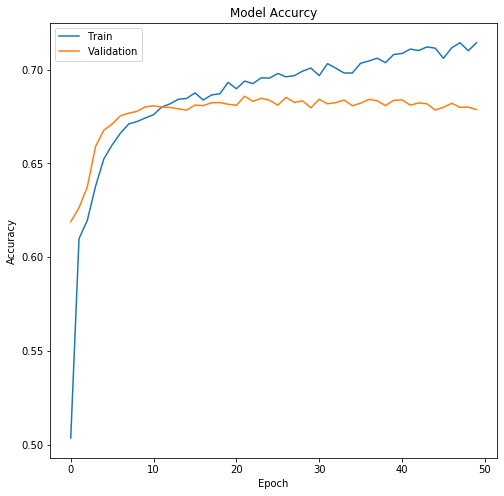

In [194]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

Model seems to have high variance as train data accuracy deviates from test case. Early stop at around 30 epoch prevent the model from overfitting or add activity regularizer. Cross validation may help to improve variance without significantly changing the architecture of the model, however, it's an expensive technique to use

In [195]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               53248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
__________

In [196]:
#write function to reverse encode
def ReverseEncode(y_train, y_train_deep):
    check = {}
    y_train = y_train.reset_index()
    for ind, i in enumerate(y_train_deep):
        if len(check) != 5:
            if np.argmax(i) not in check:
                check[np.argmax(i)]= y_train.iloc[ind,1]
        else:
            break
    return check

#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [197]:
#predict test case
predict = DNN.predict(X_test)

In [198]:
#change numerical categories to readable categories
def readable_predict(predict, check):
    predict_str = []
    for i in predict:
        ind = np.argmax(i)
        predict_str.append(check[ind])
    return predict_str

#transforming predict to original category
predict_str = readable_predict(predict, check)

In [199]:
print('Accuracy of Neural Network:', round(accuracy_score(y_test, predict_str), 3))

Accuracy of Neural Network: 0.681


The accuracy of the neural network aligns well within the range of the score achieved from val_acc

In [200]:
print(confusion_matrix(y_test, predict_str))

[[3807    1  129  626  279]
 [  21  363  112   13   29]
 [ 348   31 7779  533  364]
 [ 599    2  836 2154  246]
 [1204    2 1028  587  853]]


In [201]:
print(classification_report(y_test, predict_str))

                 precision    recall  f1-score   support

Adoption/Foster       0.64      0.79      0.70      4842
           Died       0.91      0.67      0.77       538
           Euth       0.79      0.86      0.82      9055
            Rto       0.55      0.56      0.56      3837
       Transfer       0.48      0.23      0.31      3674

       accuracy                           0.68     21946
      macro avg       0.67      0.62      0.63     21946
   weighted avg       0.66      0.68      0.66     21946



Deep learning achieved the highest score for Louisville dataset with an accuracy of 68.1%. Although the accuracy is low, highest precision of euthanization is 0.79 with deep learning model and highest recall is at 0.90 with logistics regression. Highest adoption precision is 0.64 with deep learning.

## Machine Learning on Dallas

In [202]:
#isolate the dallas dataset
df_dalla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25072 entries, 247285 to 282102
Data columns (total 13 columns):
Breed             25072 non-null object
Chip_Status       25072 non-null object
Health            24819 non-null object
Intake_Status     0 non-null object
Intake_Subtype    24704 non-null object
Location          25072 non-null object
Outcome_Type      25072 non-null object
Sex               0 non-null object
Neutered/Spay     25072 non-null object
Pure/Mix          25072 non-null object
Age               0 non-null float64
Outcome_Month     25072 non-null object
Intake_month      25072 non-null object
dtypes: float64(1), object(12)
memory usage: 2.7+ MB


In [203]:
#drop unused columns
df_dalla = df_dalla.drop(columns = ['Sex', 'Neutered/Spay', 'Age', 'Location', 'Intake_Status'])

In [204]:
df_dalla = df_dalla.dropna()
df_dalla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24669 entries, 247285 to 282102
Data columns (total 8 columns):
Breed             24669 non-null object
Chip_Status       24669 non-null object
Health            24669 non-null object
Intake_Subtype    24669 non-null object
Outcome_Type      24669 non-null object
Pure/Mix          24669 non-null object
Outcome_Month     24669 non-null object
Intake_month      24669 non-null object
dtypes: object(8)
memory usage: 1.7+ MB


In [205]:
#split data into train and test
X = df_dalla.drop(columns = ['Outcome_Type'])
y = df_dalla.Outcome_Type

#encode categories
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

#split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, test_size = 0.3)

In [206]:
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3,0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, cv = 3, verbose = 15, n_iter = 10, scoring = 'accuracy', random_state = 12)
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] alpha=0.0517947467923121 ........................................
[CV] ............ alpha=0.0517947467923121, score=0.514, total=   0.0s
[CV] alpha=0.0517947467923121 ........................................
[CV] ............ alpha=0.0517947467923121, score=0.514, total=   0.0s
[CV] alpha=0.0517947467923121 ........................................
[CV] ............ alpha=0.0517947467923121, score=0.527, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s



[CV] alpha=0.655128556859551 .........................................
[CV] ............. alpha=0.655128556859551, score=0.514, total=   0.1s
[CV] alpha=0.655128556859551 .........................................
[CV] ............. alpha=0.655128556859551, score=0.514, total=   0.1s
[CV] alpha=0.655128556859551 .........................................
[CV] ............. alpha=0.655128556859551, score=0.527, total=   0.0s
[CV] alpha=0.0026826957952797246 .....................................
[CV] ......... alpha=0.0026826957952797246, score=0.514, total=   0.0s
[CV] alpha=0.0026826957952797246 .....................................
[CV] ......... alpha=0.0026826957952797246, score=0.514, total=   0.0s
[CV] alpha=0.0026826957952797246 .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


[CV] ......... alpha=0.0026826957952797246, score=0.527, total=   0.0s
[CV] alpha=0.32374575428176433 .......................................
[CV] ........... alpha=0.32374575428176433, score=0.514, total=   0.0s
[CV] alpha=0.32374575428176433 .......................................
[CV] ........... alpha=0.32374575428176433, score=0.513, total=   0.0s
[CV] alpha=0.32374575428176433 .......................................
[CV] ........... alpha=0.32374575428176433, score=0.527, total=   0.0s
[CV] alpha=0.15998587196060574 .......................................
[CV] ........... alpha=0.15998587196060574, score=0.514, total=   0.0s
[CV] alpha=0.15998587196060574 .......................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s remaining:    0.0s


[CV] ........... alpha=0.15998587196060574, score=0.514, total=   0.1s
[CV] alpha=0.15998587196060574 .......................................
[CV] ........... alpha=0.15998587196060574, score=0.527, total=   0.0s
[CV] alpha=0.05963623316594643 .......................................
[CV] ........... alpha=0.05963623316594643, score=0.514, total=   0.1s
[CV] alpha=0.05963623316594643 .......................................
[CV] ........... alpha=0.05963623316594643, score=0.514, total=   0.1s
[CV] alpha=0.05963623316594643 .......................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s remaining:    0.0s


[CV] ........... alpha=0.05963623316594643, score=0.527, total=   0.1s
[CV] alpha=0.019306977288832496 ......................................
[CV] .......... alpha=0.019306977288832496, score=0.514, total=   0.0s
[CV] alpha=0.019306977288832496 ......................................
[CV] .......... alpha=0.019306977288832496, score=0.514, total=   0.0s
[CV] alpha=0.019306977288832496 ......................................
[CV] .......... alpha=0.019306977288832496, score=0.527, total=   0.0s
[CV] alpha=0.868511373751352 .........................................
[CV] ............. alpha=0.868511373751352, score=0.515, total=   0.0s
[CV] alpha=0.868511373751352 .........................................
[CV] ............. alpha=0.868511373751352, score=0.514, total=   0.0s
[CV] alpha=0.868511373751352 .........................................
[CV] ............. alpha=0.868511373751352, score=0.527, total=   0.0s
[CV] alpha=0.014563484775012436 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055,...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [207]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.868511373751352}


In [208]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.5187051192958073


In [209]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.5197946223483313


In [210]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1808,    0,   73,  166,  559],
       [   2,   68,   27,    0,    2],
       [ 523,    0, 1008,   54,  103],
       [ 412,    0,  169,  382,  346],
       [ 818,    0,  163,  137,  581]], dtype=int64)

In [211]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.51      0.69      0.59      2606
           Died       1.00      0.69      0.81        99
           Euth       0.70      0.60      0.64      1688
            Rto       0.52      0.29      0.37      1309
       Transfer       0.37      0.34      0.35      1699

       accuracy                           0.52      7401
      macro avg       0.62      0.52      0.55      7401
   weighted avg       0.53      0.52      0.51      7401



In [212]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_iter = 10, n_jobs = 3,
                           scoring = 'accuracy', random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    3.7s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [213]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.655128556859551}


In [214]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.5331248552235348


In [215]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.5379002837454399


In [216]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2109,    0,   99,  170,  228],
       [   4,   68,   27,    0,    0],
       [ 562,    0,  999,   89,   38],
       [ 561,    0,  112,  492,  144],
       [1078,    0,  158,  150,  313]], dtype=int64)

In [217]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.49      0.81      0.61      2606
           Died       1.00      0.69      0.81        99
           Euth       0.72      0.59      0.65      1688
            Rto       0.55      0.38      0.45      1309
       Transfer       0.43      0.18      0.26      1699

       accuracy                           0.54      7401
      macro avg       0.64      0.53      0.56      7401
   weighted avg       0.54      0.54      0.51      7401



In [218]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, verbose = 15, random_state = 10, 
                            scoring = 'accuracy', n_iter = 6, n_jobs = 3)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   13.7s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   14.1s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   14.3s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:   28.7s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:   28.8s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:   29.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   44.1s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   44.8s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   45.1s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   59.5s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done  15 out of  18 | elapsed:  1.3min remaining:   15.3s
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=6, n_jobs=3,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [219]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.3727593720314938}


In [220]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.5227009497336113


In [221]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.5230374273746791


In [222]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2403,    0,   32,  140,   31],
       [   4,   68,   27,    0,    0],
       [ 663,    0,  905,   84,   36],
       [ 797,    0,   83,  399,   30],
       [1383,    0,  110,  110,   96]], dtype=int64)

In [223]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.46      0.92      0.61      2606
           Died       1.00      0.69      0.81        99
           Euth       0.78      0.54      0.64      1688
            Rto       0.54      0.30      0.39      1309
       Transfer       0.50      0.06      0.10      1699

       accuracy                           0.52      7401
      macro avg       0.66      0.50      0.51      7401
   weighted avg       0.56      0.52      0.46      7401



In [224]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, n_jobs = 15, 
                            verbose = 2, random_state =12, n_iter = 8, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   8 out of  24 | elapsed:  3.6min remaining:  7.3min
[Parallel(n_jobs=15)]: Done  21 out of  24 | elapsed:  4.6min remaining:   39.2s
[Parallel(n_jobs=15)]: Done  24 out of  24 | elapsed:  4.6min finished
C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:216: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=8, n_jobs=15,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=2)

In [225]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 24}


In [226]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.5180101922631457


In [227]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.5243885961356574


In [228]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1878,    0,  149,  223,  356],
       [   3,    4,   90,    0,    2],
       [ 492,    0, 1038,   82,   76],
       [ 512,    0,  161,  522,  114],
       [ 928,    0,  153,  179,  439]], dtype=int64)

In [229]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.49      0.72      0.59      2606
           Died       1.00      0.04      0.08        99
           Euth       0.65      0.61      0.63      1688
            Rto       0.52      0.40      0.45      1309
       Transfer       0.44      0.26      0.33      1699

       accuracy                           0.52      7401
      macro avg       0.62      0.41      0.41      7401
   weighted avg       0.53      0.52      0.51      7401



In [230]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [20, 50, 100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, verbose = 15, n_jobs = 3, scoring = 'accuracy')
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    7.2s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    7.3s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   16.9s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   17.0s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   17.2s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   36.5s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   37.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   37.1s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  1.3min
[Parallel(

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'n_e

In [231]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 800}


In [232]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.5424484595784109


In [233]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.5472233481961897


In [234]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1732,    4,  192,  261,  417],
       [   4,   68,   24,    0,    3],
       [ 423,    4, 1048,   95,  118],
       [ 381,    0,  125,  673,  130],
       [ 816,    3,  147,  204,  529]], dtype=int64)

In [235]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.52      0.66      0.58      2606
           Died       0.86      0.69      0.76        99
           Euth       0.68      0.62      0.65      1688
            Rto       0.55      0.51      0.53      1309
       Transfer       0.44      0.31      0.37      1699

       accuracy                           0.55      7401
      macro avg       0.61      0.56      0.58      7401
   weighted avg       0.55      0.55      0.54      7401



In [236]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [237]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Train on 12087 samples, validate on 5181 samples
Epoch 1/50
 - 4s - loss: 1.5296 - acc: 0.3394 - val_loss: 1.3772 - val_acc: 0.4738
Epoch 2/50
 - 1s - loss: 1.3143 - acc: 0.4621 - val_loss: 1.2456 - val_acc: 0.4993
Epoch 3/50
 - 1s - loss: 1.2363 - acc: 0.4808 - val_loss: 1.1697 - val_acc: 0.5225
Epoch 4/50
 - 1s - loss: 1.1861 - acc: 0.4923 - val_loss: 1.1227 - val_acc: 0.5194
Epoch 5/50
 - 1s - loss: 1.1542 - acc: 0.4977 - val_loss: 1.1090 - val_acc: 0.5292
Epoch 6/50
 - 1s - loss: 1.1375 - acc: 0.5072 - val_loss: 1.0920 - val_acc: 0.5377
Epoch 7/50
 - 1s - loss: 1.1182 - acc: 0.5182 - val_loss: 1.0789 - val_acc: 0.5416
Epoch 8/50
 - 1s - loss: 1.1076 - acc: 0.5216 - val_loss: 1.0720 - val_acc: 0.5362
Epoch 9/50
 - 1s - loss: 1.0911 - acc: 0.5227 - val_loss: 1.0655 - val_acc: 0.5350
Epoch 10/50
 - 1s - loss: 1.0818 - acc: 0.5265 - val_loss: 1.0613 - val_acc: 0.5360
Epoch 11/50
 - 1s - loss: 1.0705 - acc: 0.5333 - val_loss: 1.0515 - val_acc: 0.5377
Epoch 12/50
 - 1s - loss: 1.0619 - a

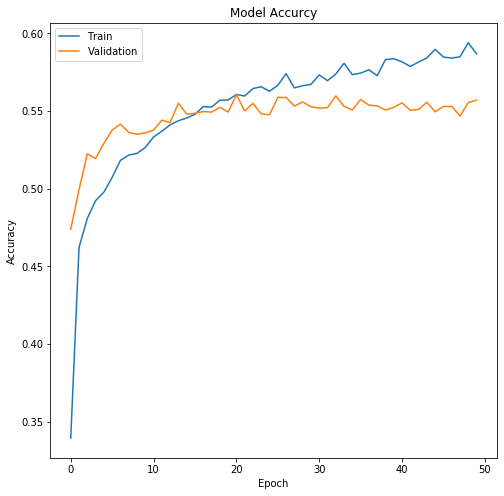

In [238]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

In [239]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               30720     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [240]:
#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [241]:
#predict test case
predict = DNN.predict(X_test)

In [242]:
predict_str = readable_predict(predict, check)

In [243]:
print('Accuracy of Neural Network:', round(accuracy_score( y_test, predict_str), 3))

Accuracy of Neural Network: 0.554


In [244]:
print(confusion_matrix(y_test, predict_str))

[[1744    4  212  292  354]
 [   4   68   26    0    1]
 [ 408    2 1091   96   91]
 [ 358    0  121  735   95]
 [ 838    2  175  219  465]]


In [245]:
print(classification_report(y_test, predict_str))

                 precision    recall  f1-score   support

Adoption/Foster       0.52      0.67      0.59      2606
           Died       0.89      0.69      0.78        99
           Euth       0.67      0.65      0.66      1688
            Rto       0.55      0.56      0.55      1309
       Transfer       0.46      0.27      0.34      1699

       accuracy                           0.55      7401
      macro avg       0.62      0.57      0.58      7401
   weighted avg       0.55      0.55      0.54      7401



Deep learning have overall the best accuracy at 55.4% and best euthanization recall at 0.65. SVM has the highest precision of euthanization at 0.78. Random Forest and Deep learning tie for the best adoption precision at 0.52.

## Machine Learning on Austin

In [246]:
df_aust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55047 entries, 4 to 96441
Data columns (total 13 columns):
Breed             55047 non-null object
Chip_Status       0 non-null object
Health            0 non-null object
Intake_Status     0 non-null object
Intake_Subtype    0 non-null object
Location          55047 non-null object
Outcome_Type      55047 non-null object
Sex               55046 non-null object
Neutered/Spay     55047 non-null object
Pure/Mix          55047 non-null object
Age               55047 non-null float64
Outcome_Month     55047 non-null object
Intake_month      55047 non-null object
dtypes: float64(1), object(12)
memory usage: 5.9+ MB


In [247]:
#set features and target variables
df_aust = df_aust.drop(columns = ['Health', 'Chip_Status', 'Intake_Status', 'Location', 'Intake_Subtype'])
df_aust = df_aust.dropna()
y = df_aust.Outcome_Type

In [248]:
df_aust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55046 entries, 4 to 96441
Data columns (total 8 columns):
Breed            55046 non-null object
Outcome_Type     55046 non-null object
Sex              55046 non-null object
Neutered/Spay    55046 non-null object
Pure/Mix         55046 non-null object
Age              55046 non-null float64
Outcome_Month    55046 non-null object
Intake_month     55046 non-null object
dtypes: float64(1), object(7)
memory usage: 3.8+ MB


In [249]:
#convert categorical features to numerical
# create temp dataframe to encode
temp1 = categorize(df_aust.Age)
cat_df_aust = df_aust.drop(columns = ['Age', 'Outcome_Type'])
cat_df_aust['Age'] = temp1

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)

#transform and concatenate data
cat_df_aust = ohe.fit_transform(cat_df_aust)

#assigning target and features
X = cat_df_aust

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [250]:
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3, 0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, verbose = 15, n_jobs = 3, 
                           cv = 3, n_iter = 10, random_state = 12, scoring = 'accuracy')
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    1.4s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [251]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.0026826957952797246}


In [252]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.5742499740475449


In [253]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.581688264502846


In [254]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6706,    0,    0,  833,  165],
       [  10,    4,    0,    6,   35],
       [ 127,    3,    2,  170,  180],
       [2364,    6,    3, 1434,  952],
       [1421,   47,    0,  586, 1460]], dtype=int64)

In [255]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.87      0.73      7704
           Died       0.07      0.07      0.07        55
           Euth       0.40      0.00      0.01       482
            Rto       0.47      0.30      0.37      4759
       Transfer       0.52      0.42      0.46      3514

       accuracy                           0.58     16514
      macro avg       0.42      0.33      0.33     16514
   weighted avg       0.55      0.58      0.55     16514



In [256]:
# create temp dataframe to encode and scale
temp1 = df_aust.Age.values.reshape(-1,1)
temp2 = df_aust.drop(columns=['Age', 'Outcome_Type'])

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()

#transform and concatenate data
temp1 = scaler.fit_transform(temp1)
temp2 = ohe.fit_transform(temp2)

#assigning target and features
y = df_aust.Outcome_Type
X = np.concatenate((temp1,temp2), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [257]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_jobs = 3,
                           n_iter = 10, scoring = 'accuracy', random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    6.5s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    6.7s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    7.0s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [258]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.32374575428176433}


In [259]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.5874857261496937


In [260]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.597553590892576


In [261]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6945,    0,    0,  605,  154],
       [   9,    0,    0,   11,   35],
       [ 134,    0,    0,  205,  143],
       [2432,    0,    0, 1489,  838],
       [1536,    0,    0,  544, 1434]], dtype=int64)

In [262]:
print(classification_report(y_test, y_pred))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.90      0.74      7704
           Died       0.00      0.00      0.00        55
           Euth       0.00      0.00      0.00       482
            Rto       0.52      0.31      0.39      4759
       Transfer       0.55      0.41      0.47      3514

       accuracy                           0.60     16514
      macro avg       0.34      0.32      0.32     16514
   weighted avg       0.56      0.60      0.56     16514



In [263]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, n_jobs = 3,
                            verbose = 15, random_state = 10, scoring = 'accuracy', n_iter = 6)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  4.3min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  4.3min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  6.5min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  9.3min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  9.3min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  9.4min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed: 12.5min
[Parallel(n_jobs=3)]: Done  15 out of  18 | elapsed: 12.6min remaining:  2.5min
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=6, n_jobs=3,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [264]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.016768329368110083}


In [265]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.5731599709332503


In [266]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.5827176940777522


In [267]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[7036,    0,    0,  487,  181],
       [   9,    0,    0,    6,   40],
       [ 151,    0,    0,  124,  207],
       [2575,    0,    0, 1011, 1173],
       [1576,    0,    0,  362, 1576]], dtype=int64)

In [268]:
print(classification_report(y_test, y_pred))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.62      0.91      0.74      7704
           Died       0.00      0.00      0.00        55
           Euth       0.00      0.00      0.00       482
            Rto       0.51      0.21      0.30      4759
       Transfer       0.50      0.45      0.47      3514

       accuracy                           0.58     16514
      macro avg       0.32      0.31      0.30     16514
   weighted avg       0.54      0.58      0.53     16514



In [269]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, n_jobs = 3,
                            verbose = 15, random_state =12, n_iter = 8, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   29.5s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   29.8s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   30.4s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  2.1min
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=8, n_jobs=3,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [270]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 24}


In [271]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.5859026263884564


In [272]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.5942230834443503


In [273]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6660,    0,    0,  908,  136],
       [   8,    0,    0,   19,   28],
       [ 127,    0,    1,  242,  112],
       [2245,    0,    0, 1926,  588],
       [1454,    0,    0,  834, 1226]], dtype=int64)

In [274]:
print(classification_report(y_test, y_pred))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.86      0.73      7704
           Died       0.00      0.00      0.00        55
           Euth       1.00      0.00      0.00       482
            Rto       0.49      0.40      0.44      4759
       Transfer       0.59      0.35      0.44      3514

       accuracy                           0.59     16514
      macro avg       0.54      0.32      0.32     16514
   weighted avg       0.59      0.59      0.56     16514



In [275]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [20, 50, 100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, n_jobs = 3, verbose = 15, scoring = 'accuracy')
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    6.1s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    6.3s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    6.3s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   14.7s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   14.7s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   14.8s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   31.0s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   31.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   31.2s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  1.0min
[Parallel(

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'n_e

In [276]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 20}


In [277]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.5392920170248106


In [278]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.5538331112995034


In [279]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5343,    6,   83, 1317,  955],
       [   7,    2,    2,   19,   25],
       [ 112,    2,   39,  205,  124],
       [1435,   16,  192, 2342,  774],
       [1144,   11,   98,  841, 1420]], dtype=int64)

In [280]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.66      0.69      0.68      7704
           Died       0.05      0.04      0.04        55
           Euth       0.09      0.08      0.09       482
            Rto       0.50      0.49      0.49      4759
       Transfer       0.43      0.40      0.42      3514

       accuracy                           0.55     16514
      macro avg       0.35      0.34      0.34     16514
   weighted avg       0.55      0.55      0.55     16514



In [281]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [282]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Train on 26972 samples, validate on 11560 samples
Epoch 1/50
 - 7s - loss: 1.4365 - acc: 0.4739 - val_loss: 1.1867 - val_acc: 0.5706
Epoch 2/50
 - 3s - loss: 1.1276 - acc: 0.5732 - val_loss: 1.0809 - val_acc: 0.5755
Epoch 3/50
 - 3s - loss: 1.0510 - acc: 0.5802 - val_loss: 1.0217 - val_acc: 0.5904
Epoch 4/50
 - 3s - loss: 1.0164 - acc: 0.5854 - val_loss: 0.9999 - val_acc: 0.5888
Epoch 5/50
 - 3s - loss: 0.9940 - acc: 0.5929 - val_loss: 0.9958 - val_acc: 0.5896
Epoch 6/50
 - 3s - loss: 0.9866 - acc: 0.5876 - val_loss: 0.9821 - val_acc: 0.5921
Epoch 7/50
 - 3s - loss: 0.9791 - acc: 0.5906 - val_loss: 0.9741 - val_acc: 0.5928
Epoch 8/50
 - 3s - loss: 0.9776 - acc: 0.5918 - val_loss: 0.9728 - val_acc: 0.5942
Epoch 9/50
 - 3s - loss: 0.9729 - acc: 0.5931 - val_loss: 0.9776 - val_acc: 0.5940
Epoch 10/50
 - 3s - loss: 0.9702 - acc: 0.5957 - val_loss: 0.9711 - val_acc: 0.5917
Epoch 11/50
 - 3s - loss: 0.9675 - acc: 0.5946 - val_loss: 0.9658 - val_acc: 0.5917
Epoch 12/50
 - 3s - loss: 0.9681 - 

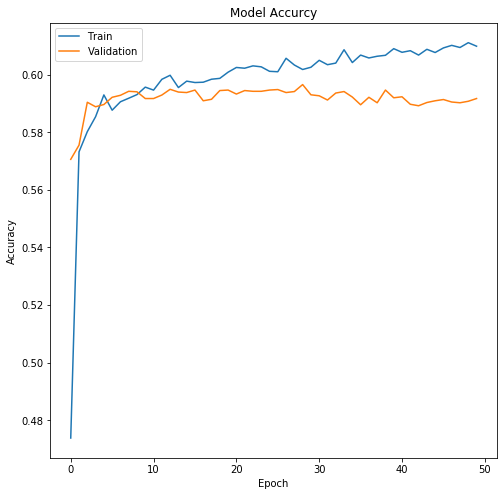

In [283]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

Model seems to have high variance as train data accuracy deviates from test case. Cross validation may help to improve variance without significantly changing the architecture of the model

In [284]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               16384     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
__________

In [285]:
#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [286]:
#predict test case
predict = DNN.predict(X_test)

In [287]:
#transforming predict to original category
predict_str = readable_predict(predict, check)

In [288]:
print('Accuracy of Neural Network:', round(accuracy_score(y_test, predict_str), 3))

Accuracy of Neural Network: 0.601


The accuracy of the neural network aligns will within the range of the score achieved from val_acc

In [289]:
print(confusion_matrix(y_test, predict_str))

[[6474    0    0 1089  141]
 [  10    0    0   15   30]
 [ 112    0    0  275   95]
 [2051    0    0 2199  509]
 [1349    0    0  909 1256]]


In [290]:
print(classification_report(y_test, predict_str))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.65      0.84      0.73      7704
           Died       0.00      0.00      0.00        55
           Euth       0.00      0.00      0.00       482
            Rto       0.49      0.46      0.48      4759
       Transfer       0.62      0.36      0.45      3514

       accuracy                           0.60     16514
      macro avg       0.35      0.33      0.33     16514
   weighted avg       0.57      0.60      0.57     16514



Highest accuracy was achieved by deep learning with an accuracy of 0.60 compared to validation accuracy of 0.59. Deep learning model also have the highest precision mark at 0.65. Highest euthanization precision was achieved by random forest at 1.0. However, the confusion matrix only shows one prediction for euthanization, proving it could be a statistical error. All recall were below 0.1.

In [291]:
df_sonoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 282104 to 298443
Data columns (total 13 columns):
Breed             9135 non-null object
Chip_Status       0 non-null object
Health            9106 non-null object
Intake_Status     0 non-null object
Intake_Subtype    9135 non-null object
Location          9135 non-null object
Outcome_Type      9135 non-null object
Sex               9135 non-null object
Neutered/Spay     9135 non-null object
Pure/Mix          9135 non-null object
Age               7752 non-null float64
Outcome_Month     9135 non-null object
Intake_month      9135 non-null object
dtypes: float64(1), object(12)
memory usage: 999.1+ KB


In [292]:
#set features and target variables
df_sonoma = df_sonoma.drop(columns = ['Intake_Status', 'Location', 'Chip_Status'])
average = np.mean(df_sonoma.Age)
df_sonoma.Age = df_sonoma.Age.fillna(average)
df_sonoma = df_sonoma.dropna()
y = df_sonoma.Outcome_Type

In [293]:
df_sonoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9106 entries, 282104 to 298443
Data columns (total 10 columns):
Breed             9106 non-null object
Health            9106 non-null object
Intake_Subtype    9106 non-null object
Outcome_Type      9106 non-null object
Sex               9106 non-null object
Neutered/Spay     9106 non-null object
Pure/Mix          9106 non-null object
Age               9106 non-null float64
Outcome_Month     9106 non-null object
Intake_month      9106 non-null object
dtypes: float64(1), object(9)
memory usage: 782.5+ KB


In [294]:
#convert categorical features to numerical
# create temp dataframe to encode
temp1 = categorize(df_sonoma.Age)
cat_df_sonoma = df_sonoma.drop(columns = ['Age', 'Outcome_Type'])
cat_df_sonoma['Age'] = temp1

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)

#transform and concatenate data
cat_df_sonoma = ohe.fit_transform(cat_df_sonoma)

#assigning target and features
X = cat_df_sonoma

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [295]:
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3, 0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, verbose = 15, n_jobs = 3, 
                           cv = 3, n_iter = 10, random_state = 12, scoring = 'accuracy')
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    0.6s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [296]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.0026826957952797246}


In [297]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.6975211797929087


In [298]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.7075402635431918


In [299]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[585,   0,   8, 154,  24],
       [  0,   1,   5,   0,   0],
       [  5,   0, 303,   4,  31],
       [242,   3,  27, 967,  70],
       [ 85,   0,  32, 109,  77]], dtype=int64)

In [300]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.64      0.76      0.69       771
           Died       0.25      0.17      0.20         6
           Euth       0.81      0.88      0.84       343
            Rto       0.78      0.74      0.76      1309
       Transfer       0.38      0.25      0.30       303

       accuracy                           0.71      2732
      macro avg       0.57      0.56      0.56      2732
   weighted avg       0.70      0.71      0.70      2732



In [301]:
# create temp dataframe to encode and scale
temp1 = df_sonoma.Age.values.reshape(-1,1)
temp2 = df_sonoma.drop(columns=['Age', 'Outcome_Type'])

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()

#transform and concatenate data
temp1 = scaler.fit_transform(temp1)
temp2 = ohe.fit_transform(temp2)

#assigning target and features
y = df_sonoma.Outcome_Type
X = np.concatenate((temp1,temp2), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [302]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_jobs = 3, 
                           n_iter = 10, scoring = 'accuracy', random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    3.7s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=3,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [303]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.32374575428176433}


In [304]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.7362723564480703


In [305]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.7397510980966325


In [306]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 574,    0,    7,  185,    5],
       [   0,    2,    1,    3,    0],
       [  15,    1,  294,   10,   23],
       [ 172,    2,   14, 1099,   22],
       [  97,    0,   15,  139,   52]], dtype=int64)

In [307]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.67      0.74      0.70       771
           Died       0.40      0.33      0.36         6
           Euth       0.89      0.86      0.87       343
            Rto       0.77      0.84      0.80      1309
       Transfer       0.51      0.17      0.26       303

       accuracy                           0.74      2732
      macro avg       0.65      0.59      0.60      2732
   weighted avg       0.72      0.74      0.72      2732



In [308]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, n_jobs = 3, 
                            verbose = 15, random_state = 10, scoring = 'accuracy', n_iter = 6)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    7.6s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    7.8s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    8.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   11.5s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   11.5s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   11.8s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   15.8s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:   18.4s
[Parallel(n_jobs=3)]: Done  15 out of  18 | elapsed:   19.2s remaining:    3.8s
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=6, n_jobs=3,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [309]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.18420699693267165}


In [310]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.7303106369626609


In [311]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.7320644216691069


In [312]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 597,    0,    6,  168,    0],
       [   0,    5,    1,    0,    0],
       [  28,    1,  293,    0,   21],
       [ 206,    3,   22, 1050,   28],
       [ 120,    0,   13,  115,   55]], dtype=int64)

In [313]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.77      0.69       771
           Died       0.56      0.83      0.67         6
           Euth       0.87      0.85      0.86       343
            Rto       0.79      0.80      0.79      1309
       Transfer       0.53      0.18      0.27       303

       accuracy                           0.73      2732
      macro avg       0.67      0.69      0.66      2732
   weighted avg       0.72      0.73      0.72      2732



In [314]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, n_jobs = 3, 
                            verbose = 15, random_state =12, n_iter = 8, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    6.8s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    6.8s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    6.9s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   10.1s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   10.1s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   10.2s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   13.5s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:   16.4s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:   16.4s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:   16.5s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=8, n_jobs=3,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [315]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 11}


In [316]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.7359585817383119


In [317]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.7371888726207906


In [318]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 581,    0,    5,  175,   10],
       [   0,    0,    0,    6,    0],
       [  29,    0,  242,   63,    9],
       [ 123,    0,   12, 1168,    6],
       [ 124,    0,   18,  138,   23]], dtype=int64)

In [319]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.68      0.75      0.71       771
           Died       0.00      0.00      0.00         6
           Euth       0.87      0.71      0.78       343
            Rto       0.75      0.89      0.82      1309
       Transfer       0.48      0.08      0.13       303

       accuracy                           0.74      2732
      macro avg       0.56      0.49      0.49      2732
   weighted avg       0.72      0.74      0.71      2732



C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [320]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [20, 50, 100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, verbose = 15, n_jobs = 3, 
                     scoring = 'accuracy')
RF_cv.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:   10.4s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:   10.4s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:   10.6s
[Parallel(n_jobs=3)]: Done  16 tasks      | elapsed:   18.0s
[Parallel(n_jobs=3)]: Do

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'n_e

In [321]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 600}


In [322]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.7667085032946345


In [323]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.7554904831625183


In [324]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 554,    0,    9,  173,   35],
       [   0,    5,    1,    0,    0],
       [  13,    1,  298,    7,   24],
       [ 124,    3,   17, 1135,   30],
       [  94,    0,   23,  114,   72]], dtype=int64)

In [325]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.71      0.72      0.71       771
           Died       0.56      0.83      0.67         6
           Euth       0.86      0.87      0.86       343
            Rto       0.79      0.87      0.83      1309
       Transfer       0.45      0.24      0.31       303

       accuracy                           0.76      2732
      macro avg       0.67      0.71      0.68      2732
   weighted avg       0.74      0.76      0.74      2732



In [326]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [327]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Train on 4461 samples, validate on 1913 samples
Epoch 1/50
 - 5s - loss: 1.5977 - acc: 0.3002 - val_loss: 1.3235 - val_acc: 0.4365
Epoch 2/50
 - 1s - loss: 1.3222 - acc: 0.4770 - val_loss: 1.1194 - val_acc: 0.6278
Epoch 3/50
 - 1s - loss: 1.1585 - acc: 0.5893 - val_loss: 1.0046 - val_acc: 0.6733
Epoch 4/50
 - 1s - loss: 1.0508 - acc: 0.6416 - val_loss: 0.9611 - val_acc: 0.6743
Epoch 5/50
 - 1s - loss: 0.9761 - acc: 0.6743 - val_loss: 0.9283 - val_acc: 0.6822
Epoch 6/50
 - 1s - loss: 0.9121 - acc: 0.6987 - val_loss: 0.8874 - val_acc: 0.6864
Epoch 7/50
 - 1s - loss: 0.8529 - acc: 0.7113 - val_loss: 0.8281 - val_acc: 0.7094
Epoch 8/50
 - 1s - loss: 0.8206 - acc: 0.7198 - val_loss: 0.7754 - val_acc: 0.7266
Epoch 9/50
 - 1s - loss: 0.7990 - acc: 0.7276 - val_loss: 0.7514 - val_acc: 0.7308
Epoch 10/50
 - 1s - loss: 0.7500 - acc: 0.7440 - val_loss: 0.7235 - val_acc: 0.7371
Epoch 11/50
 - 1s - loss: 0.7147 - acc: 0.7566 - val_loss: 0.6943 - val_acc: 0.7507
Epoch 12/50
 - 1s - loss: 0.6865 - ac

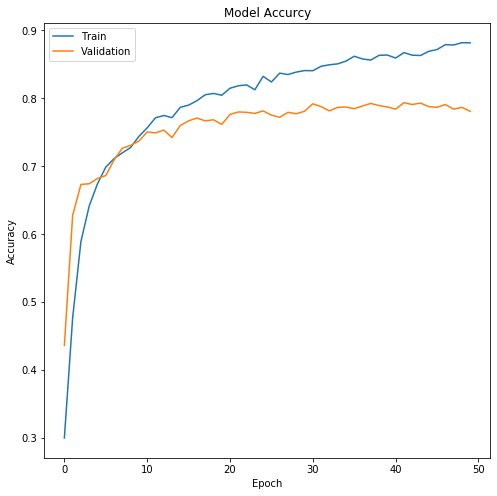

In [328]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

Model seems to have high variance as train data accuracy deviates from test case. Cross validation may help to improve variance without significantly changing the architecture of the model

In [329]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               32256     
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
__________

In [330]:
#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [331]:
#predict test case
predict = DNN.predict(X_test)

In [332]:
#transforming predict to original category
predict_str = readable_predict(predict, check)

In [333]:
print('Accuracy of Neural Network:', round(accuracy_score(y_test, predict_str), 3))

Accuracy of Neural Network: 0.772


The accuracy of the neural network aligns will within the range of the score achieved from val_acc

In [334]:
print(confusion_matrix(y_test, predict_str))

[[ 613    0   10  118   30]
 [   0    4    2    0    0]
 [   6    1  306    2   28]
 [ 116    3   20 1105   65]
 [ 116    0   29   78   80]]


In [335]:
print(classification_report(y_test, predict_str))

                 precision    recall  f1-score   support

Adoption/Foster       0.72      0.80      0.76       771
           Died       0.50      0.67      0.57         6
           Euth       0.83      0.89      0.86       343
            Rto       0.85      0.84      0.85      1309
       Transfer       0.39      0.26      0.32       303

       accuracy                           0.77      2732
      macro avg       0.66      0.69      0.67      2732
   weighted avg       0.76      0.77      0.76      2732



Deep learning acheived the highest accuracy at 77.2% compared to validation test of 78%. It also have the highest adoption precision at 0.72. Logistics regression have the highest euthanization precision at 0.89 and naive bayes achived the highest euthanization recall at 0.88.

## 3b. Remarks on Learning Model
Even though for most models, the accuracy is subpar, the models do provide some value. The purpose of this project was to idenfify dogs at risk for euthanization and transfer them to locations with better outcome. The first part could be achieve with high euthanization precision and recall for some location. For example Sonoma, the euthanization precision and recall could be achieve close to 90% with two separate models providing great confidence of which dogs are at risk. However this is not to say we are happy with the models. Adoption rate is a area that needs more work since no models were able to achieve a preciion score of 80%. This is essential to determining the location to send at risk dogs. Also, RTO and Transfer dogs are creating a real problem for predicting adoption and euthanization. According to the confusion matrixes generated in the models, most mistakes made from adoption and euthanization predicted as RTO and Transfer or RTO and transfer predicted as euthanization and adoption. This is the largest area of potential improvement to rectify the model from error and significantly improve the model.

Also choosing the right model for the shelters depends on the economic and buisness model of the shelter. For shelters that want to be more humane towards dogs, they can run the model prioritizing euthanization precision to idenfity the predicted dogs at risk. While more economical shelter can use the model with highest recall to be absolutely confident the dog is at risk. Once identify the same features could be run against all locations with models to find the best adoption/foster precision for transfer. 

However, once the model is chosen, the confusion matrix should be inspected. In this project, one of the most surprising finding was having a 1.0 recall. However, when the confusion matrix was inspected, only one euthanization was predicted for euthanization and was a true positive. Therefore, the recall, although 1.0, is extremely bias and the model shouldn’t be used for predicting euthanization.

## 4. Future Work
Improve the featuring engineering of Age, Breed and Color <br>

Study the effects of features on RTO and Transfer<br>

Study the interdependencies of RTO, Transfer, Adoption and Euthanization rates<br>

Simplify outcome types with only survived and alive to improve accuracy and better target for euthanized dogs.<br>

Cross validate with other hyperparameters to improve accuracy<br>

Weight average all the models to create an ensemble model<br>

Engineer model to improve accuracy of euthanization rate and adoption rate<br>

Use transfer learning <br>